## Stage 4

Kelompok 2:

*   Oei, Gabrielle Maureen B.S
*   Ummi Sarah
*   Arini Arumsari
*   Althaaf Athaayaa Daffa Qushayyizidane
*   Ruslan Hadi
*   Muhammad Ikhsan Hendriyana
*   Taufik Ismail
*   Jackson
*   Tsany Sutia

In [ ]:
'''
!pip install numpy==1.23.5
!pip install pandas==2.0.2
'''

In [ ]:
# Melakukan import library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import boxcox
from imblearn import under_sampling, over_sampling
import gdown
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, fbeta_score, make_scorer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, reset_parameter, LGBMClassifier

import shap

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  2.0.2
seaborn version :  0.12.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# **Load and Descriptive Statistics**

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Melakukan import csv
df = pd.read_csv("train.csv")
df.sample(5)

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
150830  150831    Male   39                1         46.0                   0   
136596  136597  Female   24                1         28.0                   0   
192279  192280  Female   23                1          8.0                   1   
247620  247621    Male   20                1         10.0                   0   
20809    20810    Male   32                1         41.0                   1   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
150830    1-2 Year             No         53779.0                 124.0   
136596    1-2 Year            Yes         34496.0                 124.0   
192279    < 1 Year             No         26821.0                 152.0   
247620    < 1 Year            Yes         25635.0                 160.0   
20809     < 1 Year             No         39805.0                 152.0   

        Vintage  Response  
150830      168         1  
136596       43         1  
192279      293         0  
247620       78         0  
20809        81         0

## Descriptive Statictics

In [ ]:
# Mengecek apakah ada data yang NaN/Null
print(df.isnull().values.any())
print(df.isna().sum())

False
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [ ]:
# Mengecek Datatype tiap kolom berserta non-null kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
# Pengelompokan kolom berdasarkan jenisnya
num = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
num = df.select_dtypes(include=num)
num.drop(columns=['id'],inplace=True)
num = num.columns
cats = ['Gender','Vehicle_Age','Vehicle_Damage']

In [ ]:
df[num].describe()

Age  Driving_License    Region_Code  Previously_Insured  \
count  381109.000000    381109.000000  381109.000000       381109.000000   
mean       38.822584         0.997869      26.388807            0.458210   
std        15.511611         0.046110      13.229888            0.498251   
min        20.000000         0.000000       0.000000            0.000000   
25%        25.000000         1.000000      15.000000            0.000000   
50%        36.000000         1.000000      28.000000            0.000000   
75%        49.000000         1.000000      35.000000            1.000000   
max        85.000000         1.000000      52.000000            1.000000   

       Annual_Premium  Policy_Sales_Channel        Vintage       Response  
count   381109.000000         381109.000000  381109.000000  381109.000000  
mean     30564.389581            112.034295     154.347397       0.122563  
std      17213.155057             54.203995      83.671304       0.327936  
min       2630.000000              1.000000      10.000000       0.000000  
25%      24405.000000             29.000000      82.000000       0.000000  
50%      31669.000000            133.000000     154.000000       0.000000  
75%      39400.000000            152.000000     227.000000       0.000000  
max     540165.000000            163.000000     299.000000       1.000000

In [ ]:
df[cats].describe()

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

In [ ]:
# Mengecek unique value, modus, dan frekuensi modus dari tiap kolom
nums = df[num]
for i in nums:
  x = nums[i].mode()[0]
  y = nums[i].value_counts()[x]
  z = nums[i].nunique()
  print(f'Terdapat {z} unique values dan modus dari kolom {i} = {x} dengan frekuensi sebesar {y}')

Terdapat 66 unique values dan modus dari kolom Age = 24 dengan frekuensi sebesar 25960
Terdapat 2 unique values dan modus dari kolom Driving_License = 1 dengan frekuensi sebesar 380297
Terdapat 53 unique values dan modus dari kolom Region_Code = 28.0 dengan frekuensi sebesar 106415
Terdapat 2 unique values dan modus dari kolom Previously_Insured = 0 dengan frekuensi sebesar 206481
Terdapat 48838 unique values dan modus dari kolom Annual_Premium = 2630.0 dengan frekuensi sebesar 64877
Terdapat 155 unique values dan modus dari kolom Policy_Sales_Channel = 152.0 dengan frekuensi sebesar 134784
Terdapat 290 unique values dan modus dari kolom Vintage = 256 dengan frekuensi sebesar 1418
Terdapat 2 unique values dan modus dari kolom Response = 0 dengan frekuensi sebesar 334399


In [ ]:
# Mengecek ukuran penyebaran
nums = df[num]
for i in nums:
  minv = nums[i].min()
  maxv = nums[i].max()
  Q1 = nums[i].quantile(.25)
  Q3 = nums[i].quantile(.75)
  total_range = maxv-minv
  var = round(nums[i].var(),2)
  iqr = Q3-Q1
  print (f'Ukuran penyebaran dari kolom {i}, variance = {var}, range = {total_range}, IQR = {iqr}')

Ukuran penyebaran dari kolom Age, variance = 240.61, range = 65, IQR = 24.0
Ukuran penyebaran dari kolom Driving_License, variance = 0.0, range = 1, IQR = 0.0
Ukuran penyebaran dari kolom Region_Code, variance = 175.03, range = 52.0, IQR = 20.0
Ukuran penyebaran dari kolom Previously_Insured, variance = 0.25, range = 1, IQR = 1.0
Ukuran penyebaran dari kolom Annual_Premium, variance = 296292707.02, range = 537535.0, IQR = 14995.0
Ukuran penyebaran dari kolom Policy_Sales_Channel, variance = 2938.07, range = 162.0, IQR = 123.0
Ukuran penyebaran dari kolom Vintage, variance = 7000.89, range = 289, IQR = 145.0
Ukuran penyebaran dari kolom Response, variance = 0.11, range = 1, IQR = 0.0


## Kesimpulan

1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?
    > Dari 12 kolom, terdapat beberapa kolom yang perlu disesuaikan baik dari tipe data maupun nama kolomnya agar lebih mudah dimengerti,
    > * id = ID unik untuk tiap customer. **Sudah sesuai**.
    > * Gender = Jenis kelamin dari customer. **Sudah sesuai**.
    > * Age = Usia customer. **Sudah sesuai**.
    > * Driving_License = 0 : customer tidak memiliki izin mengemudi, 1 : customer memiliki izin mengemudi. **Sudah sesuai**.
    > * Region_Code = Kode unik untuk tiap wilayah customer. **Sudah sesuai**.
    > * Previously_Insured = 0 : Customer belum memiliki 'Asuransi Kendaraan', 1 : Customer sudah memiliki 'Asuransi Kendaraan'. **Sudah sesuai**.
    > * Vehicle_Age = Usia dari kendaraan milik customer. **Lebih baik jika diubah menjadi integer, contoh dengan melakukan *label encoding***.
    > * Vehicle_Damage = 0 : Kendaraan customer belum pernah rusak, 1: Kendaraan customer sudah pernah rusak. **Tipe data lebih baik diseragamkan dengan boolean yang lain yakni integer**.
    > * Annual_Premium = Premi tahunan yang harus dibayar oleh customer. **Sudah sesuai**.
    > * Policy_Sales_Channel = Kode channel/media yang digunakan untuk menghubungi customer. **Sudah sesuai**.
    > * Vintage = Jumlah hari customer sudah bergabung dengan perusahaan. **Lebih baik diubah menjadi Join_Duration**.
    > * Response = 0 : Customer tidak tertarik 'Asuransi Kendaraan', 0 : Customer tertarik 'Asuransi Kendaraan'. **Sudah sesuai**.

2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
    > Dari 12 kolom tidak ditemukan nilai kosong.

3. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)
    > Dari kolom ***Age***, ***Previously_Insured***, median < mean sehingga ada berkemungkinan persebaran data *positive skewed*, sedangkan kolom ***Policy_Sales_Channel***, ***Region_Code*** median > mean, yang kemungkinan *negative skewed*.


# **Univariate Analysis**

In [ ]:
# Pengelompokan kolom berdasarkan jenisnya
print(num)
print(cats)

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')
['Gender', 'Vehicle_Age', 'Vehicle_Damage']


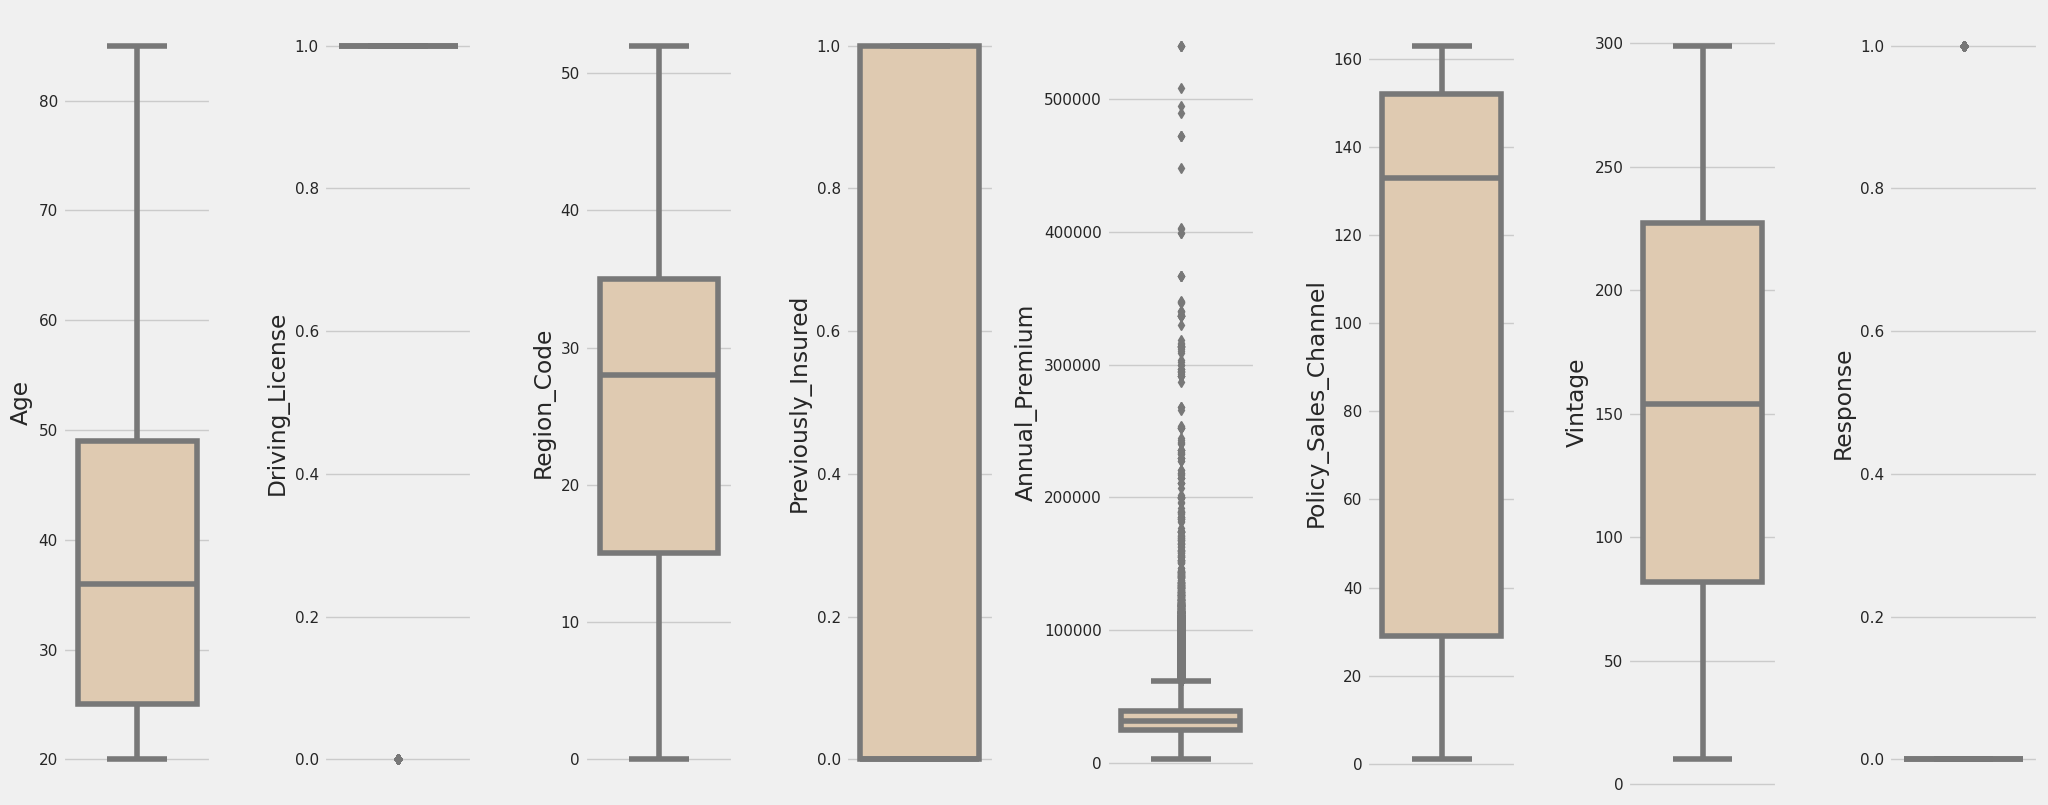

In [ ]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color = '#E7CBA9', data=df, orient = 'v')
    plt.tight_layout()

#### Hasil Observasi =
* Age : Distribusi data tidak normal. Umur pelanggan bervarian dari 20 tahun hingga 85 tahun, dengan kebanyakan pelanggan berusia antara 24 - 49 tahun.
* Driving_License : Merupakan boolean. Data tidak terdistribusi dengan normal. Kebanyakan pelanggan terkategori 1 (Memiliki izin mengemudi).
* Region_Code : Distribusi data normal. Dengan median di kode wilayah 28.
* Previously_Insured : Merupakan boolean. Data terdistribusi dengan rata antara 1 dan 0.
* Annual_Premium : Data terdistribusi normal, dengan kebanyakan annual premium sekitar 0 - 50000 (dibawah 100000), Terdapat banyak outliers yang nominalnya hingga diatas 400000.
* Policy_Sales_Channel : Distribusi data tidak normal dengan nilai tengah berada di nilai ± 130.
* Vintage : Distribusi data normal, dengan median di nilai ± 151.
* Response : Merupakan boolean. Data tidak terdistribusi dengan normal. Kebanyakan pelanggan terkategori 0 (Tidak berminat).

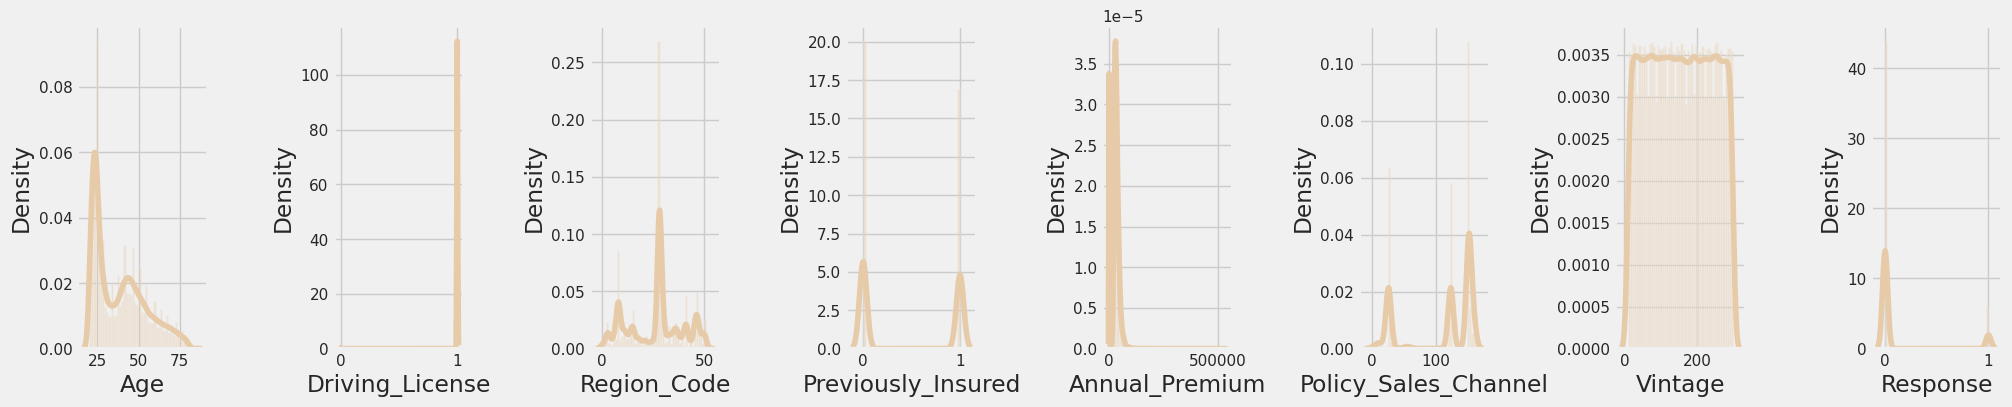

In [ ]:
for i in range(0, len(num)):
    plt.subplot(2, len(num), i+1)
    sns.distplot(df[num[i]], color='#E7CBA9')
    plt.tight_layout(pad=2)

#### Hasil Observasi =
* Age : Persebaran *positive skewed*.
* Driving_License : Merupakan bimodal, persebaran tidak rata, mayoritas nilai 1.
* Region_Code : Persebaran data normal.
* Previously_Insured : Merupakan bimodal, persebaran data rata antara 1 dan 0, dimana 0 terlihat sedikit lebih banyak.
* Annual_Premium : Distribusi data mendekati normal namun terdapat outliers diatas batas atas.
* Policy_Sales_Channel : Distribusi data tidak normal, cenderung *negative skewed*.
* Vintage : Persebaran data normal.
* Response : Merupakan bimodal, persebaran tidak rata, mayoritas nilai 0.

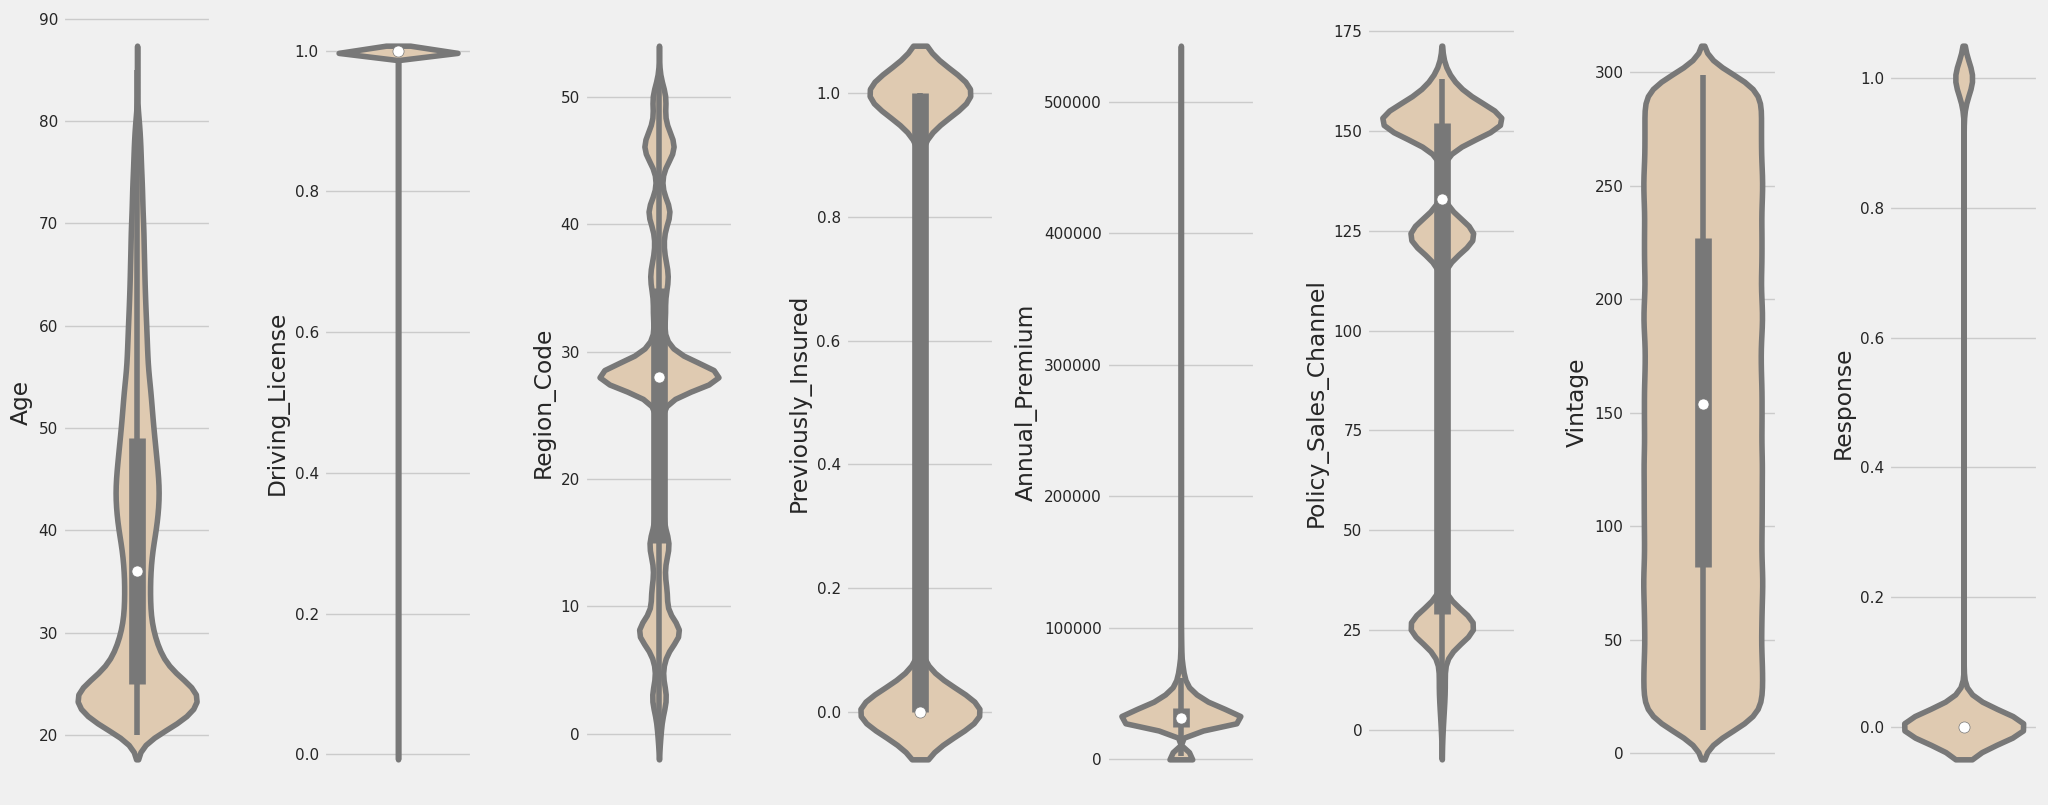

In [ ]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=df[num[i]], color='#E7CBA9', orient='v')
    plt.tight_layout()

#### Hasil Observasi =
* Age : Mayoritas nilai 24.
* Driving_License : Mayoritas nilai 1.
* Region_Code : Mayoritas nilai 28.
* Previously_Insured : Terdapat 2 nilai 1 dan 0, terlihat dari chart nilai 0 sedikit lebih banyak.
* Annual_Premium : Kebanyakan nilai < 30000.
* Policy_Sales_Channel : Mayoritas nilai ±151.
* Vintage : Data merata di tiap nilainya.
* Response : Mayoritas nilai 0.

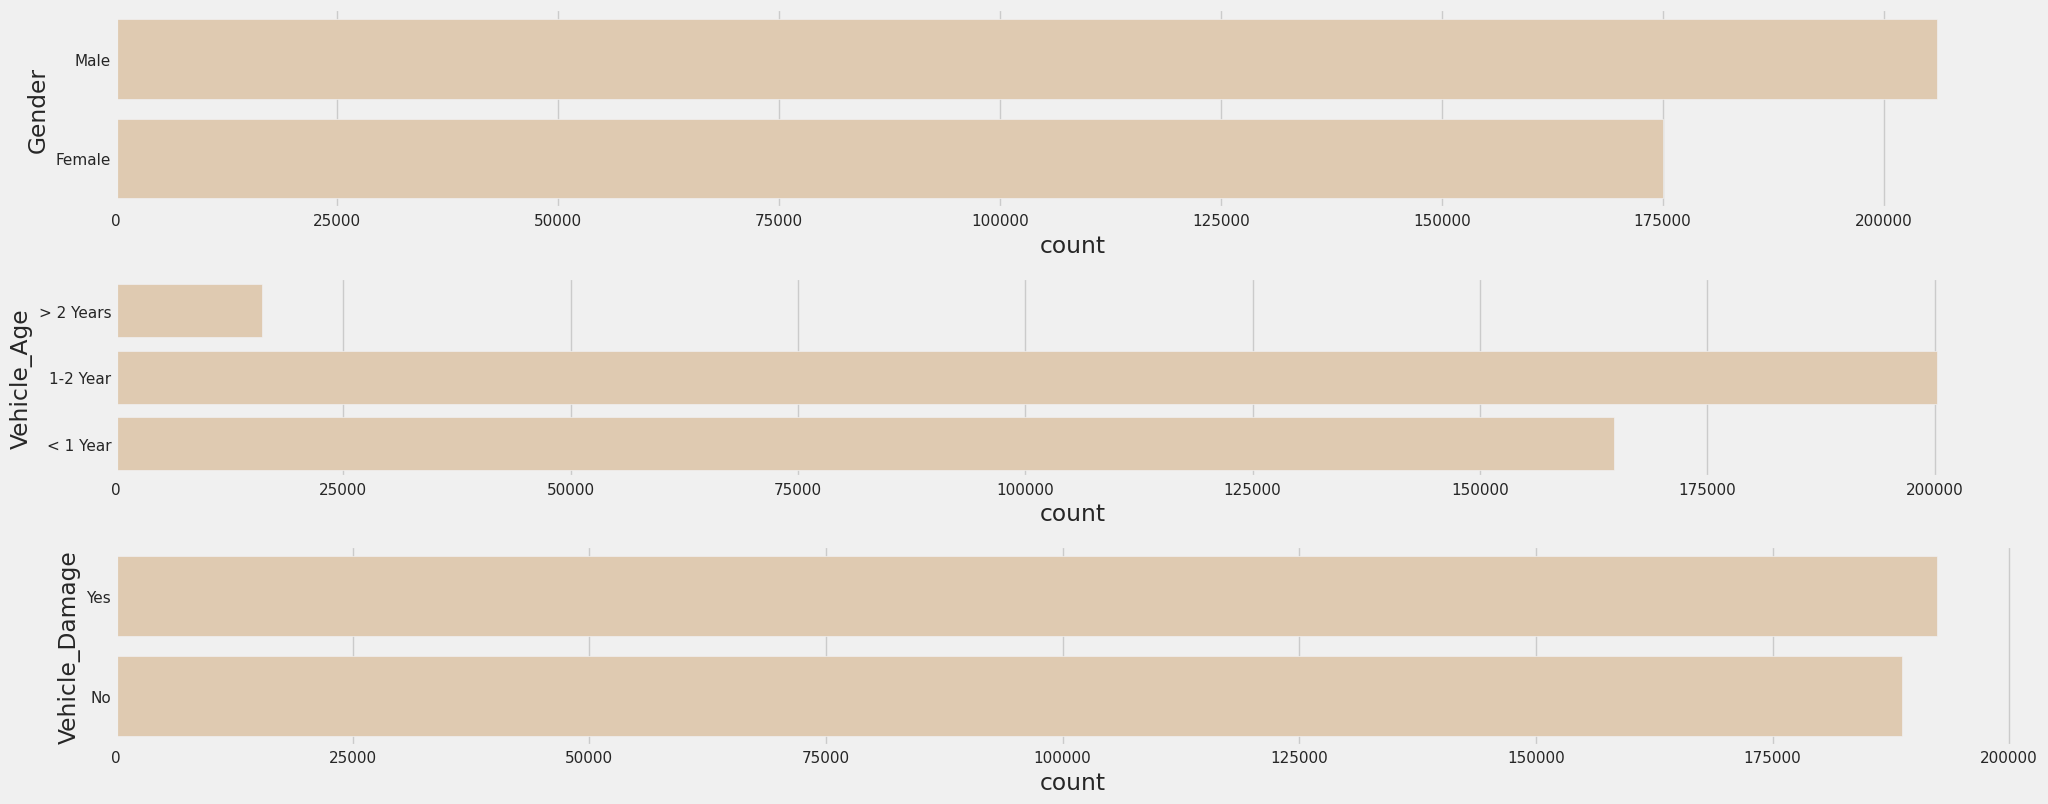

In [ ]:
for i in range(0, len(cats)):
    plt.subplot(len(cats), 1, i+1)
    sns.countplot(y=df[cats[i]], color='#E7CBA9')
    plt.tight_layout()

#### Hasil Observasi =
* Gender : Mayoritas nilai **'Male'**.
* Vehicle_Age : Mayoritas nilai **'1-2 Year'**, disusul dengan '<1 Year' dan yang paling sedikit '>2 Years'.
* Vehicle_Damage : Mayoritas nilai **'Yes'**.

## Kesimpulan

Yang harus di-follow up saat data pre-processing?

> *   **Outliers**, pada kolom Annual_Premium terdapat outliers.
> *   **Distribusi data tidak normal**, banyak kolom yang distribusinya belum seimbang sehingga perlu dilakukan feature transformation.
> *   **Class Imbalance**, melakukan oversampling/undersampling untuk kolom Response dengan perbandingan minimal 1:3.
> *   **Feature Encoding**, pada kolom Vehicle_Age dan Gender  dilakukan label encoding.
> *   Mengubah tipe data, mengubah tipe data Vehicle_Damage menjadi numerik dengan astype()/pd.numeric().

# **Multivariate Analysis**

<Axes: >

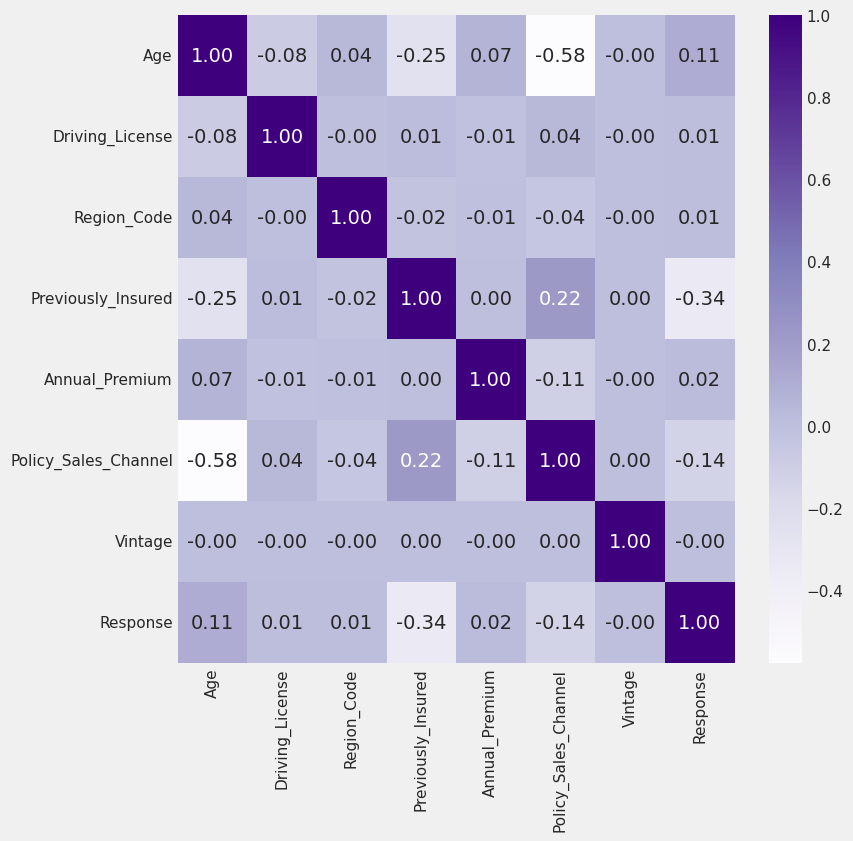

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[num].corr(), cmap='Purples', annot=True, fmt='.2f')

#### Hasil Observasi =

*   Age - Response <br>
    Berkolerasi positif yang sangat rendah. Semakin tua umur semakin berminat terhadap ‘Asuransi Kendaraan’.
*   Region_Code - Response<br>
    Positif namun hampir tidak memiliki kolerasi.
*   Driving_License - Response<br>
    Positif namun hampir tidak memiliki kolerasi.
*   Annual_Premium - Response<br>
Positif namun hampir tidak memiliki kolerasi.
*   Policy_Sales_Channel - Response<br>
Berkolerasi negatif yang sangat rendah. Semakin rendah code channel sales semakin tinggi minat terhadap ‘Asuransi Kendaraan’.
*   Vintage - Response<br>
Tidak memiliki korelasi.
*   Previously_Insured - Response<br>
Berkolerasi negatif. Jika pelanggan belum memiliki ‘Asuransi Kendaraan pelanggan cenderung berminat terhadap ‘Asuransi Kendaraan’. Pelanggan yang tergolong berumur cenderung tidak memiliki asuransi kendaraan sebelumnya.
*   Age - Policy_Sales_Channel<br>
Korelasi negative. Kode media mengontak orang yang cenderung tua menggunakan kode media yang berada di kode kecil.

<Figure size 1500x1500 with 0 Axes>

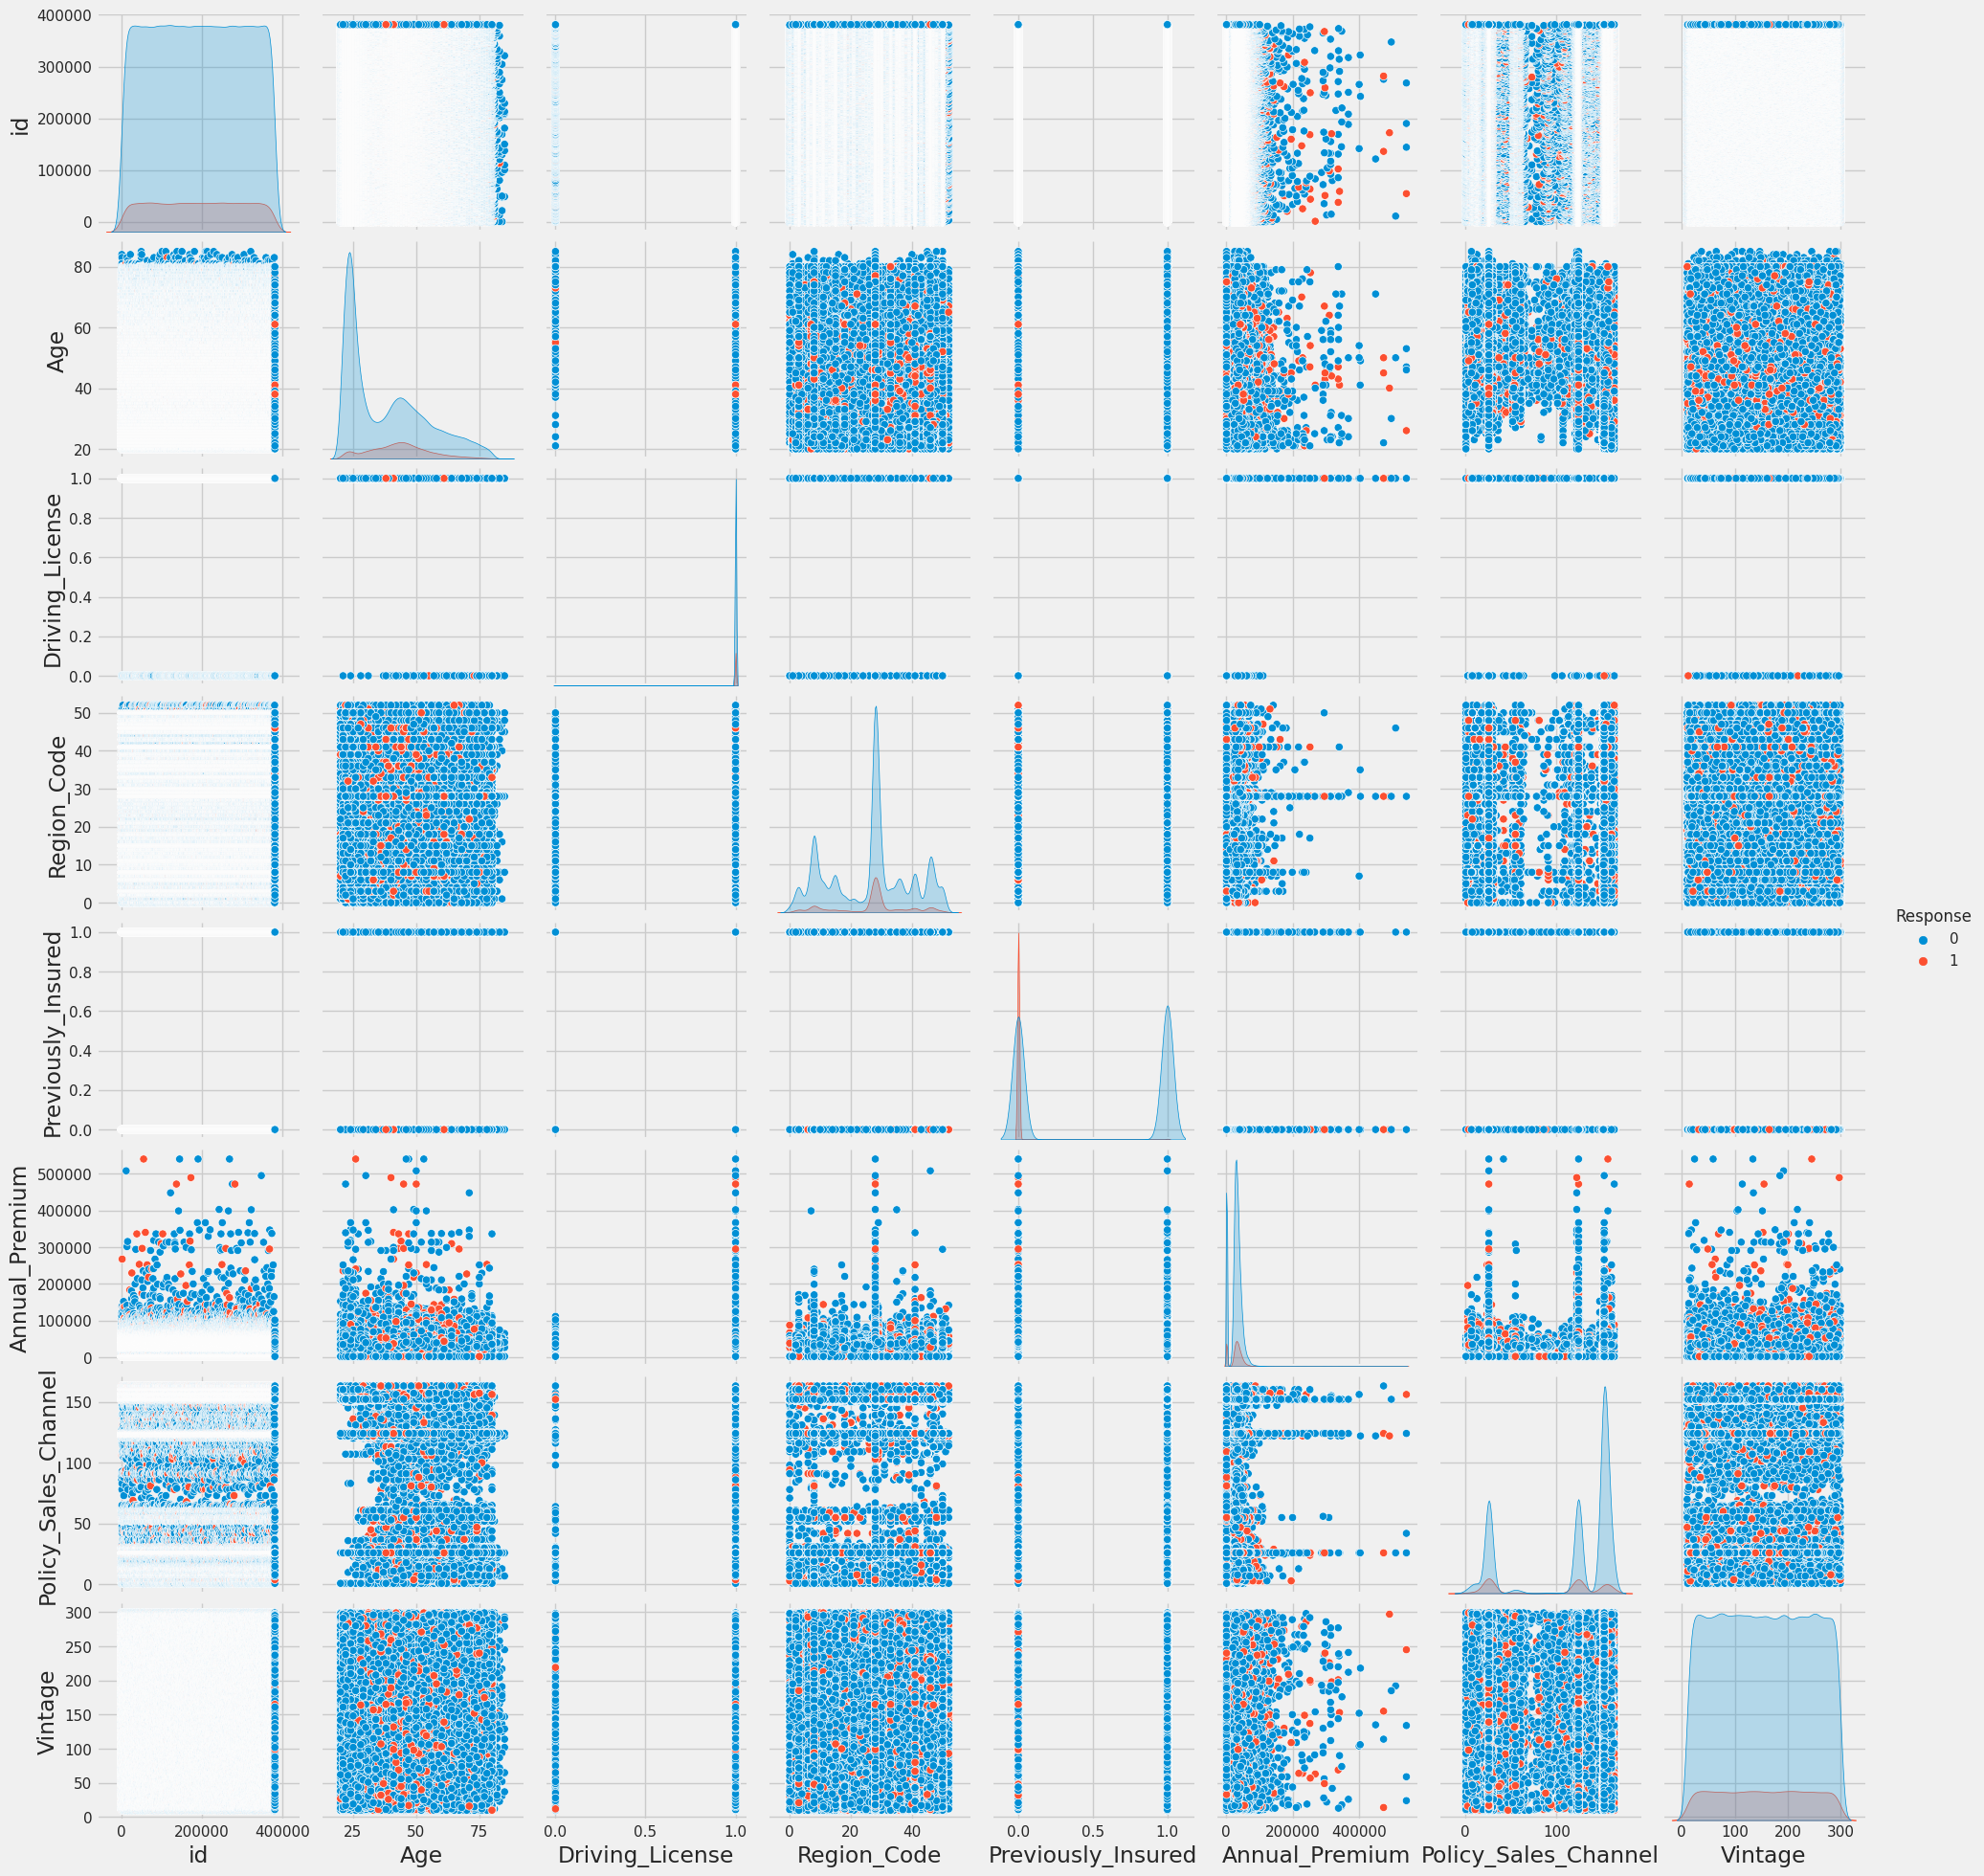

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde',hue='Response')

#### Hasil Observasi =

* Orang-orang yang sebelumnya belum pernah menggunakan asuransi kendaraan  di umur 35 sampai 45 dan juga di umur 60 sampai 65 cenderung menjawab response 1.
* Orang-orang yang mempunyai driving license di umur 35 sampai 45 dan juga di umur 60 sampai 65 cenderung menjawab response 1.

Note: Response 1 yang artinya pelanggan tertarik untuk membeli asuransi kendaraan.


## Kesimpulan
1. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan? <br>

  > * Target memiliki korelasi tinggi dengan Previously_Insured sebesar -0.34 yang berarti berkorelasi negatif.
  > * Target memiliki korelasi tinggi dengan Vehicle_Damage sebesar 0.35 yang berarti berkorelasi positif..
  > * Dari heatmap dapat disimpulkan Age, Vehicle_Age, Previously_Insured, dan Vehicle Damage memiliki kausalitas yang cukup tinggi.


2. Bagaimana korelasi antar-feature, apakah ada pola yang menarik?
  >- Heatmap: <br>
  >Tidak ada kolom numerik yang berkorelasi kuat. <br><br>
Note: korelasi kuat adalah nilai ">0.7" (kemungkinan redundan).<br><br>
  >- Pairplot: <br>
  >   Orang-orang yang sebelumnya belum pernah menggunakan asuransi kendaraan  diumur 35 sampai 45 dan juga diumur 60 sampai 65 cenderung menjawab response 1. <br>
  >   Orang-orang yang mempunyai driving license diumur 35 sampai 45 dan juga diumur 60 sampai 65 cenderung menjawab response 1.<br><br>
Note: Response 1 yang artinya pelanggan tertarik untuk membeli asuransi kendaraan.

# **Business Insight**

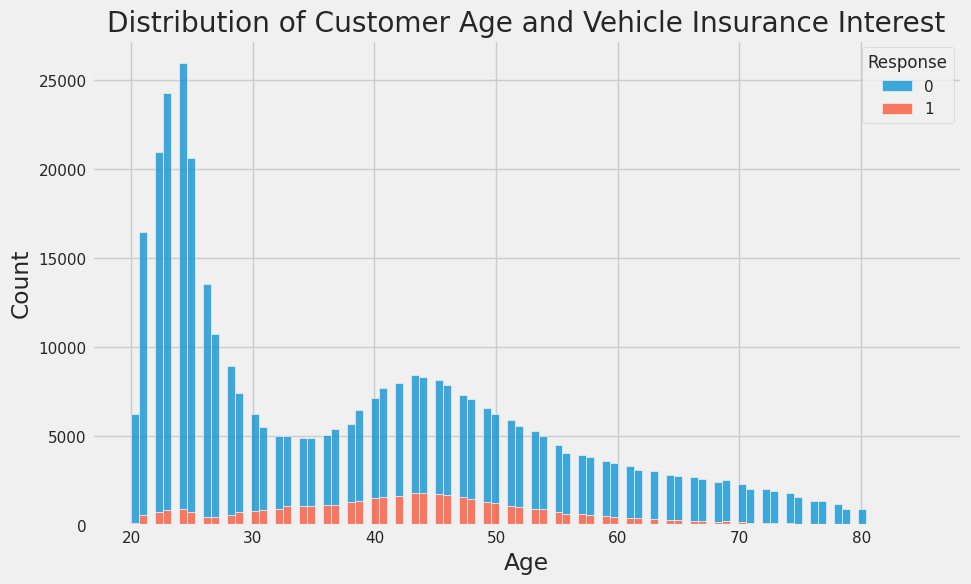

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", hue="Response", multiple="stack")
plt.title("Distribution of Customer Age and Vehicle Insurance Interest")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

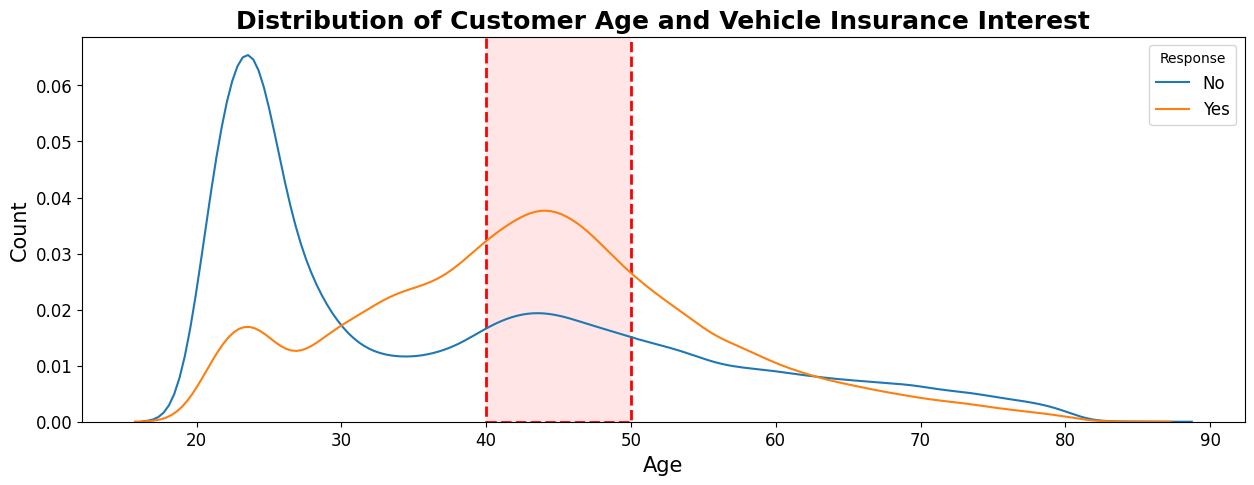

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
sns.distplot(df[df['Response'] == 0]['Age'], hist = False)
sns.distplot(df[df['Response'] == 1]['Age'], hist = False)
plt.legend(title='Response', labels = ['No', 'Yes'], fontsize = 12)
plt.title('Distribution of Customer Age and Vehicle Insurance Interest', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

from matplotlib.patches import Rectangle
import matplotlib.patches as patches
ax.add_patch(Rectangle((40, 0), 10, 0.07, fill=True, facecolor ='red', alpha=0.1))
ax.add_patch(Rectangle((40, 0), 10, 0.07, fill=None, edgecolor='red', alpha=1, linestyle = '--', linewidth = 2))
plt.show()


*   Dilihat dari grafik diatas didapatkan insight bahwa pelanggan asuransi kesehatan paling banyak adalah usia antara 20 sampai 30 tahun, sedangkan **peminat Asuransi kendaraan terbanyak rata-rata di usia 40 sampai 50 tahun**.

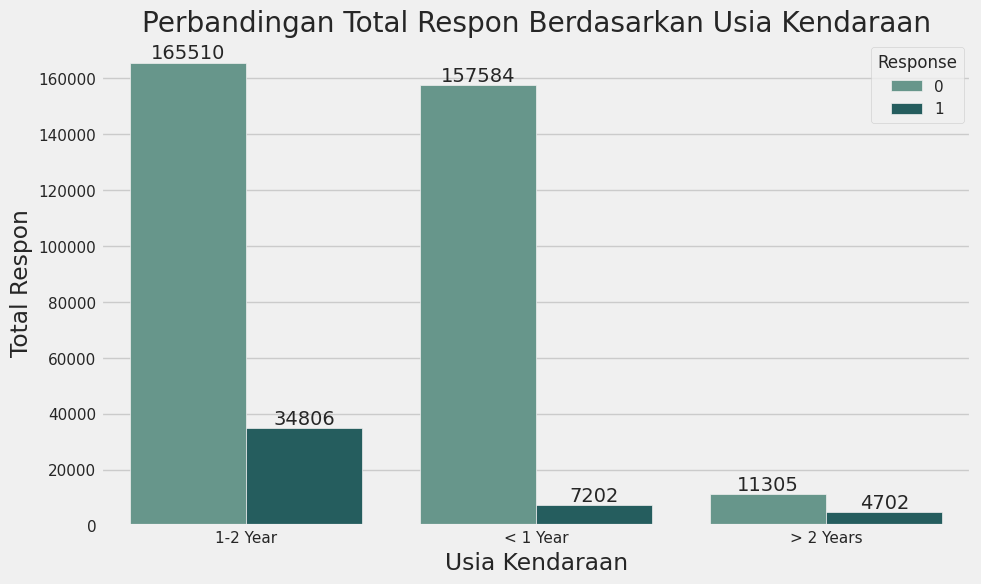

In [ ]:
data1 = df.groupby(['Response', 'Vehicle_Age']).agg({'id'  :'nunique'}).reset_index()
data1.columns = ['Response', 'Vehicle_Age', 'JumlahPelanggan']

plt.figure(figsize=(10,6))
ax = sns.barplot(x="Vehicle_Age", y="JumlahPelanggan", data=data1, estimator=sum, hue="Response", palette=['#5F9E8F', '#1B6767'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Perbandingan Total Respon Berdasarkan Usia Kendaraan")
plt.xlabel("Usia Kendaraan")
plt.ylabel("Total Respon")
plt.show()


*   Berdasarkan dari umur kendaraan pelanggan, mayoritas pelanggan memiliki kendaraan yang berumur 1-2 tahun sebanyak 200.316 pelanggan, diikuti dengan kendaraan <1 tahun sebanyak 164.786 pelanggan, dan kendaraan >2 tahun sebanyak 16.007 pelanggan.
*   Dapat dilihat berdasarkan rasio pelanggan yang memiliki kendaraan 1-2 tahun lebih banyak tertarik terhadap Asuransi Kendaraan dibandingkan pelanggan lain.



In [ ]:
#copy data frame
data = df.copy()

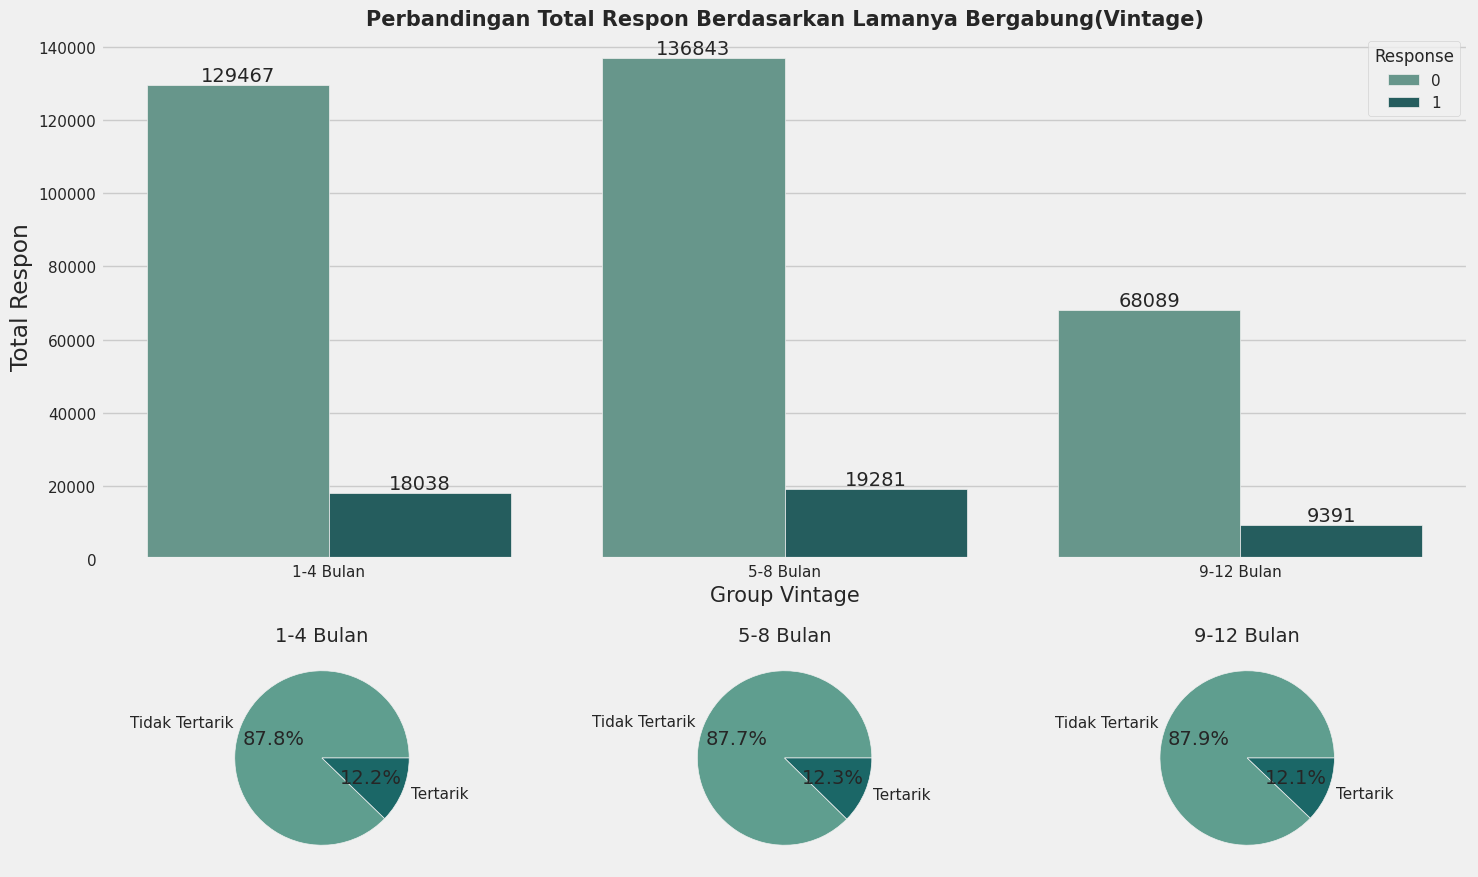

In [ ]:
# convert hari ke bulan
def vintage(x):
    if x['Vintage'] <= 121:
        bulan = '1-4 Bulan'
    elif x['Vintage'] <= 240:
        bulan = '5-8 Bulan'
    elif x['Vintage'] <=365:
        bulan = '9-12 Bulan'
    else:
        bulan = '> 1 Tahun'
    return bulan

#membuat columns baru vintage_bulan
data['Vintage_Bulan'] = data.apply(lambda x: vintage(x), axis=1)

#Groupby
data2 = data.groupby(['Vintage_Bulan', 'Response']).agg({'id'  :'nunique'}).reset_index()
data2.columns = ['Vintage_Bulan', 'Response', 'JumlahPelanggan']


#
fig = plt.figure(figsize=(15,9))

plot1 = plt.subplot2grid((3, 3), (0, 0), rowspan=2, colspan = 3)
plot2 = plt.subplot2grid((3, 3), (2, 0))
plot3 = plt.subplot2grid((3, 3), (2, 1))
plot4 = plt.subplot2grid((3, 3), (2, 2))

#membuat barplot
ax = sns.barplot(x="Vintage_Bulan", y="JumlahPelanggan", data=data2, estimator=sum, hue="Response", palette=['#5F9E8F', '#1B6767'], ax=plot1)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plot1.set_title("Perbandingan Total Respon Berdasarkan Lamanya Bergabung(Vintage)", fontsize=15,fontweight='bold')
plot1.set_xlabel("Group Vintage", fontsize=15)
plot1.set_ylabel("Total Respon")


#membuat pie chart
#Pie Chart
labels = ["Tidak Tertarik", "Tertarik"]
plot2.pie(data[data["Vintage_Bulan"] == "1-4 Bulan"].groupby(["Response"]).size(), labels=labels, colors=['#5F9E8F', '#1B6767'], autopct='%1.1f%%')
plot2.set_title('1-4 Bulan', fontsize=14, ha='center')
plot3.pie(data[data["Vintage_Bulan"] == "5-8 Bulan"].groupby(["Response"]).size(), labels=labels, colors=['#5F9E8F', '#1B6767'], autopct='%1.1f%%')
plot3.set_title('5-8 Bulan', fontsize=14, ha='center')
plot4.pie(data[data["Vintage_Bulan"] == "9-12 Bulan"].groupby(["Response"]).size(), labels=labels, colors=['#5F9E8F', '#1B6767'], autopct='%1.1f%%')
plot4.set_title('9-12 Bulan', fontsize=14, ha='center')


plt.tight_layout()
plt.show()



*   Dari grafik diatas, pelanggan yang
bergabung dengan rentan waktu 5-8 bulan memiliki ketertarikan terhadap
produk ‘Asuransi Kendaraan’ yang cukup
banyak sekitar 19281 pelanggan
dibandingkan pelanggan yang bergabung
dengan rentan waktu lebih dari 9 bulan
(lebih lama bergabung) sekitar 9391
pelanggan
*  Akan tetapi berdasarkan rasio persentase masing-masing vintage masih sangat kecil hanya 12% setiap vintage.



In [ ]:
df_response = pd.DataFrame(df.groupby(['Response'])['Gender'].value_counts())
df_response.columns = ['count']
df_response = df_response.reset_index()

df_gender = pd.DataFrame(df.groupby(['Gender'])['Gender'].value_counts())
df_gender.columns = ['count']
df_gender.reset_index(level=1, drop=True, inplace=True)
df_gender.reset_index(inplace=True)

df_response2 = df_response.merge(df_gender,how='inner',on='Gender')
df_response2['percentage'] = round(df_response2['count_x']/df_response2['count_y']*100,2)

In [ ]:
df_ress = pd.pivot_table(df_response2, index=['Gender'],columns=['Response'],values=['percentage']).reset_index()
df_ress.columns =['Gender','N',"Y"]

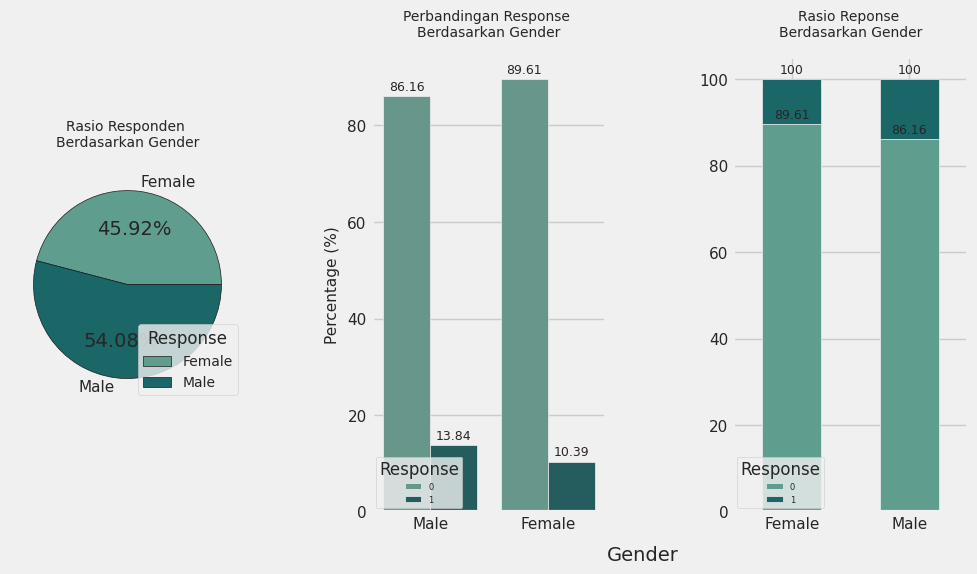

In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 1]})

# Plot 1: Pie Chart
ax[0].pie(df_gender['count'], labels=df_gender['Gender'],
          wedgeprops={"edgecolor": "k"}, autopct='%.2f%%',colors=['#5F9E8F', '#1B6767'])
ax[0].set_title('Rasio Responden \nBerdasarkan Gender', fontsize=10, pad=15, ha='center')
ax[0].legend(title='Response', fontsize=10, loc='lower right')

# Plot 2: Grouped Bar Plot
sns.barplot(x='Gender', y='percentage', data=df_response2,
            hue='Response', ax=ax[1],palette=['#5F9E8F', '#1B6767'])
ax[1].bar_label(ax[1].containers[0], fontsize=9, padding=2)
ax[1].bar_label(ax[1].containers[1], fontsize=9, padding=2)
ax[1].set_title('Perbandingan Response \nBerdasarkan Gender', fontsize=10, pad=15, ha='center')
ax[1].set_ylabel('Percentage (%)', fontsize=11, labelpad=5)
ax[1].set_xlabel('')
ax[1].legend(title='Response', fontsize=6, loc='lower left')
ax[1].text(1.5, -10, s='Gender')

# Plot 3: Stacked Bar Plot
df_ress.plot(kind='bar', stacked=True, figsize=(10, 6),
             ax=ax[2],color=['#5F9E8F', '#1B6767'])
ax[2].bar_label(ax[2].containers[0], fontsize=9, padding=2)
ax[2].bar_label(ax[2].containers[1], fontsize=9, padding=2)
ax[2].set_title('Rasio Reponse \nBerdasarkan Gender', fontsize=10, pad=15, ha='center')
ticksy = ['Female', 'Male']
ax[2].set_xticklabels(ticksy, rotation=0)
ax[2].legend(title='Response', labels=['0', '1'], fontsize=6, loc='lower left')

plt.tight_layout()
plt.show()

* Berdasarkan dari data, mayoritas pelanggan merupakan berjenis kelamin laki-laki sebesar 206.089 (54,08%) orang dari total 381.109 orang, sedangkan 175.020 (45.92%)  adalah perempuan.

* Berdasarkan gender ketertarikan terhadap produk ‘Asuransi Kendaraan’  kebanyakan laki-laki 28.525 (13,84% respon menunjukan ketertarikan) sedangkan, perempuan 18.185 (10.39% respon menunjukan ketertarikan). Lebih banyak laki-laki tertarik terhadap ‘Asuransi Kendaraan’.

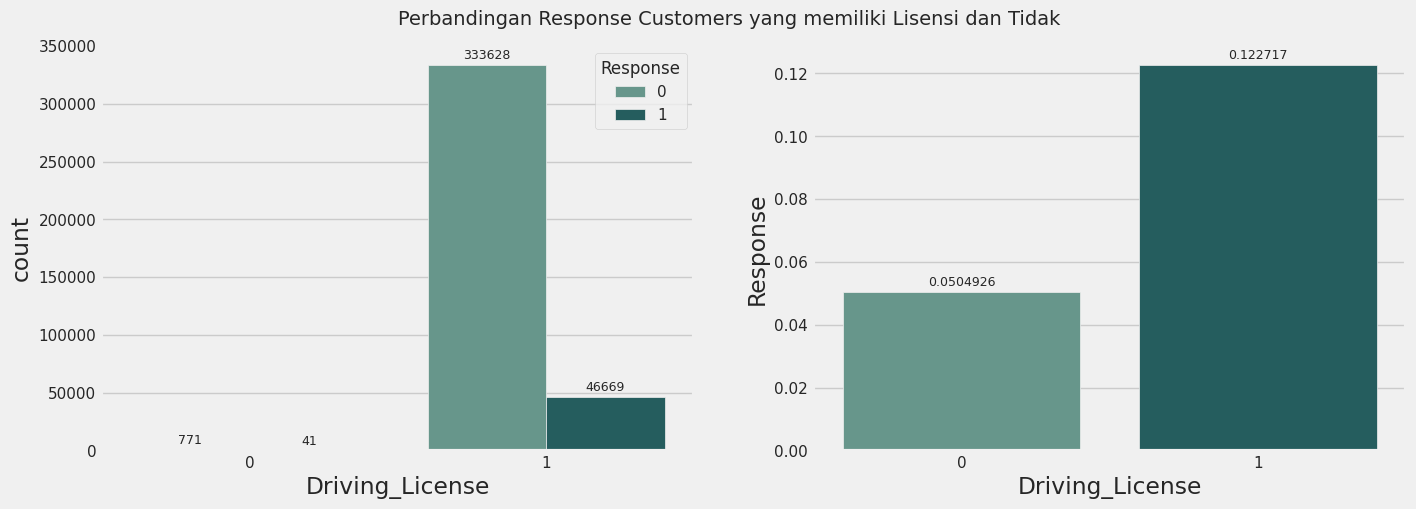

In [ ]:
fig, (ax1,ax2)=plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='Driving_License', data=df, hue='Response', ax=ax1, palette=['#5F9E8F', '#1B6767'])
sns.barplot(x='Driving_License', y='Response', data=df ,ax=ax2, ci=None, palette=['#5F9E8F', '#1B6767'])
ax1.bar_label(ax1.containers[0], fontsize=9, padding=2)
ax1.bar_label(ax1.containers[1], fontsize=9, padding=2)
ax2.bar_label(ax2.containers[0], fontsize=9, padding=2)
ax1.set_title('Perbandingan Response Customers yang memiliki Lisensi dan Tidak', fontsize=14, pad=15, ha='left')
plt.show()

*  Berdasarkan grafik diatas pelanggan yang memiliki Driving Lisensi lebih cenderung tertarik dengan penawaran Asuransi Kendaraan.

In [ ]:
df_response4 = pd.DataFrame(df.groupby(['Response'])['Previously_Insured'].value_counts())
df_response4.columns = ['count']
df_response4 = df_response4.reset_index()

df_insured = pd.DataFrame(df.groupby(['Previously_Insured'])['Previously_Insured'].value_counts())
df_insured.columns = ['count']
df_insured.reset_index(level=1, drop=True, inplace=True)
df_insured.reset_index(inplace=True)

df_insureds = df_response4.merge(df_insured, how='inner', on='Previously_Insured')
df_insureds['percentage'] = round(df_insureds['count_x']/df_insureds['count_y']*100,2)

Text(0, 0.5, 'Persentase (%)')

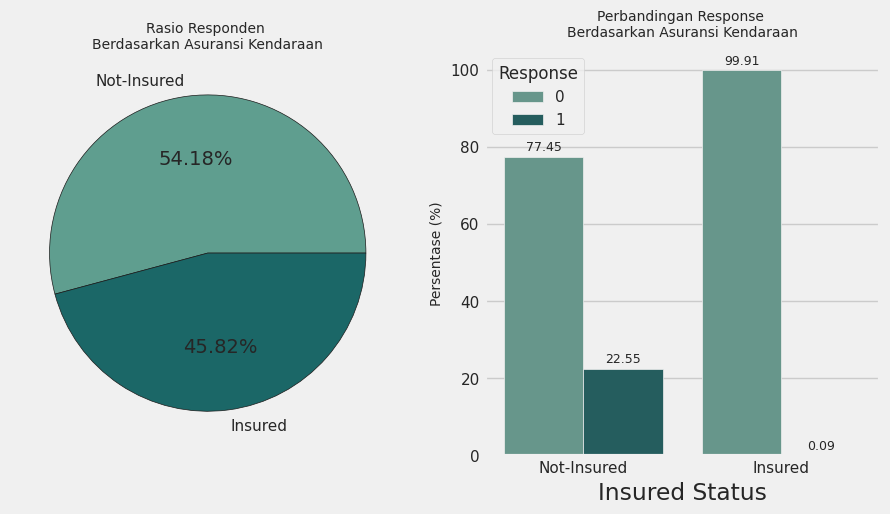

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].pie(df_insured['count'],labels=['Not-Insured','Insured'],colors=['#5F9E8F', '#1B6767'],wedgeprops={'edgecolor':'k'},autopct='%.2f%%')
ax[0].set_title('Rasio Responden \nBerdasarkan Asuransi Kendaraan',fontsize=10,pad=5)

sns.barplot(x='Previously_Insured',y='percentage', data=df_insureds,hue='Response', palette=['#5F9E8F', '#1B6767'],ax=ax[1])
ax[1].bar_label(ax[1].containers[0],fontsize=9,padding=2)
ax[1].bar_label(ax[1].containers[1],fontsize=9,padding=2)
ax[1].set_title('Perbandingan Response \nBerdasarkan Asuransi Kendaraan',fontsize=10,pad=10)
ax[1].set_xticklabels(['Not-Insured','Insured'])
ax[1].set_xlabel('Insured Status')
ax[1].set_ylabel('Persentase (%)', fontsize=10, labelpad=5)

* Dari data terdapat 192.413 pelanggan yang memiliki kendaraan yang buruk dan 188.696 yang memiliki kendaraan yang masih tergolong bagus.

* Berdasarkan dari keadaan kendaraan milik pelanggan, pelanggan yang memiliki kondisi kendaraan yang buruk lebih berminat terhadap ‘Asuransi Kendaraan’ dengan total 45.728 orang menjawab ‘Berminat’ dibandingkan pelanggan yang memiliki kendaraan yang masih tergolong bagus, dimana hanya 982 orang menjawab ‘Berminat’.

In [ ]:
df_response3 = pd.DataFrame(df.groupby(['Response'])['Vehicle_Damage'].value_counts())
df_response3.columns = ['count']
df_response3 = df_response3.reset_index()

df_damage = pd.DataFrame(df.groupby(['Vehicle_Damage'])['Vehicle_Damage'].value_counts())
df_damage.columns = ['count']
df_damage.reset_index(level=1, drop=True, inplace=True)
df_damage.reset_index(inplace=True)

df_damages = df_response3.merge(df_damage,how='inner',on='Vehicle_Damage')
df_damages['percentage'] = round(df_damages['count_x']/df_damages['count_y']*100,2)

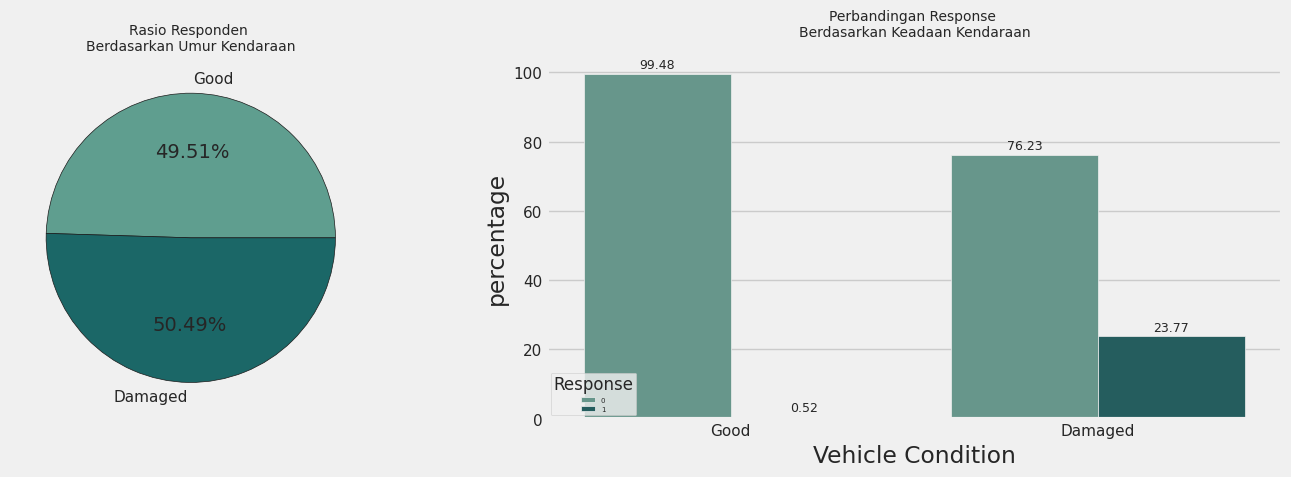

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].pie(df_damage['count'], labels = ['Good','Damaged'], colors=['#5F9E8F', '#1B6767'],
          wedgeprops={"edgecolor":"k"}, autopct='%.2f%%')
ax[0].set_title('Rasio Responden \nBerdasarkan Umur Kendaraan', fontsize=10, pad=5, ha='center')

sns.barplot(x='Vehicle_Damage',y='percentage', data=df_damages, hue='Response', palette=['#5F9E8F', '#1B6767'],ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fontsize=9, padding=2)
ax[1].bar_label(ax[1].containers[1], fontsize=9, padding=2)
ticksy=['Good','Damaged']
ax[1].set_xticklabels(ticksy)
ax[1].set_title('Perbandingan Response \nBerdasarkan Keadaan Kendaraan', fontsize=10, pad=15, ha='center')

ax[1].set_xlabel('Vehicle Condition')
ax[1].legend(title='Response',fontsize=5,loc='lower left')

plt.tight_layout()

* Dari 206.481 pelanggan yang belum memiliki ‘Asuransi Kendaraan’ terdapat 22.55% (46.552 orang) berminat terhadap ‘Asuransi Kendaraan’ yang ditawarkan oleh perusahaan dan 174.628 pelanggan yang sudah memiliki ‘Asuransi Kendaraan’ dimana walaupun sudah memiliki terdapat 0.09% (158 orang) juga berminat.

* Pelanggan yang belum memiliki ‘Asuransi Kendaraan’ sebelumnya lebih berminat terhadap produk cross-selling ‘Asuransi Kendaraan’.

Target dari modelling classification ini adalah kolom **`Response`**.

# Data Cleansing

## Missing Value

In [ ]:
# Melihat jumlah baris dan kolom
test = df.shape[0]

# Mengecek missing value ditiap fitur
missing_values_count = df.isnull().sum()
missing_values_count

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
# Melakukan pengecekan terhadap karakter tertentu yang mungkin termasuk NaN/NULL
chara = ["-"," ","","."]

v_break = False

for i, row in df.iterrows():
    for column in df.columns:
        for z in chara:
            if row[column] == z:
                print(f"Terdapat {z} di baris {i}, kolom {column}")
                v_break = True
                break
        if v_break:
            break

if not v_break:
    print(f"Tidak ditemukan")

Tidak ditemukan


Setelah dilakukan pengecekan terhadap NULL/NaN values, tidak terdapat NULL/NaN pada dataset.

## Duplicated data


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(subset=['id'],keep=False).sum()

0

Setelah dilakukan pengecekan terhadap duplicated values, tidak terdapat data duplikasi pada dataset.

## Outliers

Dari grafik yang kita dapat ketika EDA yang telah dilakukan di Stage 1, kita tahu `Annual Premium` memiliki outliers yang cukup extreme sehingga ditangani dengan penghapusan IQR ataupun capping.

In [ ]:
# membuat function untuk mencari IQR
d = df.shape[0]
a = ['Annual_Premium']
def find_limit(df, variables) :
    q1 = df[variables].quantile(0.25)
    q3 = df[variables].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)
    return lower_limit, upper_limit

In [ ]:
# Membuang value outliers
df_clean = df.copy()

for i in a :
    lower, upper = find_limit(df_clean, i)
    df_clean = df_clean[~((df_clean[i] < lower) | (df_clean[i] > upper))]

df_clean = df_clean.reset_index(drop = True)

print(f'Jumlah baris sebelum memfilter outlier: {d}')
print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')
print(f'Sebanyak {d-len(df_clean)} rows dihapuskan atau {round(((d-len(df_clean))/d)*100,2)} %')

Jumlah baris sebelum memfilter outlier: 381109
Jumlah baris setelah memfilter outlier: 370789
Sebanyak 10320 rows dihapuskan atau 2.71 %


In [ ]:
# Capping : Mengubah outlier value menjadi upper (atau) lower
df_cap = df.copy()

for i in a :
    lower, upper = find_limit(df_cap, i)
    df_cap.loc[(df_cap[i] > upper), i] = upper
    df_cap.loc[(df_cap[i] < lower), i] = lower

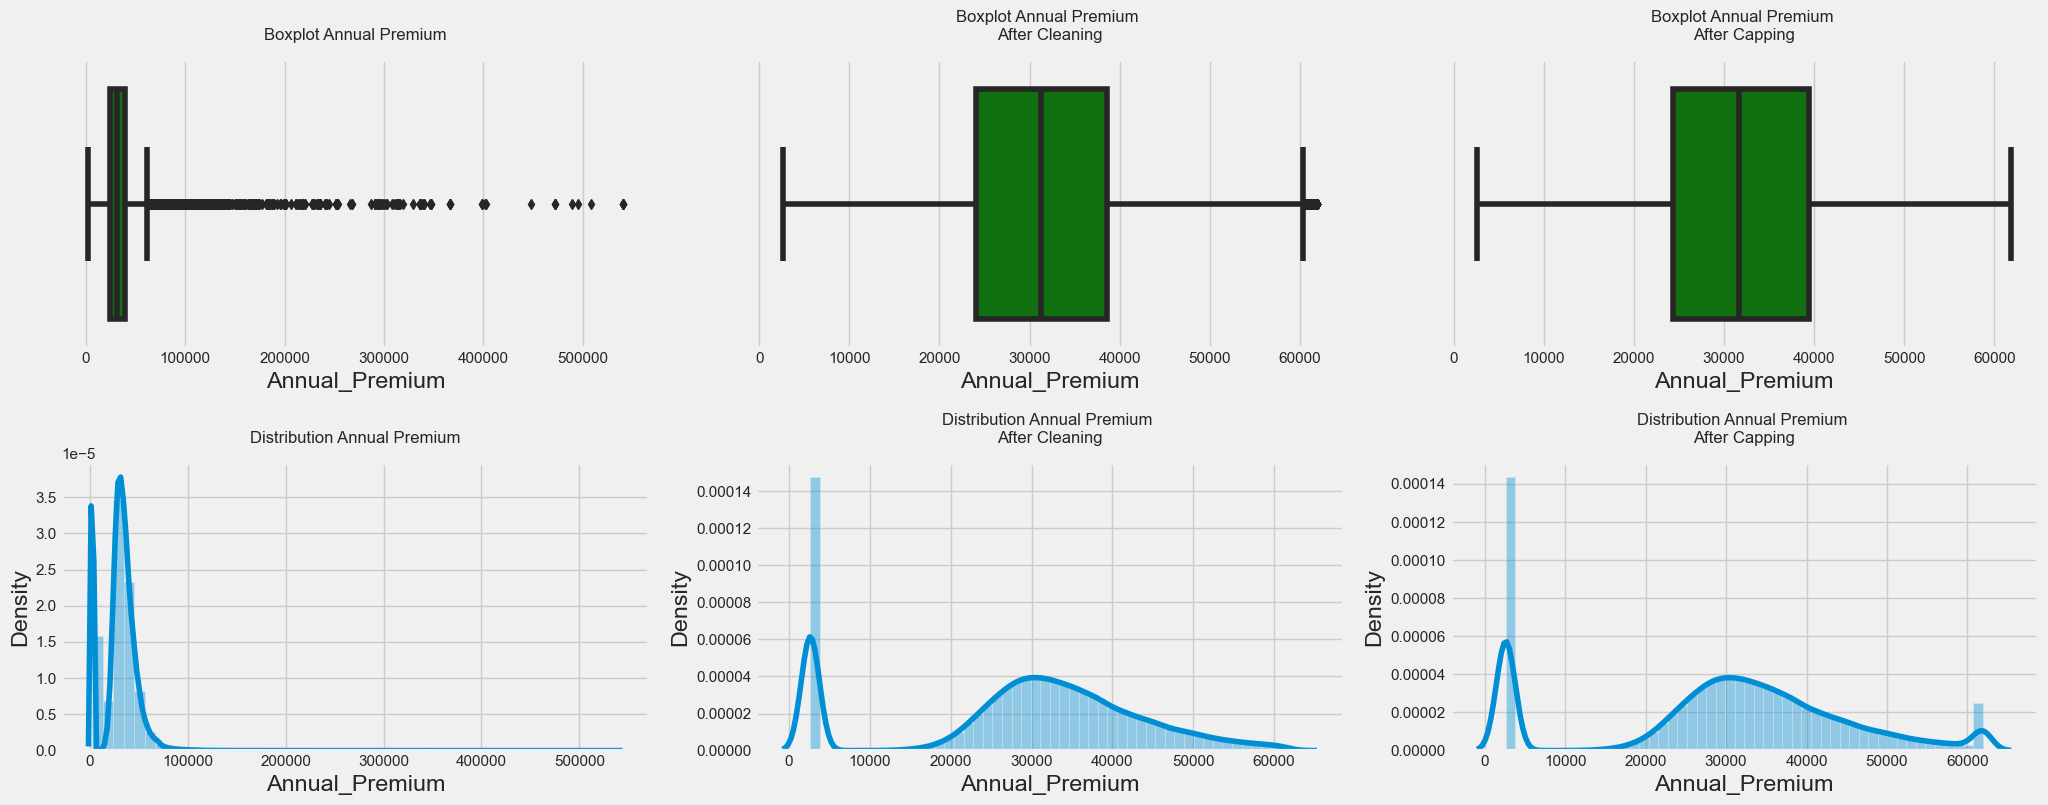

In [ ]:
fig, ax = plt.subplots(2,3)

sns.boxplot(x=df['Annual_Premium'], color='green',orient='h',ax=ax[0,0])
ax[0,0].set_title('Boxplot Annual Premium', fontsize=12, pad=15, ha='center')
sns.distplot(df['Annual_Premium'], kde=True,ax=ax[1,0])
ax[1,0].set_title('Distribution Annual Premium', fontsize=12, pad=15, ha='center')

sns.boxplot(x=df_clean['Annual_Premium'], color='green',orient='h',ax=ax[0,1])
ax[0,1].set_title('Boxplot Annual Premium \nAfter Cleaning', fontsize=12, pad=15, ha='center')
sns.distplot(df_clean['Annual_Premium'], kde=True,ax=ax[1,1])
ax[1,1].set_title('Distribution Annual Premium \nAfter Cleaning', fontsize=12, pad=15, ha='center')

sns.boxplot(x=df_cap['Annual_Premium'], color='green',orient='h',ax=ax[0,2])
ax[0,2].set_title('Boxplot Annual Premium \nAfter Capping', fontsize=12, pad=15, ha='center')
sns.distplot(df_cap['Annual_Premium'], kde=True,ax=ax[1,2])
ax[1,2].set_title('Distribution Annual Premium \nAfter Capping', fontsize=12, pad=15, ha='center')

plt.tight_layout()

Diputuskan untuk tetap menggunakan dataframe df karena, kolom `Annual_Premium` merupakan hal yang normal jika terdapat outliers sehingga tidak dilakukan penghapusan outliers. Hal ini juga didasarkan dengan pertimbangan pembuatan model yang robust terhadap outliers.

## Feature encoding

Mengubah `Vehicle_Damage` ke integer dalam = 0: Kendaraan customer belum pernah rusak, 1: Kendaraan customer sudah pernah rusak, serta `Vehicle_Age` dam 0: < 1 Year, 1: 1-2 Years, 2: > 2 Years. Serta `Gender` dengan *One Hot Encoding*. Melakukan konversi ke angka mulai dari 0 untuk memudahkan kerja machine learning. Mengubah kolom dengan datatype bool ke int agar lebih mudah diproses oleh model.

In [ ]:
for i in ['Gender']:
    onehots = pd.get_dummies(df['Gender'], prefix='Gen')
    df = df.join(onehots)

df[['Gen_Female','Gen_Male']] = df[['Gen_Female','Gen_Male']].astype(int)

In [ ]:
mapping_damage = {'Yes' : 1, 'No' : 0}
df['Vehicle_Damage'] = df['Vehicle_Damage'].map(mapping_damage)


In [ ]:
mapping_age = {'> 2 Years' : 2, '1-2 Year' : 1, '< 1 Year' : 0}
df['Vehicle_Age'] = df['Vehicle_Age'].map(mapping_age)

In [ ]:
df.sample(2, random_state=42)

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
200222  200223  Female   21                1          3.0                   1   
49766    49767    Male   55                1         15.0                   0   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
200222            0               0         20408.0                 160.0   
49766             1               1         37498.0                  26.0   

        Vintage  Response  Gen_Female  Gen_Male  
200222       72         0           1         0  
49766       102         0           0         1

## Class Imbalance

In [ ]:
# Melihat berapa dejarat ketimpangan pada class

for i in range(len(df['Response'].value_counts())):
    a = round(df['Response'].value_counts()[i]/df.shape[0]*100,2)
    print(f'{a}%')

print('Degree of Imbalance dari data ini termasuk pada Moderate Imbalance')

87.74%
12.26%
Degree of Imbalance dari data ini termasuk pada Moderate Imbalance


Penanganan Class Imbalance dilakukan dengan ***oversampling*** dan ***undersampling*** dengan pertimbangan agar data tidak cenderung bias, dimana selisih antara kedua value 0 dan 1 lebih dari 50% sehingga jika dilakukan *oversampling* tidak menjamin akan adanya peningkatan performansi machine learning, namun dibutuhkan pula oversampling agar data tidak underfit.

In [ ]:
# Membuat kolom baru untuk melihat Class 'Yes'

df['Res_class'] = df['Response']==1
df['Res_class'].value_counts()

Res_class
False    334399
True      46710
Name: count, dtype: int64

In [ ]:
# Memisahkan dataframe tanpa Response dan Res_class dan hanya Res_class
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Response', 'Res_class']]]
y = df['Res_class'].values
print(X.shape)
print(y.shape)

(381109, 12)
(381109,)


In [ ]:
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(sampling_strategy=0.3, random_state=42).fit_resample(X, y)

In [ ]:
pd.Series(y_over_SMOTE).value_counts()

False    334399
True     100319
Name: count, dtype: int64

In [ ]:
X_over_SMOTE['Response'] = y_over_SMOTE.astype(int)
df = X_over_SMOTE.copy()

In [ ]:
# Memisahkan dataframe tanpa Response dan Res_class dan hanya Res_class
df['Res_class'] = df['Response']==1
df['Res_class'].value_counts()
X2 = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Response', 'Res_class']]]
y2 = df['Res_class'].values
print(X2.shape)
print(y2.shape)

(434718, 12)
(434718,)


In [ ]:
X_under, y_under = under_sampling.RandomUnderSampler(sampling_strategy=1, random_state=42).fit_resample(X2, y2)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('OVERSAMPLING SMOTE & UNDERSAMPLING')
print('')
print(pd.Series(y_under).value_counts())

Original
False    334399
True      46710
Name: count, dtype: int64


OVERSAMPLING SMOTE & UNDERSAMPLING

False    100319
True     100319
Name: count, dtype: int64


In [ ]:
X_under['Response'] = y_under.astype(int)
df = X_under.copy()

# Feature Engineering

## Feature Selection

In [ ]:
df.drop(columns=['id'], axis=1, inplace=True)

<Axes: >

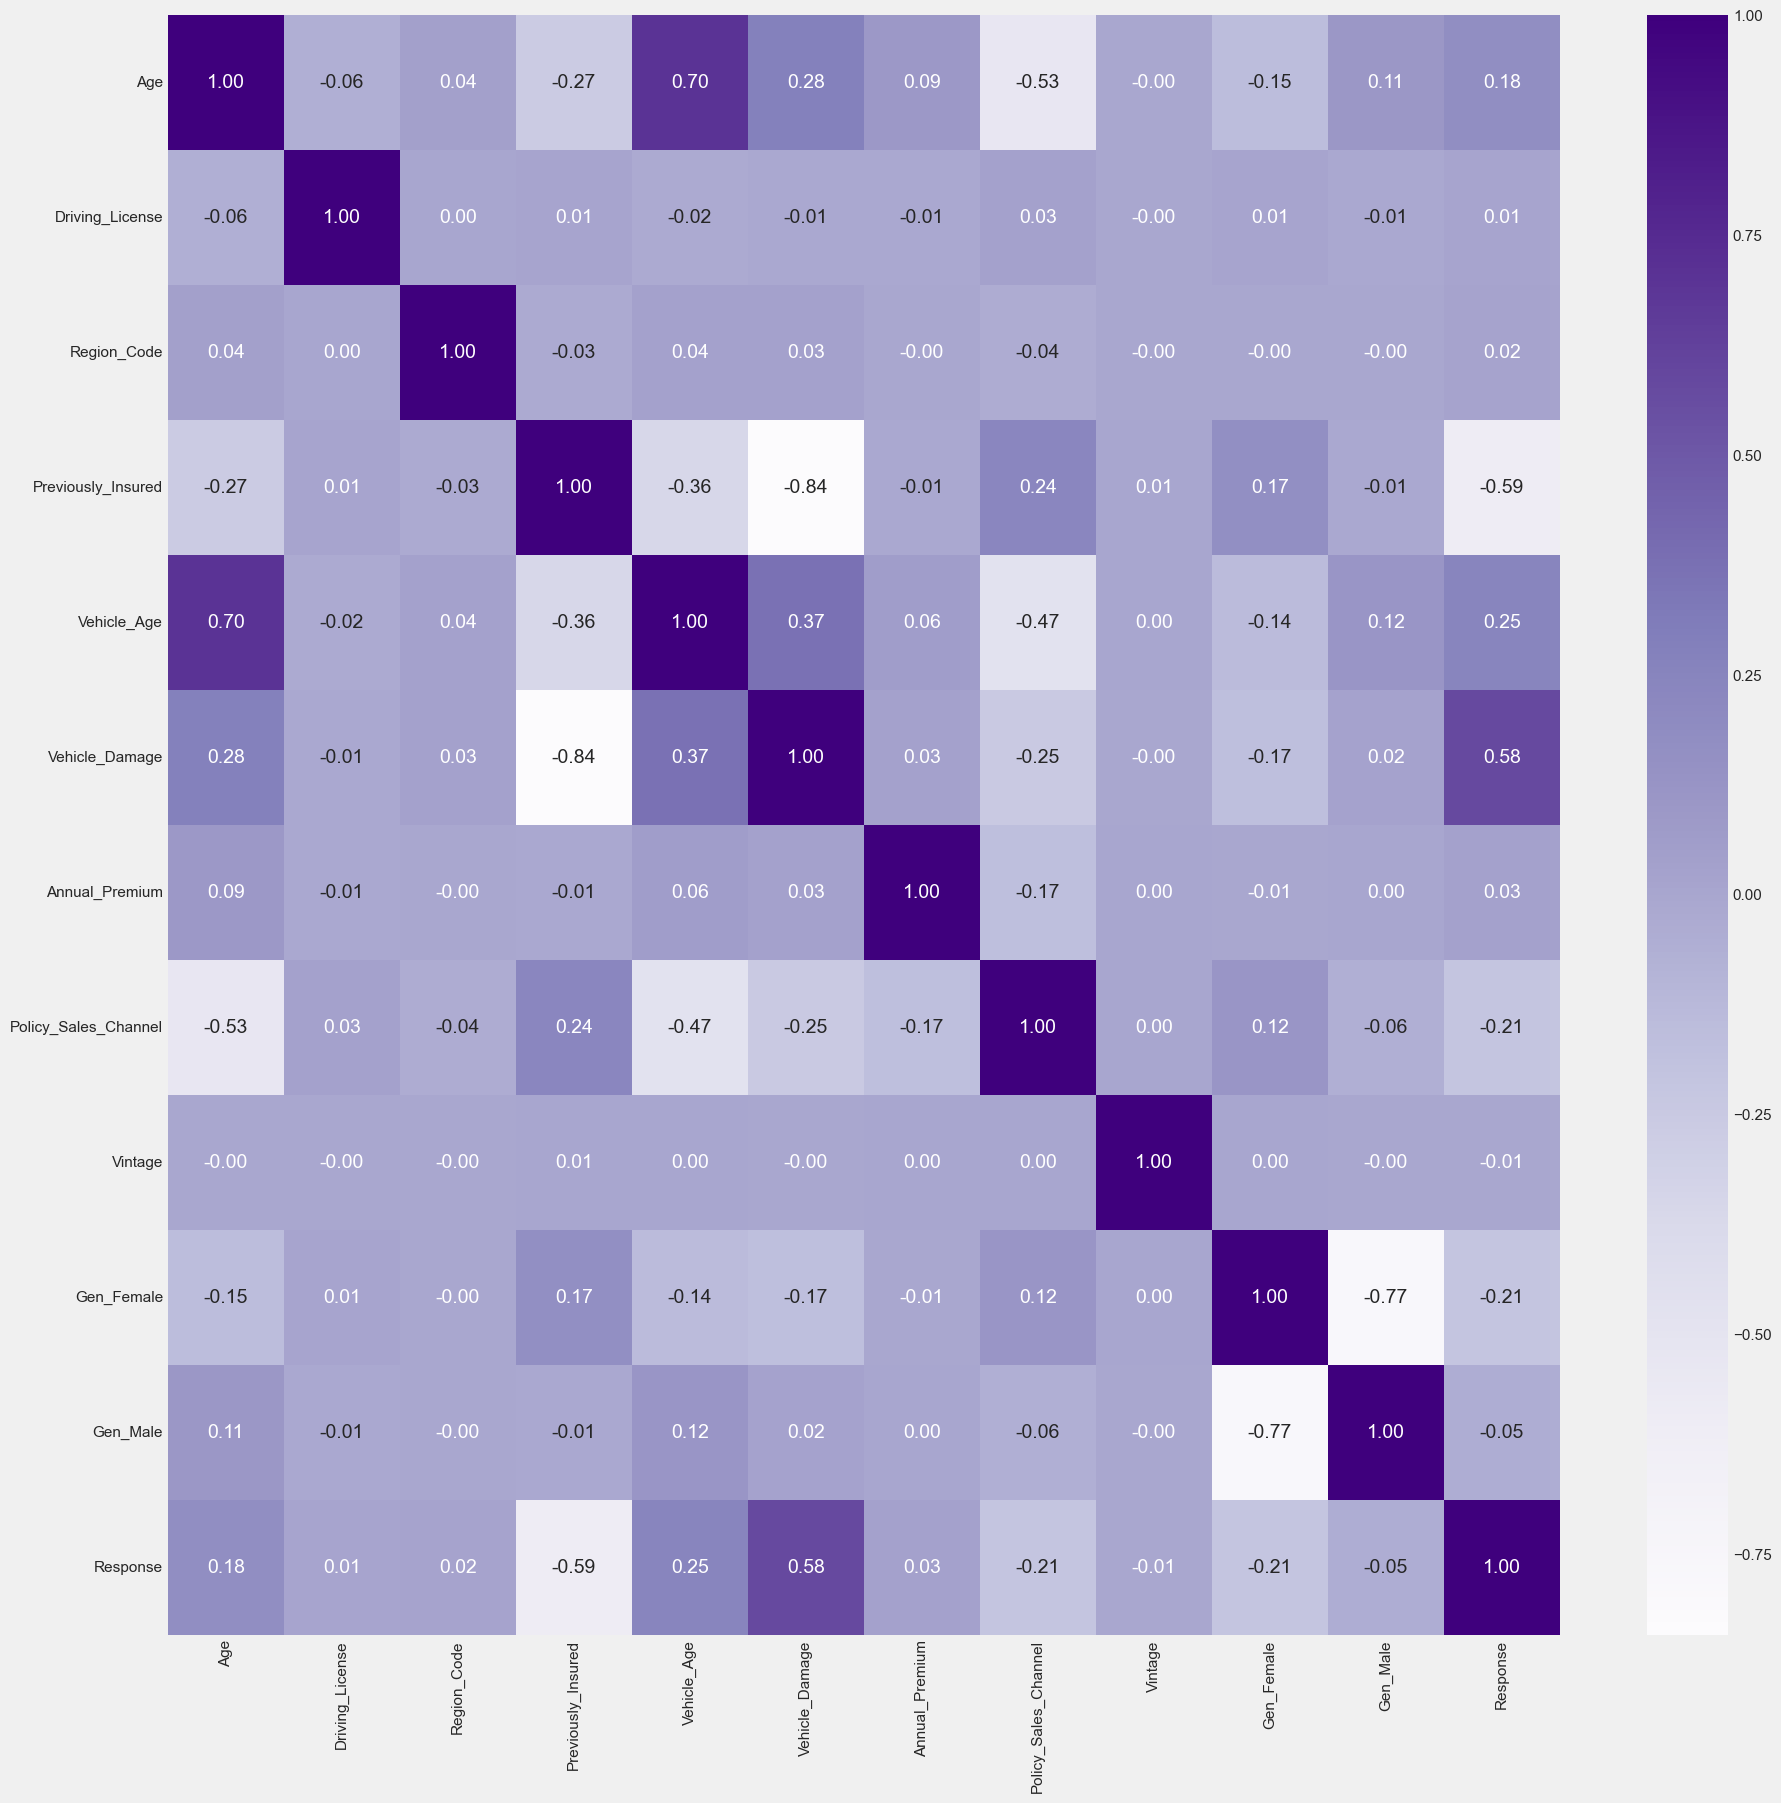

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='Purples', annot=True, fmt='.2f')

Dari heatmap dapat didapatkan insight bahwa, `Age` dan `Vehicle_Age` merupakan kolom redundant sehingga diputuskan untuk tidak menggunakan pada kolom `Age` dengan pertimbangan kolom `Age` memiliki korelasi lebih kecil dibandingkan `Vehicle_Age`.

## Feature Extraction

In [ ]:
# Membuat fitur kategori baru dari Age dengan mengelompokkan YoungAdults 17 - 30, MiddleAged 31-45, OldAdults > 45
Age_Group = []
for i in df['Age']:
    if 17 <= i <=30:
        Age_Group.append(0)
    elif 31 <= i <= 45:
        Age_Group.append(1)
    else:
        Age_Group.append(2)

df['Age_Group'] = Age_Group
df

Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
79509    22                1    19.000000                   1            0   
186554   57                1    18.000000                   0            1   
158036   64                1    28.000000                   0            1   
343705   52                1    41.000000                   1            1   
137902   21                1     7.000000                   0            0   
...     ...              ...          ...                 ...          ...   
434713   59                1    32.622736                   0            1   
434714   23                1    16.460178                   0            0   
434715   63                1    26.720202                   0            1   
434716   46                1    28.000000                   0            1   
434717   38                1    22.259640                   0            1   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
79509                0    54559.000000            152.000000       87   
186554               1    33439.000000            124.000000       63   
158036               1    39327.000000            122.000000       45   
343705               0    26536.000000            124.000000      161   
137902               0    28416.000000            152.000000       92   
...                ...             ...                   ...      ...   
434713               1    39675.071349             67.184377      232   
434714               1    37111.150397            147.705007      217   
434715               1    46763.984536             61.289917      102   
434716               1    31261.324288             90.890096      143   
434717               1    32668.038559            111.817477      131   

        Gen_Female  Gen_Male  Response  Age_Group  
79509            1         0         0          0  
186554           0         1         0          2  
158036           1         0         0          2  
343705           0         1         0          2  
137902           1         0         0          0  
...            ...       ...       ...        ...  
434713           0         1         1          2  
434714           0         0         1          0  
434715           0         1         1          2  
434716           0         1         1          2  
434717           0         0         1          1  

[200638 rows x 13 columns]

In [ ]:
# Melakukan ekstrasi dari kolom Annual_Premium dengan LowPremium < 24406, MediumPremium 24406 - 61892.4 dan HighPremium > 61892.4
c = []

for i in df['Annual_Premium']:
    if i <=  24405:
        c.append(0)
    elif 24406 <= i <= 61892.4:
        c.append(1)
    else:
        c.append(2)

df['Premium_cat'] = c
df

Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
79509    22                1    19.000000                   1            0   
186554   57                1    18.000000                   0            1   
158036   64                1    28.000000                   0            1   
343705   52                1    41.000000                   1            1   
137902   21                1     7.000000                   0            0   
...     ...              ...          ...                 ...          ...   
434713   59                1    32.622736                   0            1   
434714   23                1    16.460178                   0            0   
434715   63                1    26.720202                   0            1   
434716   46                1    28.000000                   0            1   
434717   38                1    22.259640                   0            1   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
79509                0    54559.000000            152.000000       87   
186554               1    33439.000000            124.000000       63   
158036               1    39327.000000            122.000000       45   
343705               0    26536.000000            124.000000      161   
137902               0    28416.000000            152.000000       92   
...                ...             ...                   ...      ...   
434713               1    39675.071349             67.184377      232   
434714               1    37111.150397            147.705007      217   
434715               1    46763.984536             61.289917      102   
434716               1    31261.324288             90.890096      143   
434717               1    32668.038559            111.817477      131   

        Gen_Female  Gen_Male  Response  Age_Group  Premium_cat  
79509            1         0         0          0            1  
186554           0         1         0          2            1  
158036           1         0         0          2            1  
343705           0         1         0          2            1  
137902           1         0         0          0            1  
...            ...       ...       ...        ...          ...  
434713           0         1         1          2            1  
434714           0         0         1          0            1  
434715           0         1         1          2            1  
434716           0         1         1          2            1  
434717           0         0         1          1            1  

[200638 rows x 14 columns]

In [ ]:
# Melakukan ekstrasi kolom Policy_Sales_Channel berdasarkan value_counts
p = df['Policy_Sales_Channel'].value_counts()
Policy_cat = p.apply(lambda x : 3 if x>=16455 else 2 if 8227<x<16455 else 1 if x<=8227 else 0)
Policy_cat = dict(zip(Policy_cat.keys(),Policy_cat.values))
df['Policy_cat'] = df['Policy_Sales_Channel'].map(Policy_cat)
df

Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
79509    22                1    19.000000                   1            0   
186554   57                1    18.000000                   0            1   
158036   64                1    28.000000                   0            1   
343705   52                1    41.000000                   1            1   
137902   21                1     7.000000                   0            0   
...     ...              ...          ...                 ...          ...   
434713   59                1    32.622736                   0            1   
434714   23                1    16.460178                   0            0   
434715   63                1    26.720202                   0            1   
434716   46                1    28.000000                   0            1   
434717   38                1    22.259640                   0            1   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
79509                0    54559.000000            152.000000       87   
186554               1    33439.000000            124.000000       63   
158036               1    39327.000000            122.000000       45   
343705               0    26536.000000            124.000000      161   
137902               0    28416.000000            152.000000       92   
...                ...             ...                   ...      ...   
434713               1    39675.071349             67.184377      232   
434714               1    37111.150397            147.705007      217   
434715               1    46763.984536             61.289917      102   
434716               1    31261.324288             90.890096      143   
434717               1    32668.038559            111.817477      131   

        Gen_Female  Gen_Male  Response  Age_Group  Premium_cat  Policy_cat  
79509            1         0         0          0            1           3  
186554           0         1         0          2            1           3  
158036           1         0         0          2            1           1  
343705           0         1         0          2            1           3  
137902           1         0         0          0            1           3  
...            ...       ...       ...        ...          ...         ...  
434713           0         1         1          2            1           1  
434714           0         0         1          0            1           1  
434715           0         1         1          2            1           1  
434716           0         1         1          2            1           1  
434717           0         0         1          1            1           1  

[200638 rows x 15 columns]

In [ ]:
# Melakukan ekstrasi kolom Region_Code berdasarkan value_counts
r = df['Region_Code'].value_counts()
Region_cat = r.apply(lambda x : 2 if x > 8339 else 1 if 2611<=x<=8339 else 0)
Region_cat = dict(zip(Region_cat.keys(),Region_cat.values))
df['Region_cat'] = df['Region_Code'].map(Region_cat)
df

Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
79509    22                1    19.000000                   1            0   
186554   57                1    18.000000                   0            1   
158036   64                1    28.000000                   0            1   
343705   52                1    41.000000                   1            1   
137902   21                1     7.000000                   0            0   
...     ...              ...          ...                 ...          ...   
434713   59                1    32.622736                   0            1   
434714   23                1    16.460178                   0            0   
434715   63                1    26.720202                   0            1   
434716   46                1    28.000000                   0            1   
434717   38                1    22.259640                   0            1   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
79509                0    54559.000000            152.000000       87   
186554               1    33439.000000            124.000000       63   
158036               1    39327.000000            122.000000       45   
343705               0    26536.000000            124.000000      161   
137902               0    28416.000000            152.000000       92   
...                ...             ...                   ...      ...   
434713               1    39675.071349             67.184377      232   
434714               1    37111.150397            147.705007      217   
434715               1    46763.984536             61.289917      102   
434716               1    31261.324288             90.890096      143   
434717               1    32668.038559            111.817477      131   

        Gen_Female  Gen_Male  Response  Age_Group  Premium_cat  Policy_cat  \
79509            1         0         0          0            1           3   
186554           0         1         0          2            1           3   
158036           1         0         0          2            1           1   
343705           0         1         0          2            1           3   
137902           1         0         0          0            1           3   
...            ...       ...       ...        ...          ...         ...   
434713           0         1         1          2            1           1   
434714           0         0         1          0            1           1   
434715           0         1         1          2            1           1   
434716           0         1         1          2            1           1   
434717           0         0         1          1            1           1   

        Region_cat  
79509            0  
186554           0  
158036           2  
343705           1  
137902           0  
...            ...  
434713           0  
434714           0  
434715           0  
434716           2  
434717           0  

[200638 rows x 16 columns]

<Axes: >

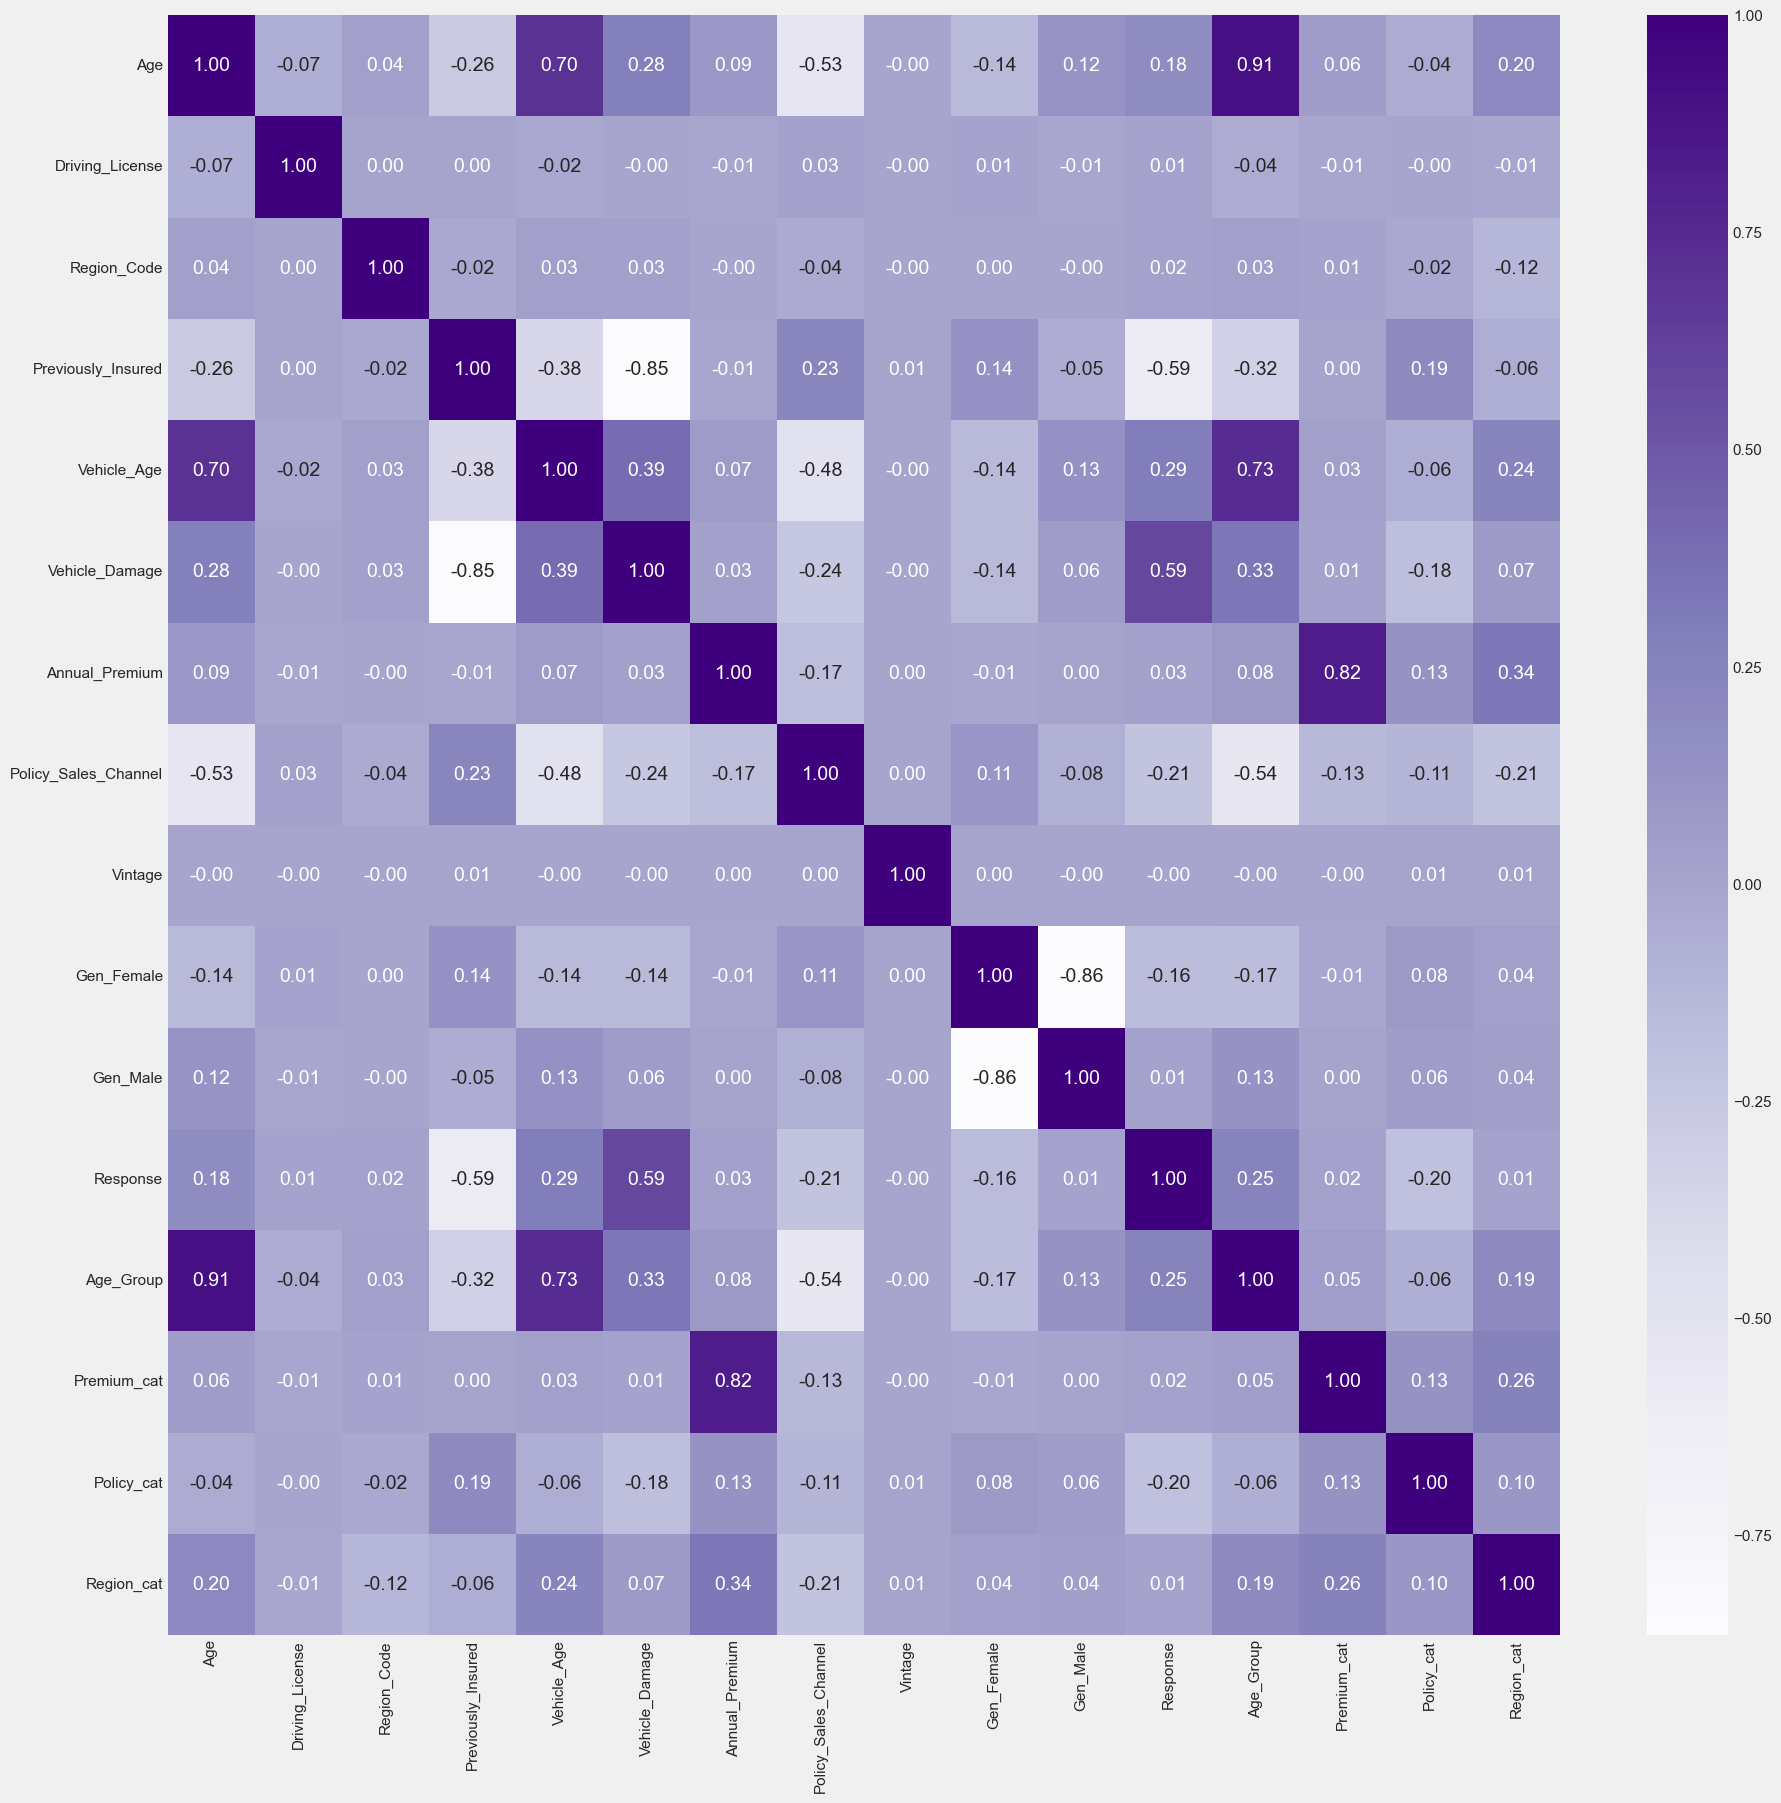

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='Purples', annot=True, fmt='.2f')

Dari hasil *feature extraction* didapatkan insight bahwa `Policy_cat` tidak memiliki korelasi dengan `Response`, sedangkan `Age_Group` dan `Premium_cat` memiliki korelasi *positive*.

## 4 New Features

1. `Premium_Per_Channel`, untuk menghitung dan memberi insight baru mengenai total premium dari berbagai `Policy_Sales_Channel` dengan begitu pengelompokkan Channel dapat dilakukan berdasarkan `Annual_Premium`.

2. `Vintage_Group`, feature baru yang mengubah feature `Vintage` menjadi kategori dengan range tertentu dimana diartikan menjadi New (baru bergabung), Intermediate (sudah bergabung cukup lama), Long-term (sudah bergabung lama).

3. `Not_Insured_and_Damaged`, kolom yang berisikan nilai 1 jika kolom `Previously_Insured` memiliki value 0 dan `Vehicle_Damage` memiliki value 1.

4. `Channel_Response_Rate`, merupakan rate respon dari tiap channel dimana menindikasikan seberapa efektif suatu channel untuk mendapatkan jawaban 'Yes' dari sini juga dapat dilakukan pengelompokkan Channels yang memiliki rate tinggi.

## Feature Transformation

Data memiliki karakteristik mayoritas sudah berbentuk Gaussian namun ada beberapa yang masih belum tersebar normal.

In [ ]:
# Mengkelompokkan kolom-kolom yang akan menjadi features serta target
x = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
x = df.select_dtypes(include=x)
x.drop(columns=['Response'],inplace=True)
y = df['Response']

In [ ]:
# Melakukan split test and train
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=1/3, random_state=42)

# Menggabungkan kembali features dan target untuk membuat dataframe test dan train

df_train = Xtrain.join(ytrain)
df_test  = Xtest.join(ytest)

Dari seluruh kolom yang bukan merupakan kolom kategori adalah `Age`, `Annual_Premium` dan `Vintage` sehingga hanya ketiga kolom ini yang dilakukan transformasi.

In [ ]:
f_log = ['Age']
for i in f_log:
    df_train['log_'+i] = np.log(df_train[i] + (df_train[df_train[i] > 0][i].min() / 2))
    df_test['log_'+i] = np.log(df_test[i] + (df_test[df_test[i] > 0][i].min() / 2))

In [ ]:
sscale = ['Annual_Premium','Vintage']
scaler = StandardScaler()
for i in sscale:
    scaler.fit(df_train[[i]])
    scaler.fit(df_test[[i]])
    df_train['std_'+i] = scaler.transform(df_train[[i]])
    df_test['std_'+i] = scaler.transform(df_test[[i]])

In [ ]:
sscale = ['Annual_Premium','Vintage']
for i in sscale:
    df_train['box_'+i],_ = boxcox(df_train[i]+1)
    df_test['box_'+i],_ = boxcox(df_test[i]+1)

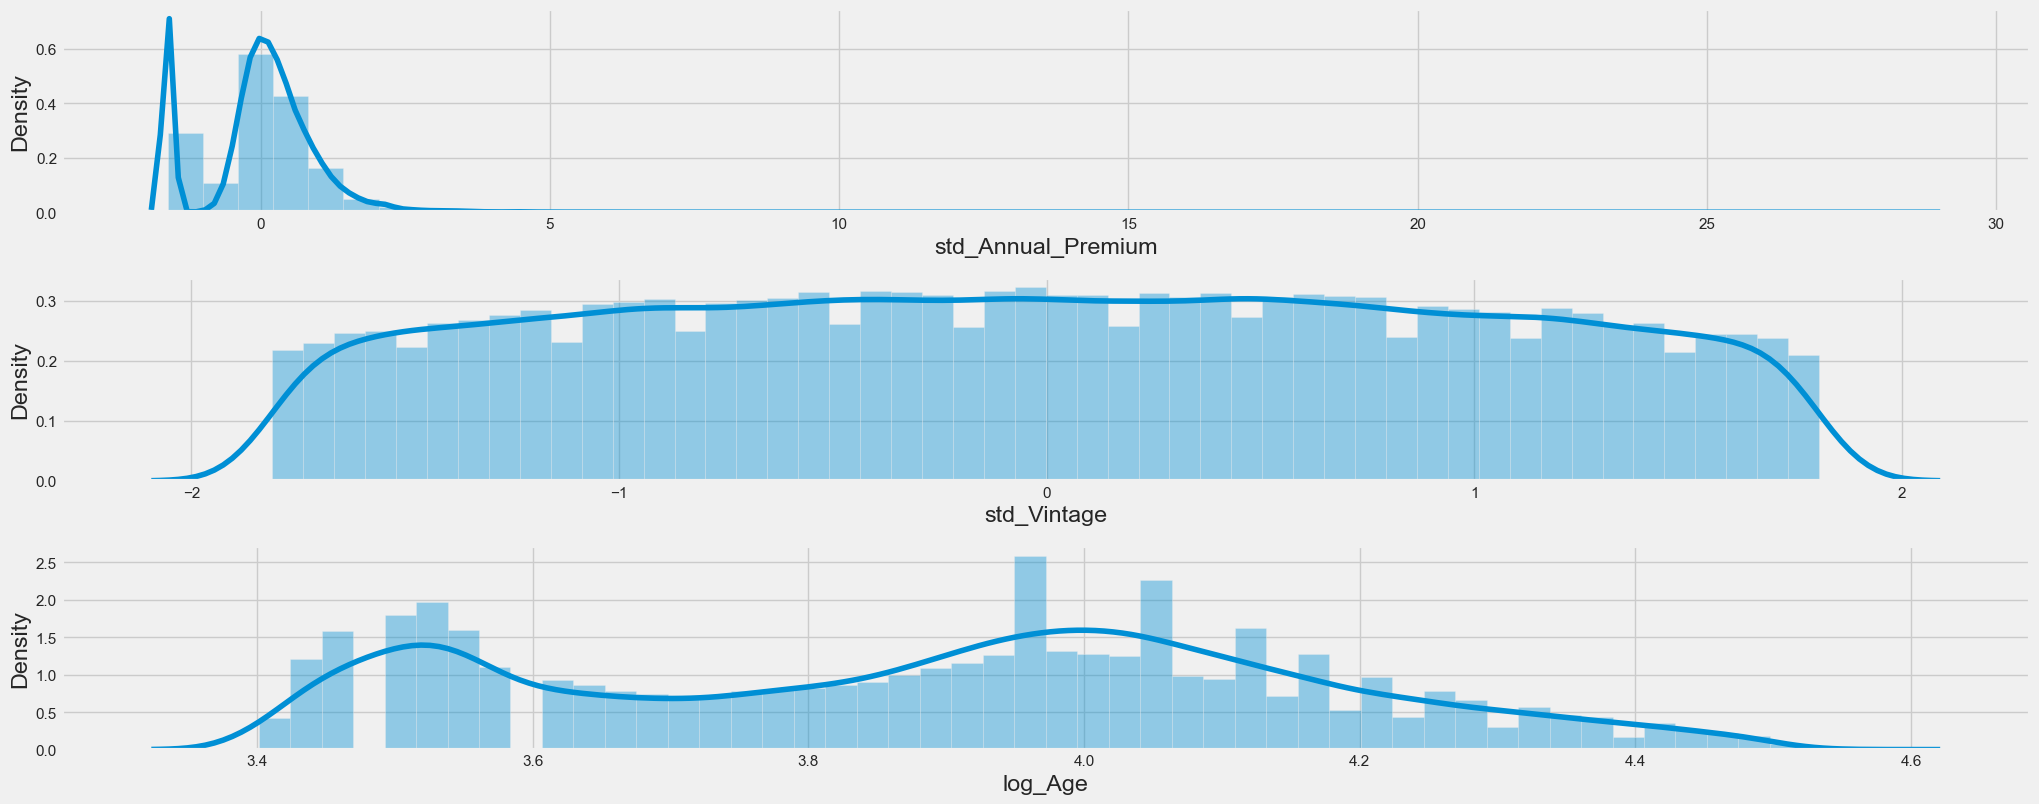

In [ ]:
nums_std = ['std_Annual_Premium', 'std_Vintage', 'log_Age']

k = int((len(nums_std)+1)/3)

for i in range(0, len(nums_std)):
    plt.subplot(3, k, i+1)
    sns.distplot(df_train[nums_std[i]], kde=True)
    plt.tight_layout()

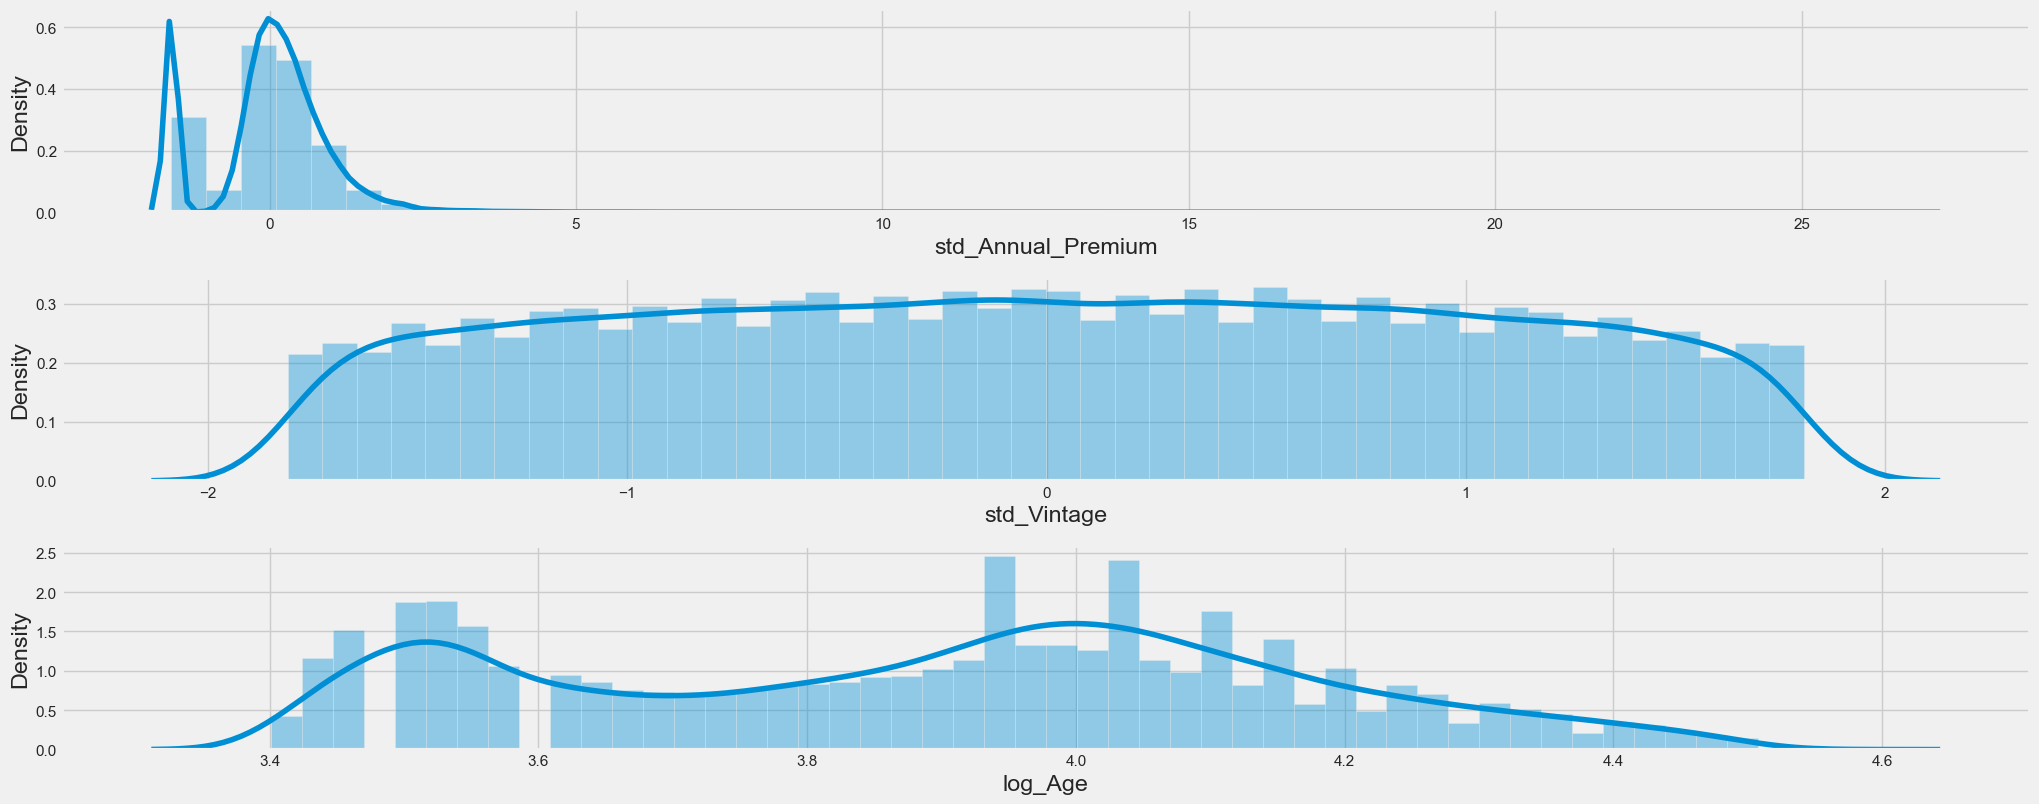

In [ ]:
nums_std = ['std_Annual_Premium', 'std_Vintage', 'log_Age']

k = int((len(nums_std)+1)/3)

for i in range(0, len(nums_std)):
    plt.subplot(3, k, i+1)
    sns.distplot(df_test[nums_std[i]], kde=True)
    plt.tight_layout()

<Axes: >

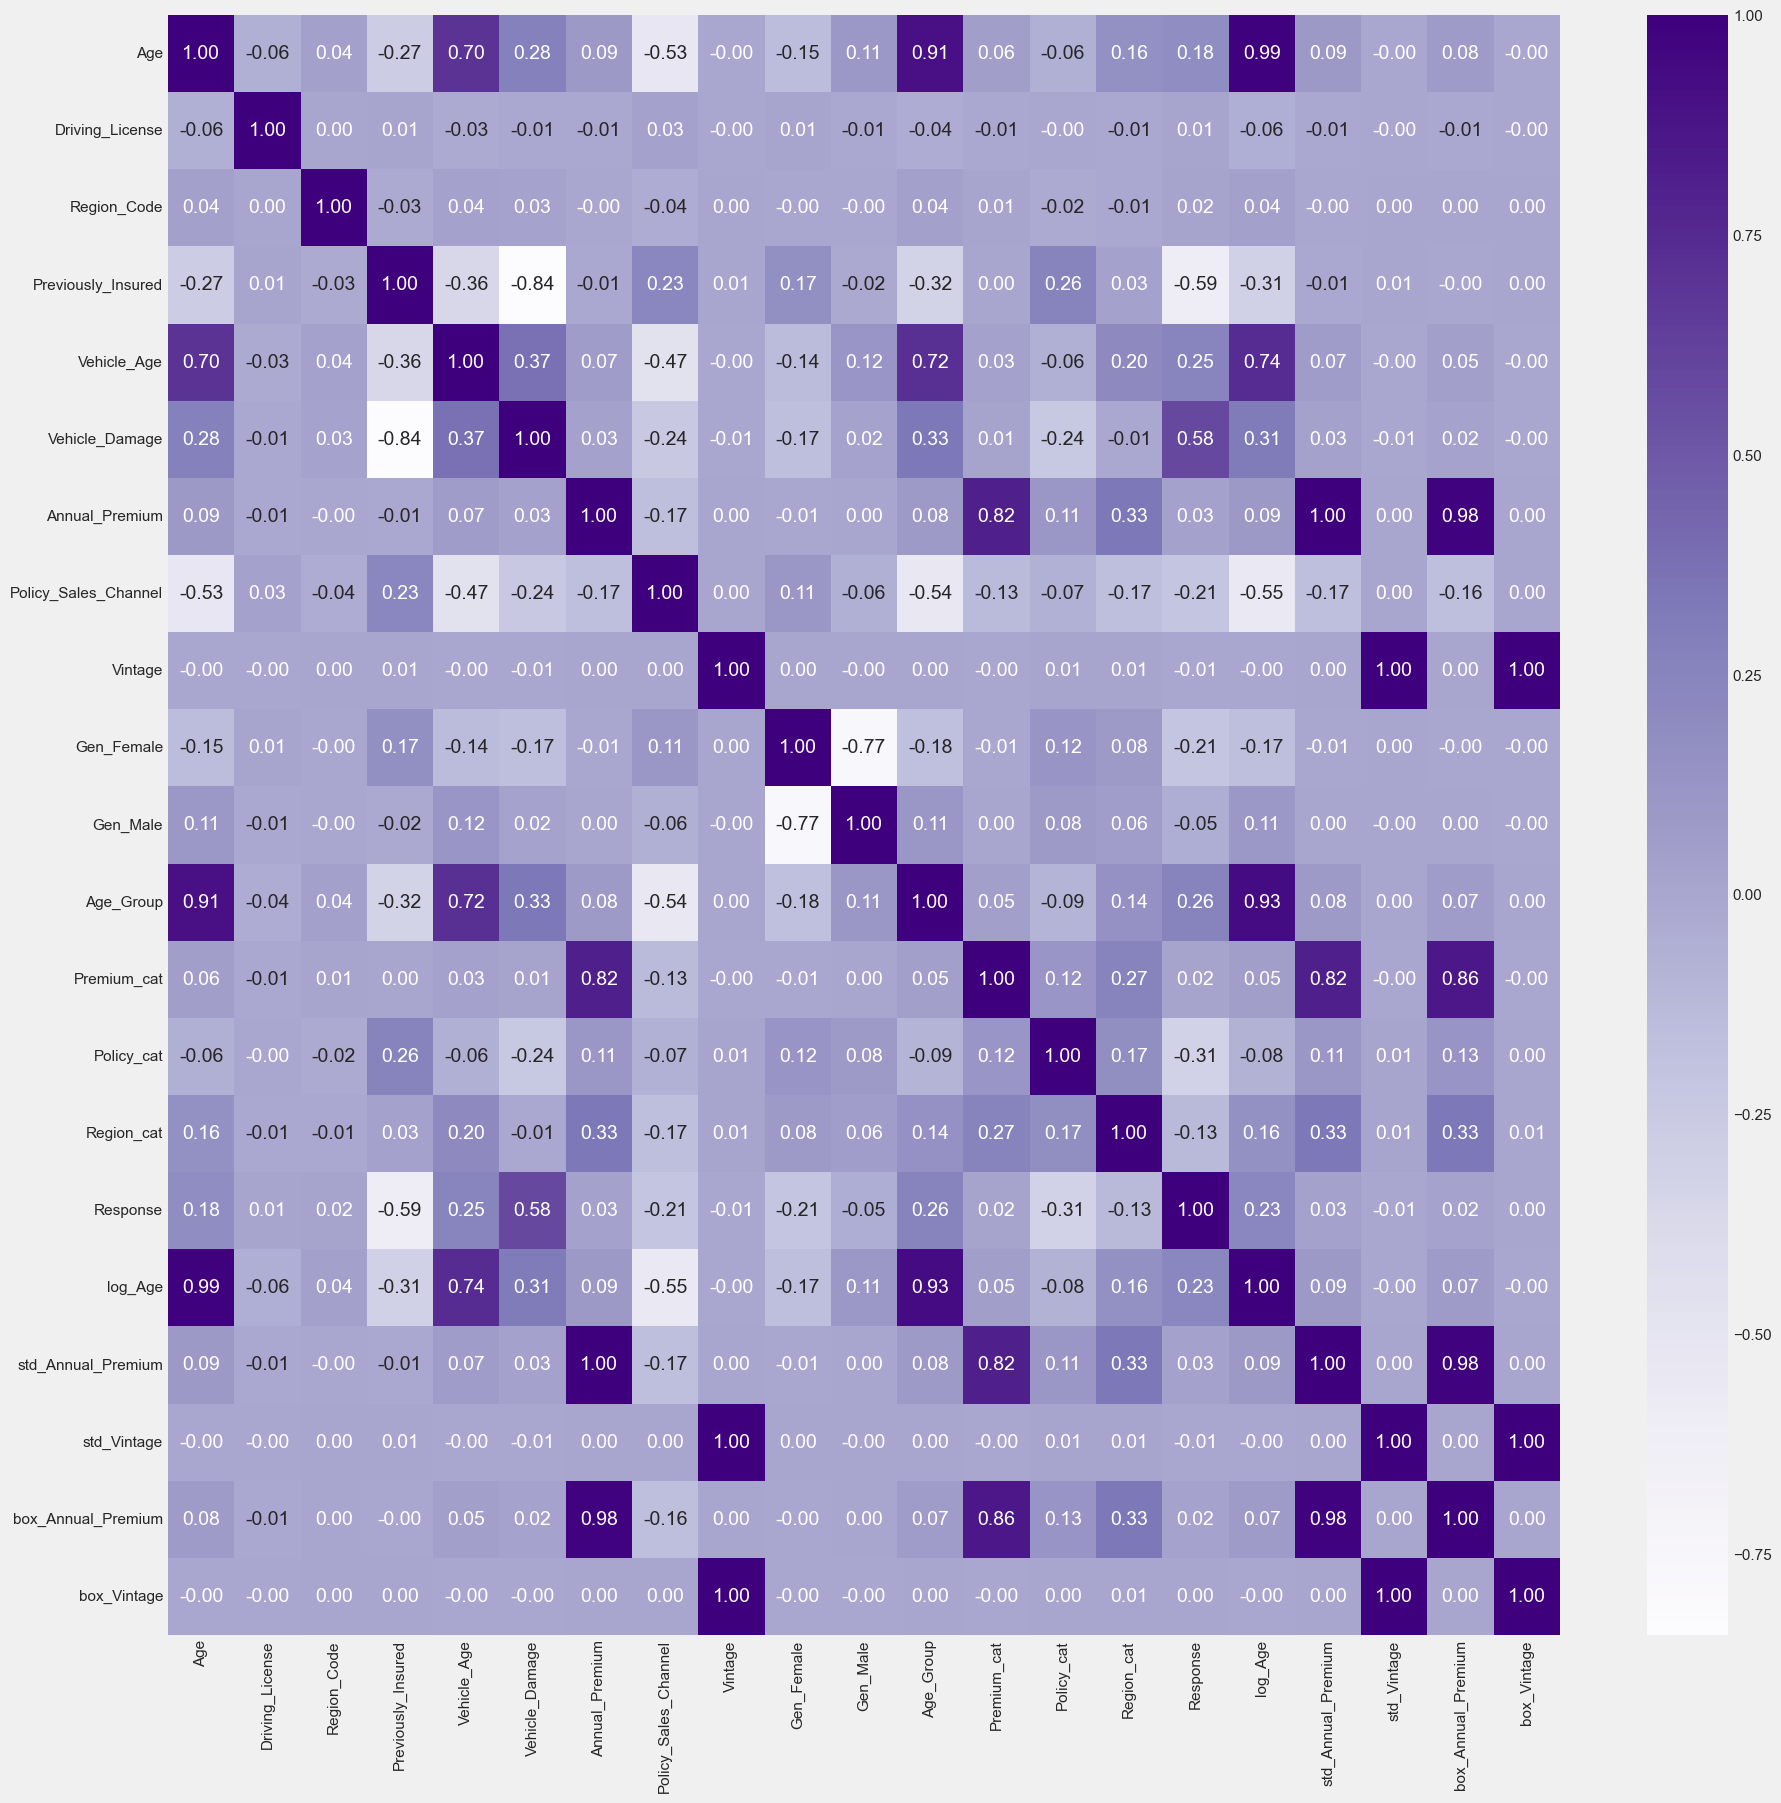

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_train.corr(), cmap='Purples', annot=True, fmt='.2f')

Diputuskan menggunakan `StandardScaler`.

Features yang dipilih `Vehicle_Age`, `Vehicle_Damage`, `Previously_Insured`, `Gen_Female`, `Gen_Male`, `Age_Group`, `Region_cat`, `std_Annual_Premium`.

Sedangkan targetnya adalah `Response`.

# Modelling

In [ ]:
df = pd.concat([df_train, df_test])

In [ ]:
features = ['Vehicle_Age','Vehicle_Damage','Previously_Insured','Gen_Female','Gen_Male','Age_Group','Region_cat','std_Annual_Premium']
target = ['Response']

Setelah dilakukan modelling pada *features* `Vehicle_Age`,`Vehicle_Damage`,`Previously_Insured`,`Gen_Female`,`Gen_Male`,`Age_Group`,`Region_cat`,`std_Annual_Premium` menggunakan algoritma `Logistic Regression`, `K-Nearest Neighbor`, `Decision Tree`, `XGBoost`, `Random Forest`, `LightGBM`, `Gradient Boost` didapatkan hasil bahwa model-model *overfitting*,

|Model|Accuracy Test|Accuracy Train|Precision Test|Precision Train|Recall Test|Recall Train|F1 Test|F1 Train|ROC AUC Test|ROC AUC Train|ROC AUC CrossVal Test|ROC AUC CrossVal Train|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Logistic|0.79|0.78|0.71|0.71|0.98|0.98|0.82|0.82|0.82|0.82|0.99|0.80|
|KNN|0.76|0.81|0.72|0.77|0.82|0.88|0.77|0.82|0.81|0.89|0.99|0.80|
|Decision Tree|0.72|0.95|0.71|0.93|0.75|0.97|0.73|0.95|0.73|0.99|0.99|0.80|
|XGBoost|0.79|0.80|0.72|0.73|0.93|0.94|0.81|0.82|0.83|0.87|0.99|0.80|
|Random Forest|0.73|0.95|0.71|0.92|0.76|0.98|0.73|0.95|0.81|0.99|0.99|0.80|
|LightGBM|0.79|0.79|0.72|0.73|0.93|0.94|0.81|0.82|0.84|0.85|0.99|0.80|
|Gradient Boost|0.79|0.79|0.72|0.72|0.93|0.94|0.82|0.82|0.84|0.84|0.99|0.80|


Sehingga diputuskan untuk melakukan regularization dan hyperparameter tuning lain namun model masih overfitting maka dipertimbangkan untuk melakukan features selection ulang dan penambahan data.

In [ ]:
# New Feature Selection
features_new = ['Vehicle_Age','Vehicle_Damage','Previously_Insured','Age_Group','Region_cat','Policy_Sales_Channel','Gen_Female','Gen_Male']
target_new = ['Response']

X = df[features_new].copy()
y = df[target_new].copy()
X_train = df_train[features_new].copy()
y_train = df_train[target_new].copy()
X_test = df_test[features_new].copy()
y_test = df_test[target_new].copy()

In [ ]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

lg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)
grd = GradientBoostingClassifier(random_state=42)

### 1. Logistic Regression

In [ ]:
lgmodel = lg.fit(X_train, y_train)
eval_classification(lgmodel)

Accuracy (Test Set): 0.79
Accuracy (Train Set): 0.79
Precision (Test Set): 0.72
Precision (Train Set): 0.72
Recall (Test Set): 0.93
Recall (Train Set): 0.94
F1-Score (Test Set): 0.82
F1-Score (Train Set): 0.82
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.87
roc_auc (crossval train): 0.9250789263355971
roc_auc (crossval test): 0.9157560080255982


In [ ]:
y_pred_lg_prob = lgmodel.predict_proba(X_test)[:,1]
y_pred_lg = lgmodel.predict(X_test)

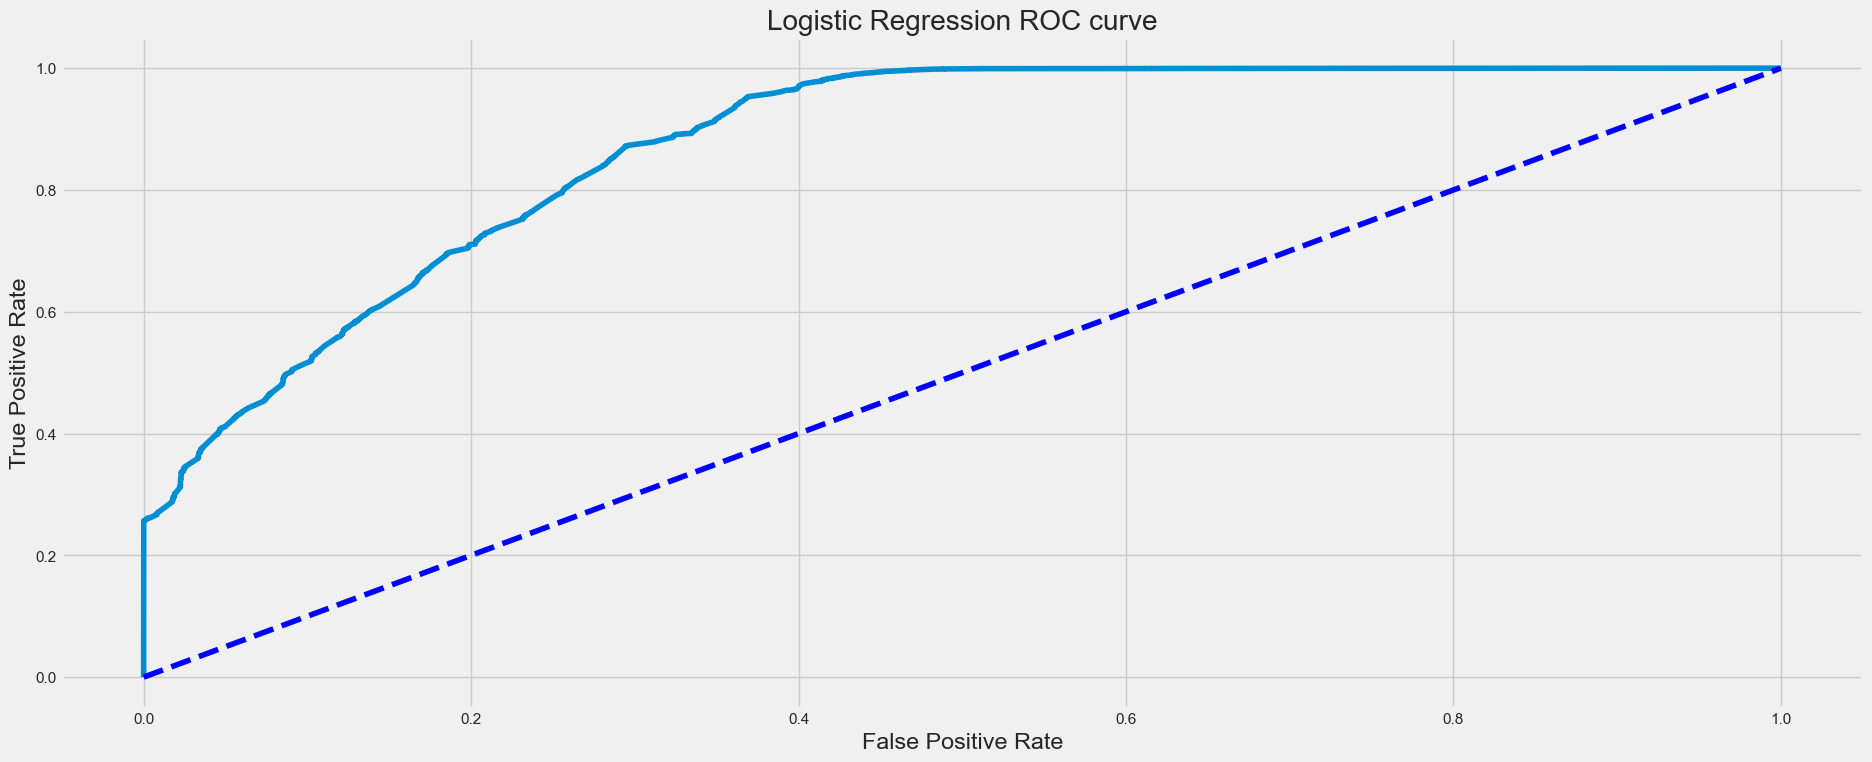

In [ ]:
falposr, truposr, _ = roc_curve(y_test, y_pred_lg_prob)
plt.title('Logistic Regression ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[21273 11975]
 [ 2222 31410]]



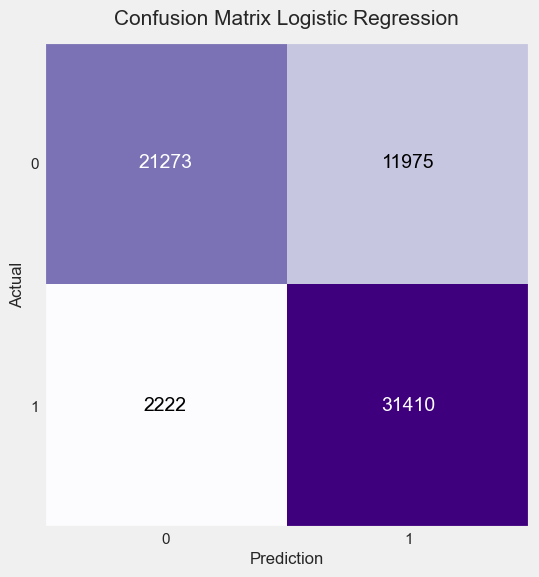

In [ ]:
cmlg = confusion_matrix(y_test, y_pred_lg)
print(cmlg)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmlg, figsize=(6, 6), cmap=plt.cm.Purples)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Logistic Regression', fontsize=15, pad=12)
plt.show()

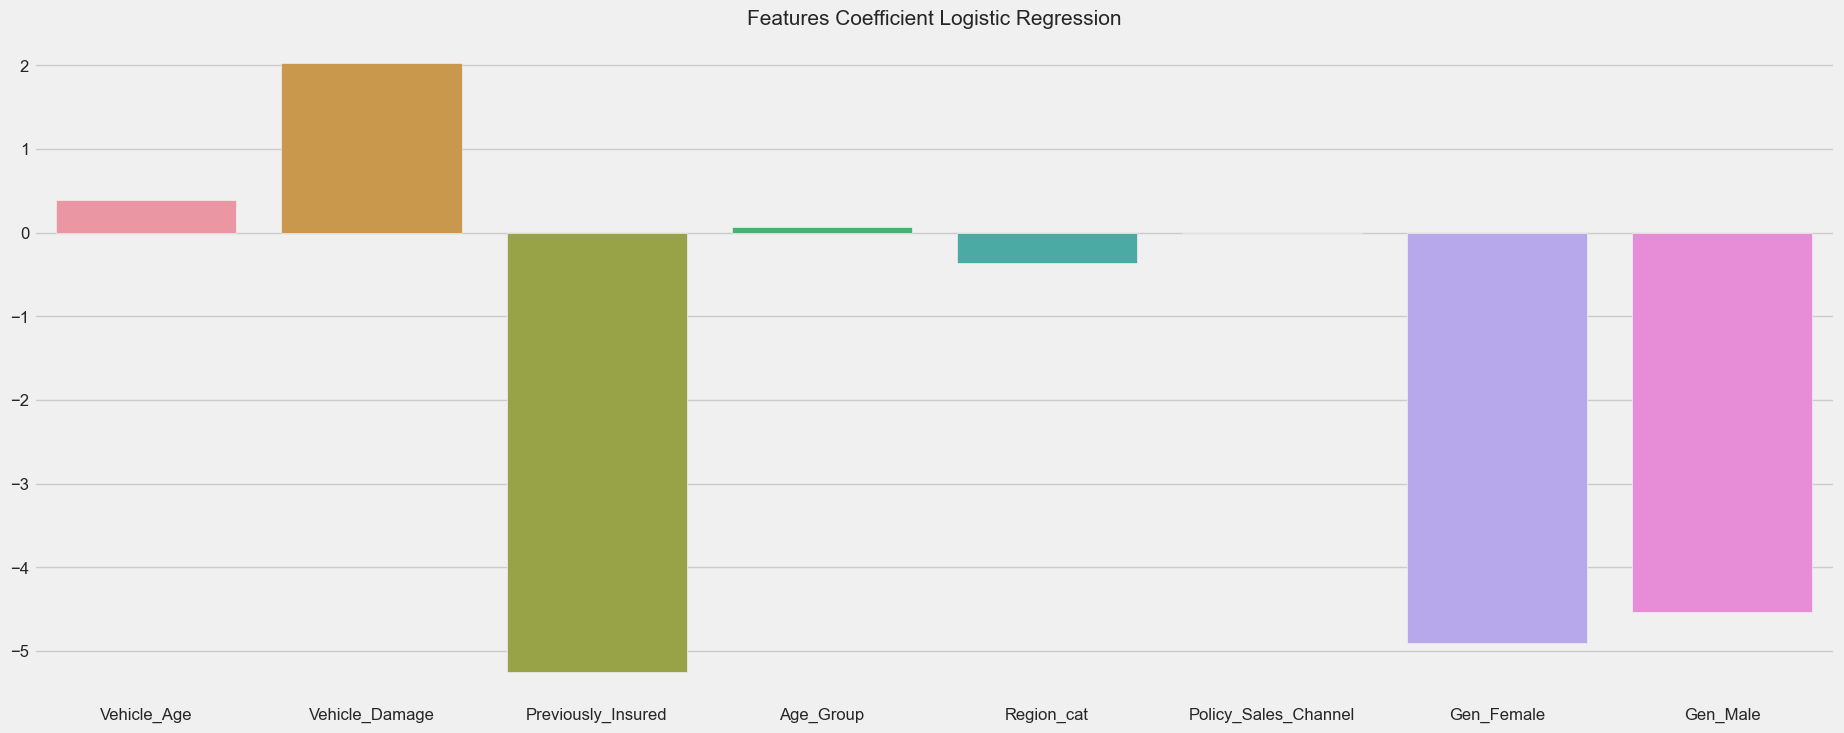

In [ ]:
fi = pd.Series(lgmodel.coef_[0], index=df[features_new].columns)
sns.barplot(x=fi.index, y=fi.values)
plt.title('Features Coefficient Logistic Regression', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 2. K-Nearest Neighbor

In [ ]:
knnmodel = knn.fit(X_train, y_train)
eval_classification(knnmodel)

Accuracy (Test Set): 0.79
Accuracy (Train Set): 0.80
Precision (Test Set): 0.78
Precision (Train Set): 0.78
Recall (Test Set): 0.83
Recall (Train Set): 0.83
F1-Score (Test Set): 0.80
F1-Score (Train Set): 0.80
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.925079255076508
roc_auc (crossval test): 0.9157789661955439


In [ ]:
y_pred_knn_prob = knnmodel.predict_proba(X_test)[:,1]
y_pred_knn = knnmodel.predict(X_test)

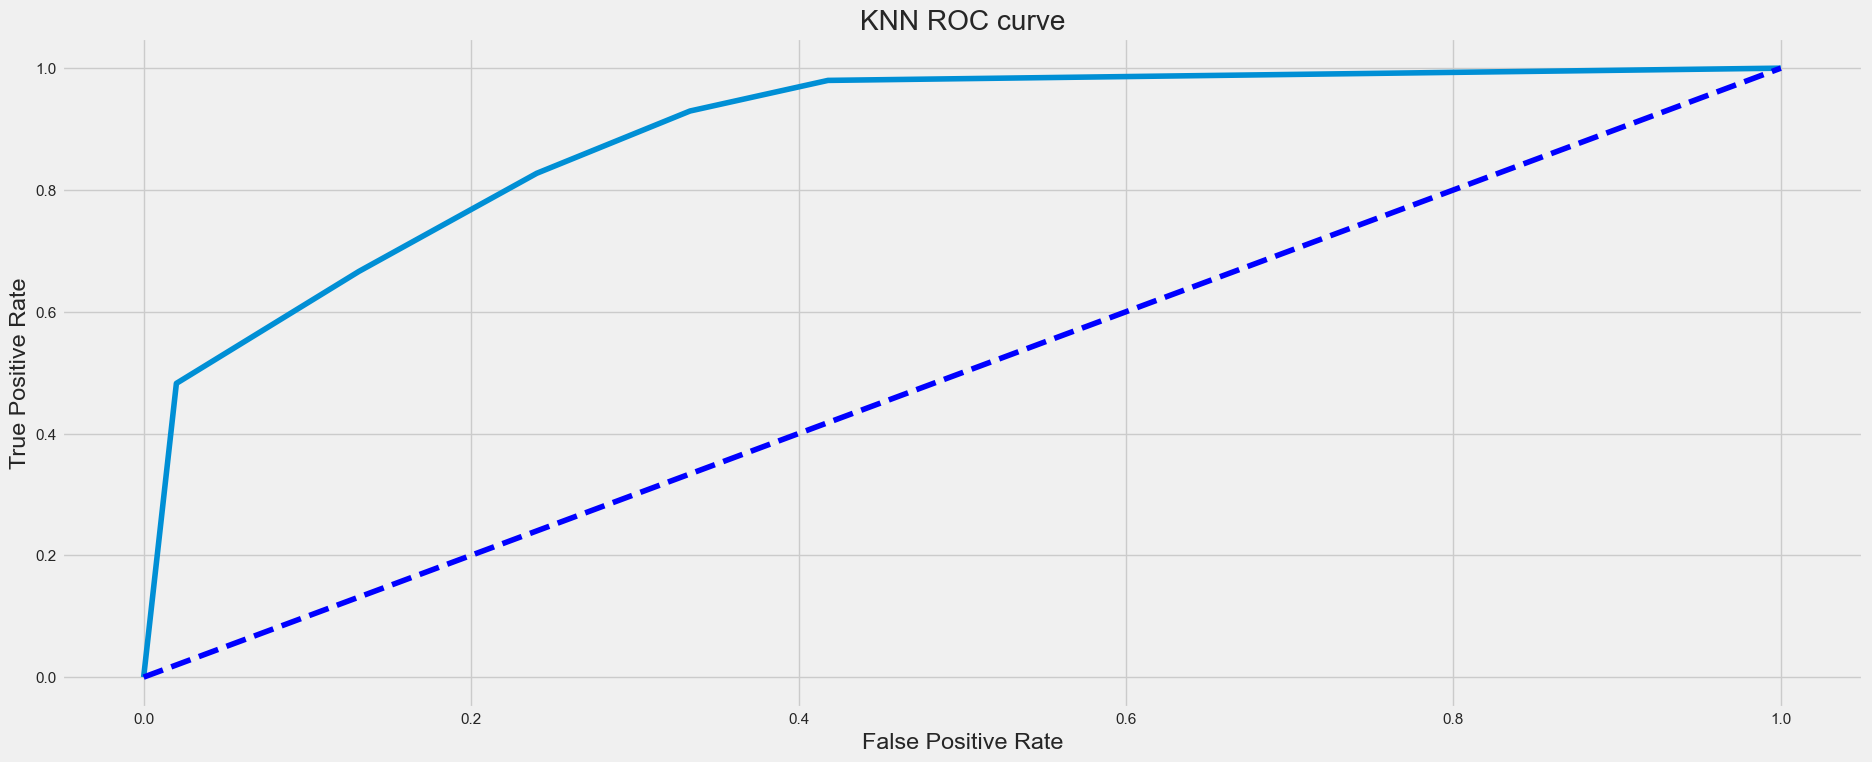

In [ ]:
falposr, truposr, _ = roc_curve(y_test, y_pred_knn_prob)
plt.title('KNN ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[25265  7983]
 [ 5806 27826]]



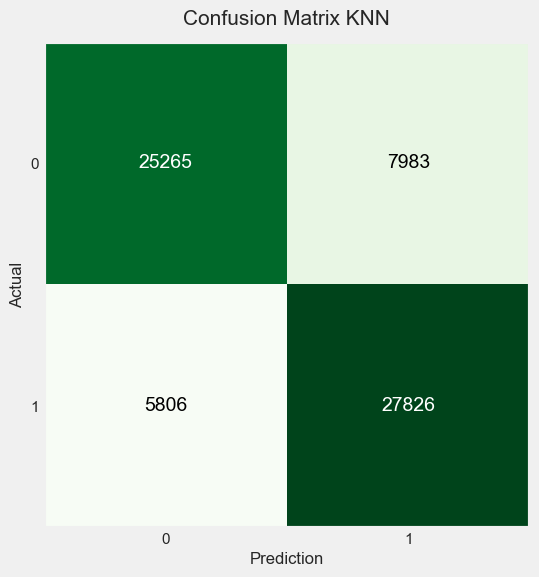

In [ ]:
cmknn = confusion_matrix(y_test, y_pred_knn)
print(cmknn)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmknn, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix KNN', fontsize=15, pad=12)
plt.show()

KNN Classifier tidak memiliki *features importance*.

### 3. Decision Tree

In [ ]:
dtmodel = dt.fit(X_train, y_train)
eval_classification(dtmodel)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.83
Precision (Test Set): 0.78
Precision (Train Set): 0.79
Recall (Test Set): 0.89
Recall (Train Set): 0.90
F1-Score (Test Set): 0.83
F1-Score (Train Set): 0.84
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.925083761731055
roc_auc (crossval test): 0.9158048788007352


In [ ]:
y_pred_dt_prob = dtmodel.predict_proba(X_test)[:,1]
y_pred_dt = dtmodel.predict(X_test)

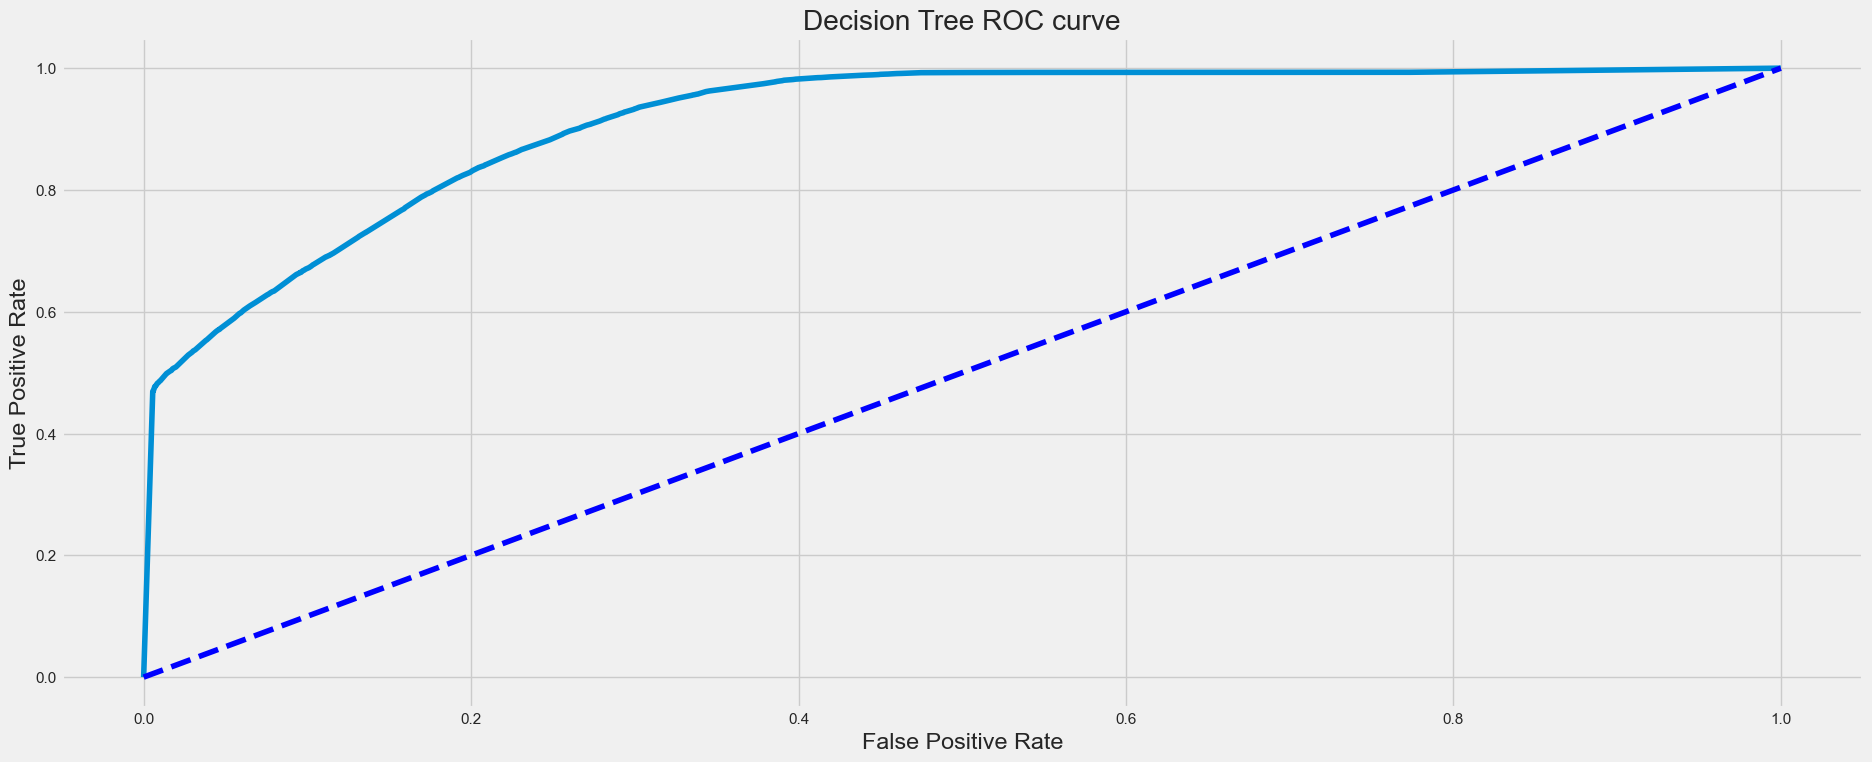

In [ ]:
falposr, truposr, _ = roc_curve(y_test, y_pred_dt_prob)
plt.title('Decision Tree ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[24728  8520]
 [ 3615 30017]]



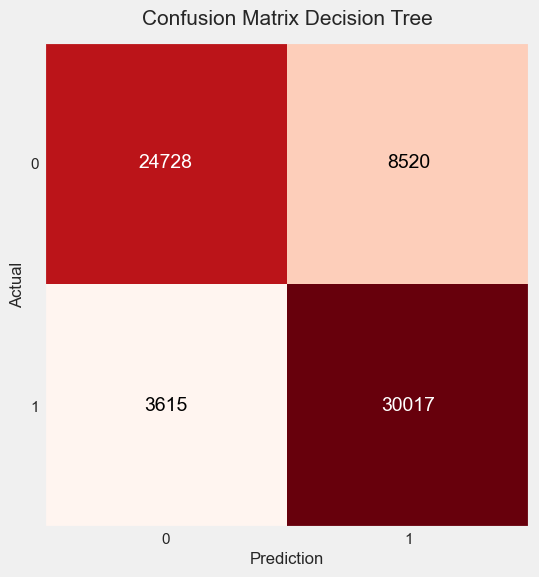

In [ ]:
cmdt = confusion_matrix(y_test, y_pred_dt)
print(cmdt)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmdt, figsize=(6, 6), cmap=plt.cm.Reds)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Decision Tree', fontsize=15, pad=12)
plt.show()

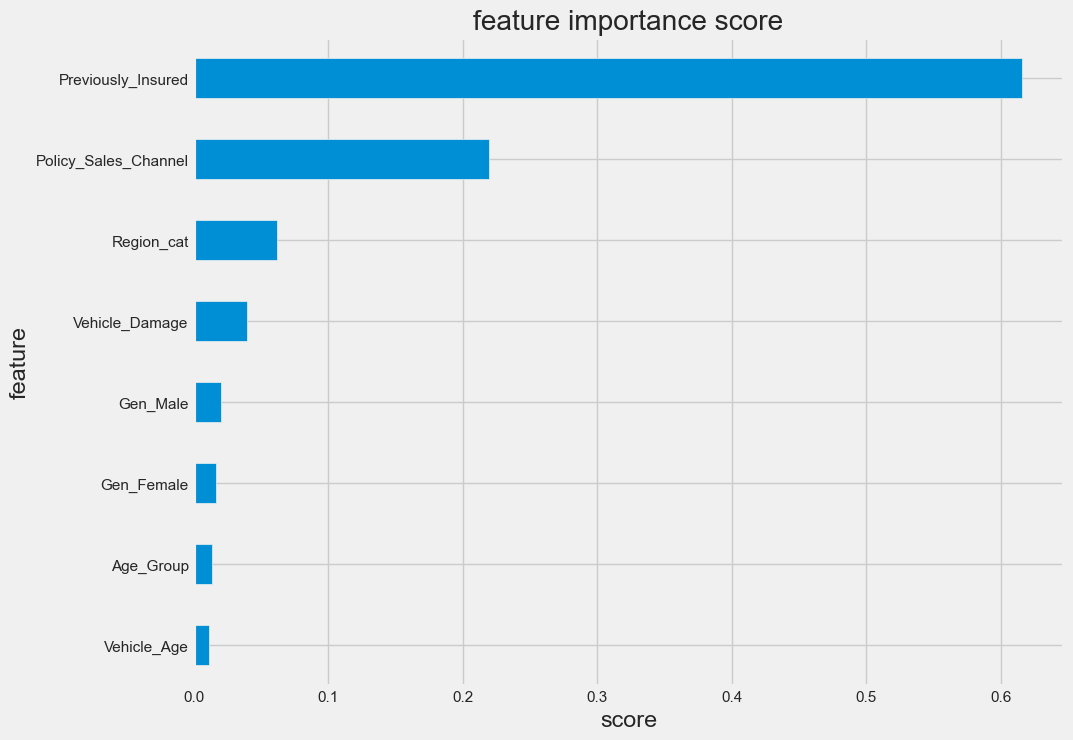

In [ ]:
show_feature_importance(dtmodel)

### 4. XGBoost

In [ ]:
xgmodel = xgb.fit(X_train, y_train)
eval_classification(xgmodel)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.83
Precision (Test Set): 0.78
Precision (Train Set): 0.78
Recall (Test Set): 0.91
Recall (Train Set): 0.91
F1-Score (Test Set): 0.84
F1-Score (Train Set): 0.84
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.92
roc_auc (crossval train): 0.9250786602298973
roc_auc (crossval test): 0.9158249150379346


In [ ]:
y_pred_xg_prob = xgmodel.predict_proba(X_test)[:,1]
y_pred_xg = xgmodel.predict(X_test)

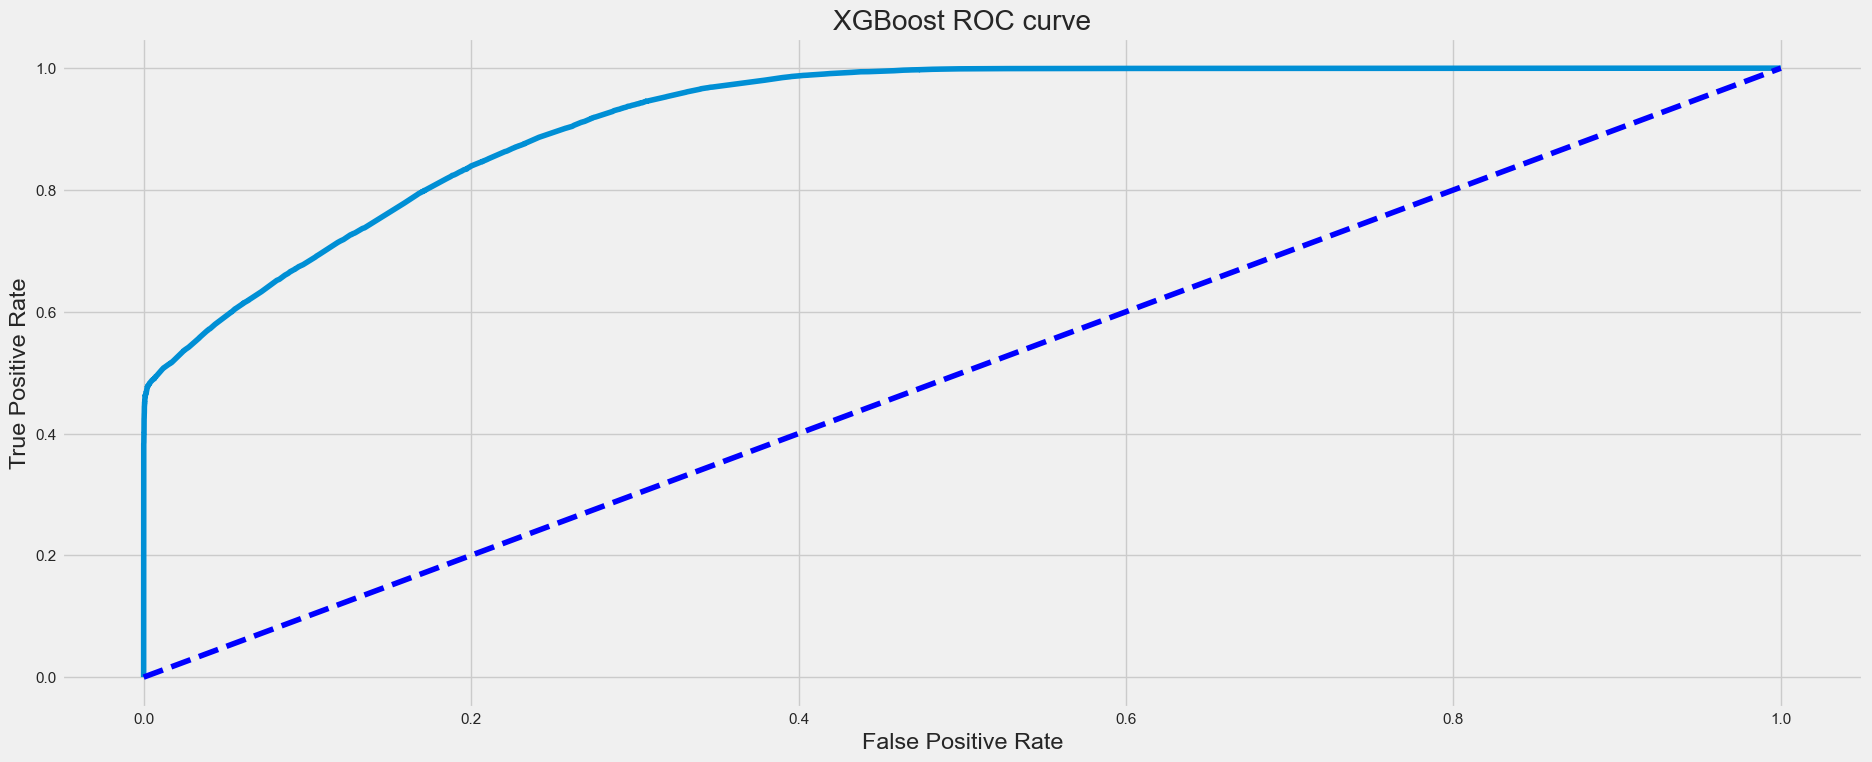

In [ ]:
falposr, truposr, _ = roc_curve(y_test, y_pred_xg_prob)
plt.title('XGBoost ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[24357  8891]
 [ 2986 30646]]



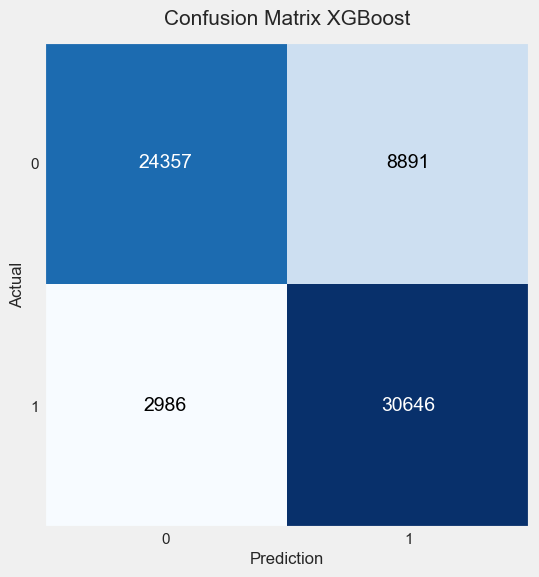

In [ ]:
cmxg = confusion_matrix(y_test, y_pred_xg)
print(cmxg)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmxg, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix XGBoost', fontsize=15, pad=12)
plt.show()

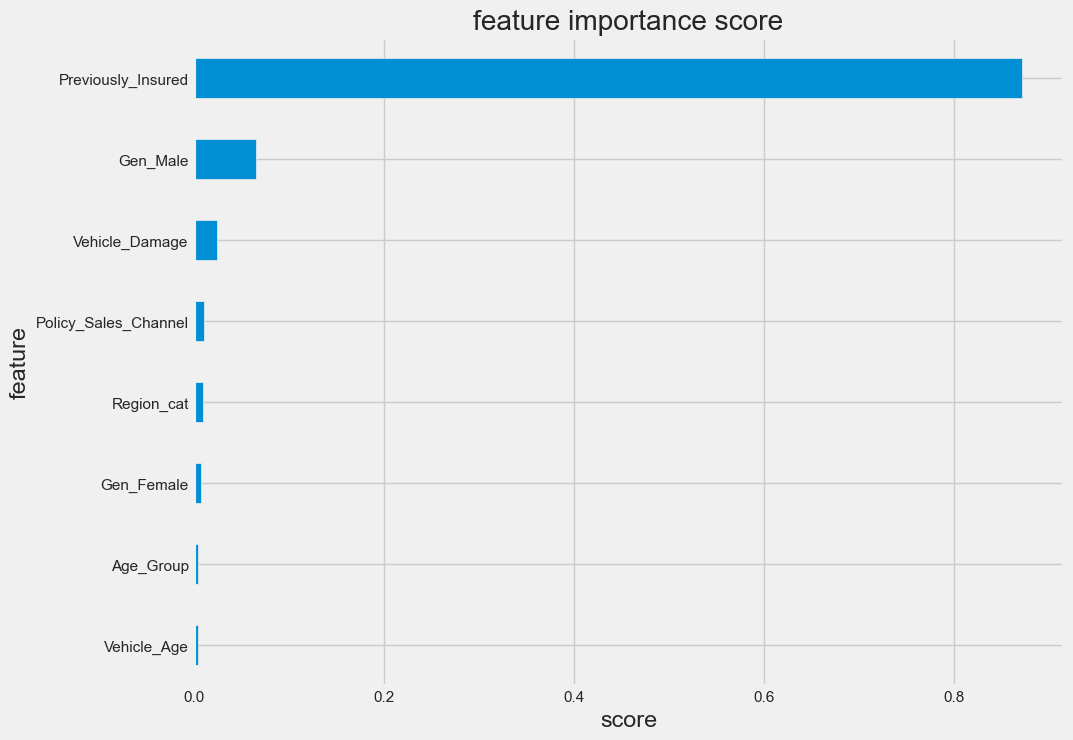

In [ ]:
show_feature_importance(xgmodel)

### 5. Random Forest

In [ ]:
rfmodel = rf.fit(X_train, y_train)
eval_classification(rfmodel)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.83
Precision (Test Set): 0.78
Precision (Train Set): 0.79
Recall (Test Set): 0.89
Recall (Train Set): 0.90
F1-Score (Test Set): 0.83
F1-Score (Train Set): 0.84
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.9250780541482652
roc_auc (crossval test): 0.9157550252356261


In [ ]:
y_pred_rf_prob = rfmodel.predict_proba(X_test)[:,1]
y_pred_rf = rfmodel.predict(X_test)

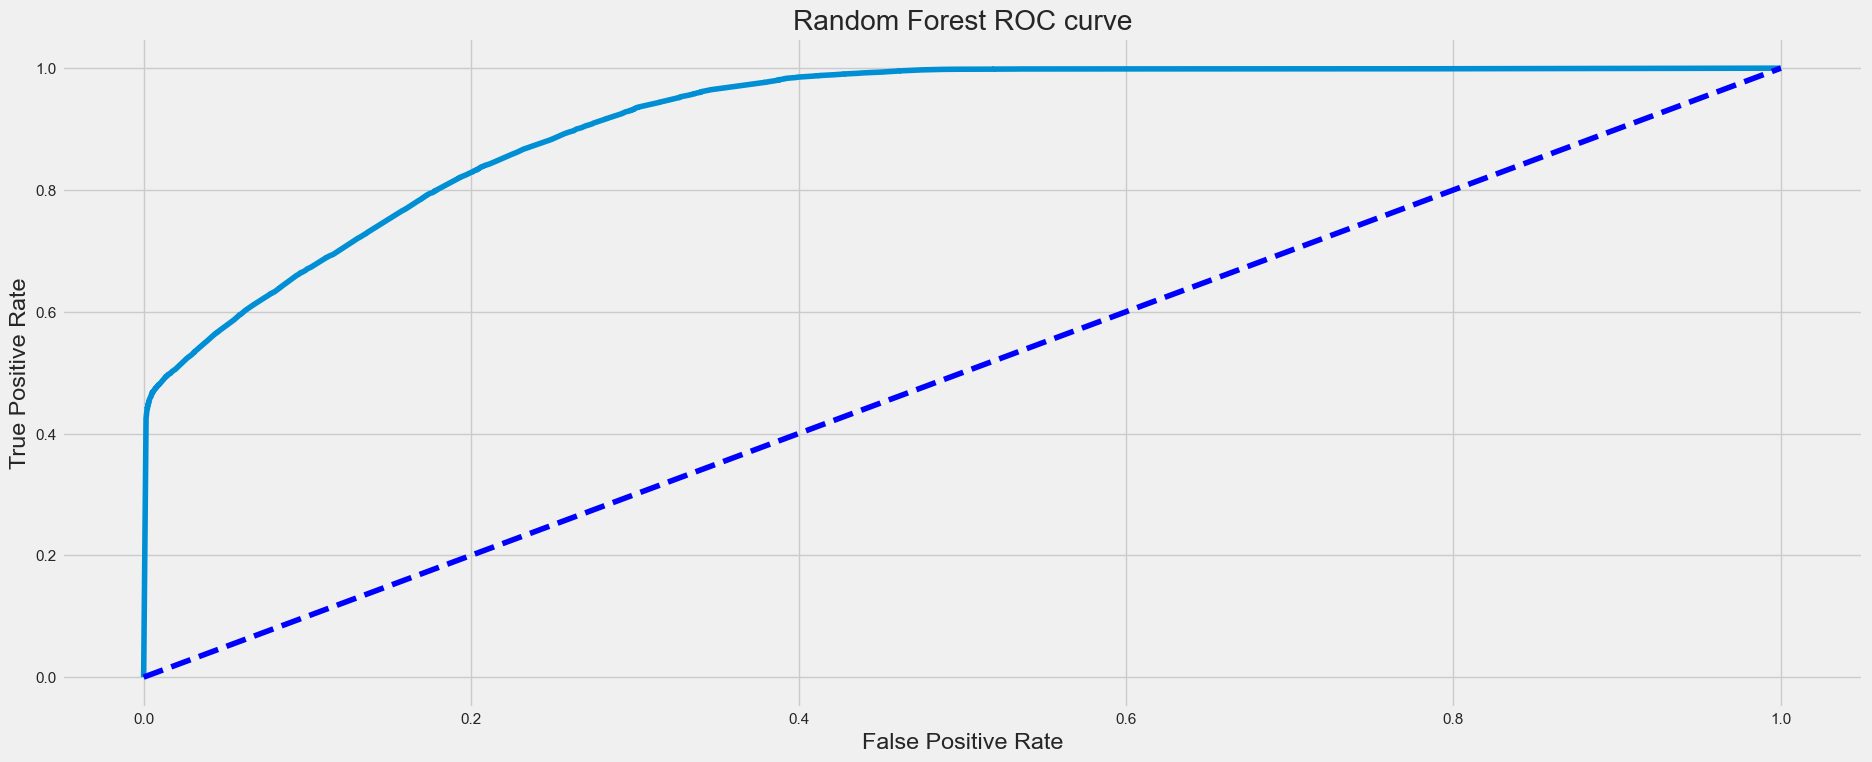

In [ ]:
falposr, truposr, _ = roc_curve(y_test, y_pred_rf_prob)
plt.title('Random Forest ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[24635  8613]
 [ 3555 30077]]



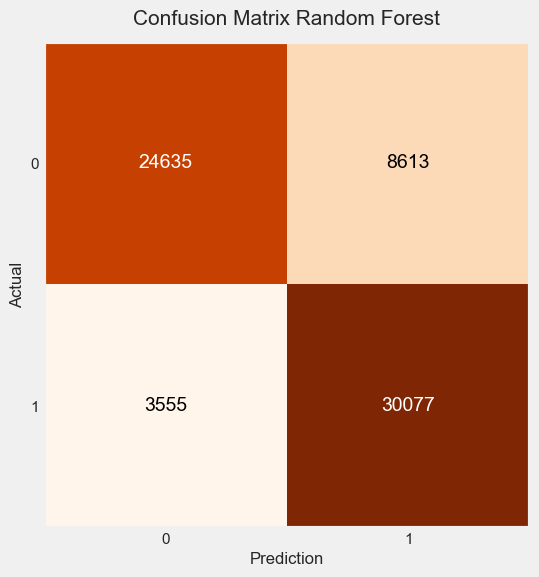

In [ ]:
cmrf = confusion_matrix(y_test, y_pred_rf)
print(cmrf)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmrf, figsize=(6, 6), cmap=plt.cm.Oranges)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Random Forest', fontsize=15, pad=12)
plt.show()

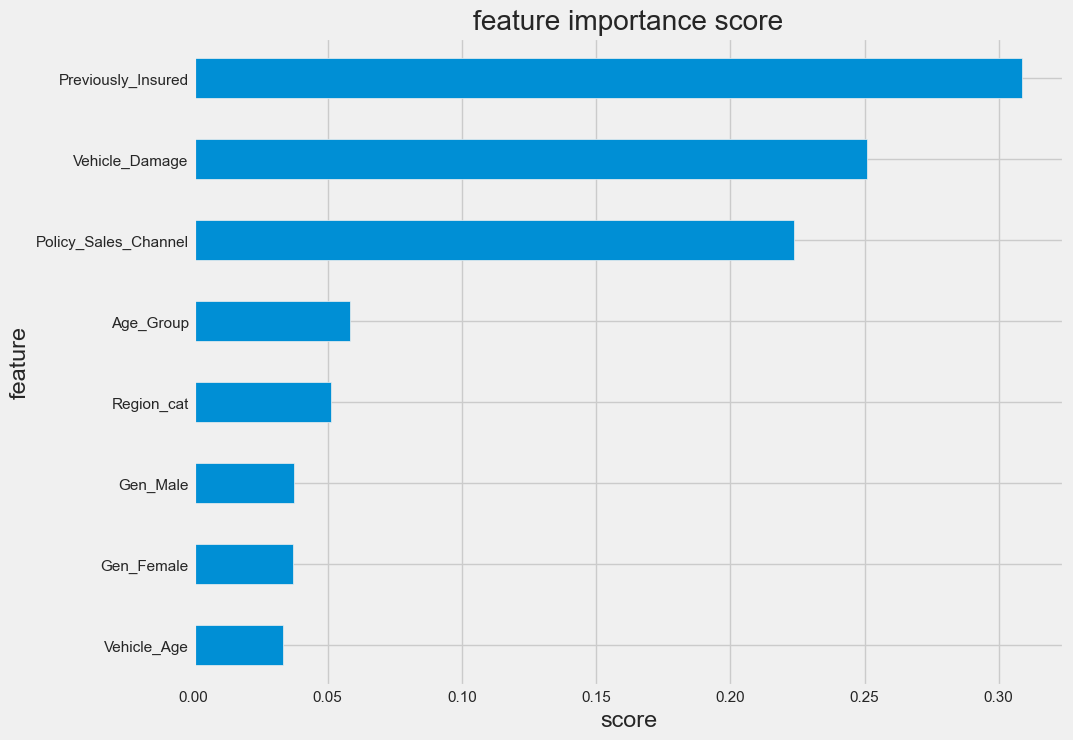

In [ ]:
show_feature_importance(rfmodel)

### 6. LightGBM

In [ ]:
lgbmodel = lgb.fit(X_train, y_train)
print('')
eval_classification(lgbmodel)

[LightGBM] [Info] Number of positive: 66687, number of negative: 67071
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 133758, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498565 -> initscore=-0.005742
[LightGBM] [Info] Start training from score -0.005742

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.82
Precision (Test Set): 0.77
Precision (Train Set): 0.77
Recall (Test Set): 0.91
Recall (Train Set): 0.91
F1-Score (Test Set): 0.84
F1-Score (Train Set): 0.84
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.92
roc_auc (crossval train): 0.9250819177830273
roc_auc (crossval test): 0.9158283379824589


In [ ]:
y_pred_lgb_prob = lgbmodel.predict_proba(X_test)[:,1]
y_pred_lgb = lgbmodel.predict(X_test)

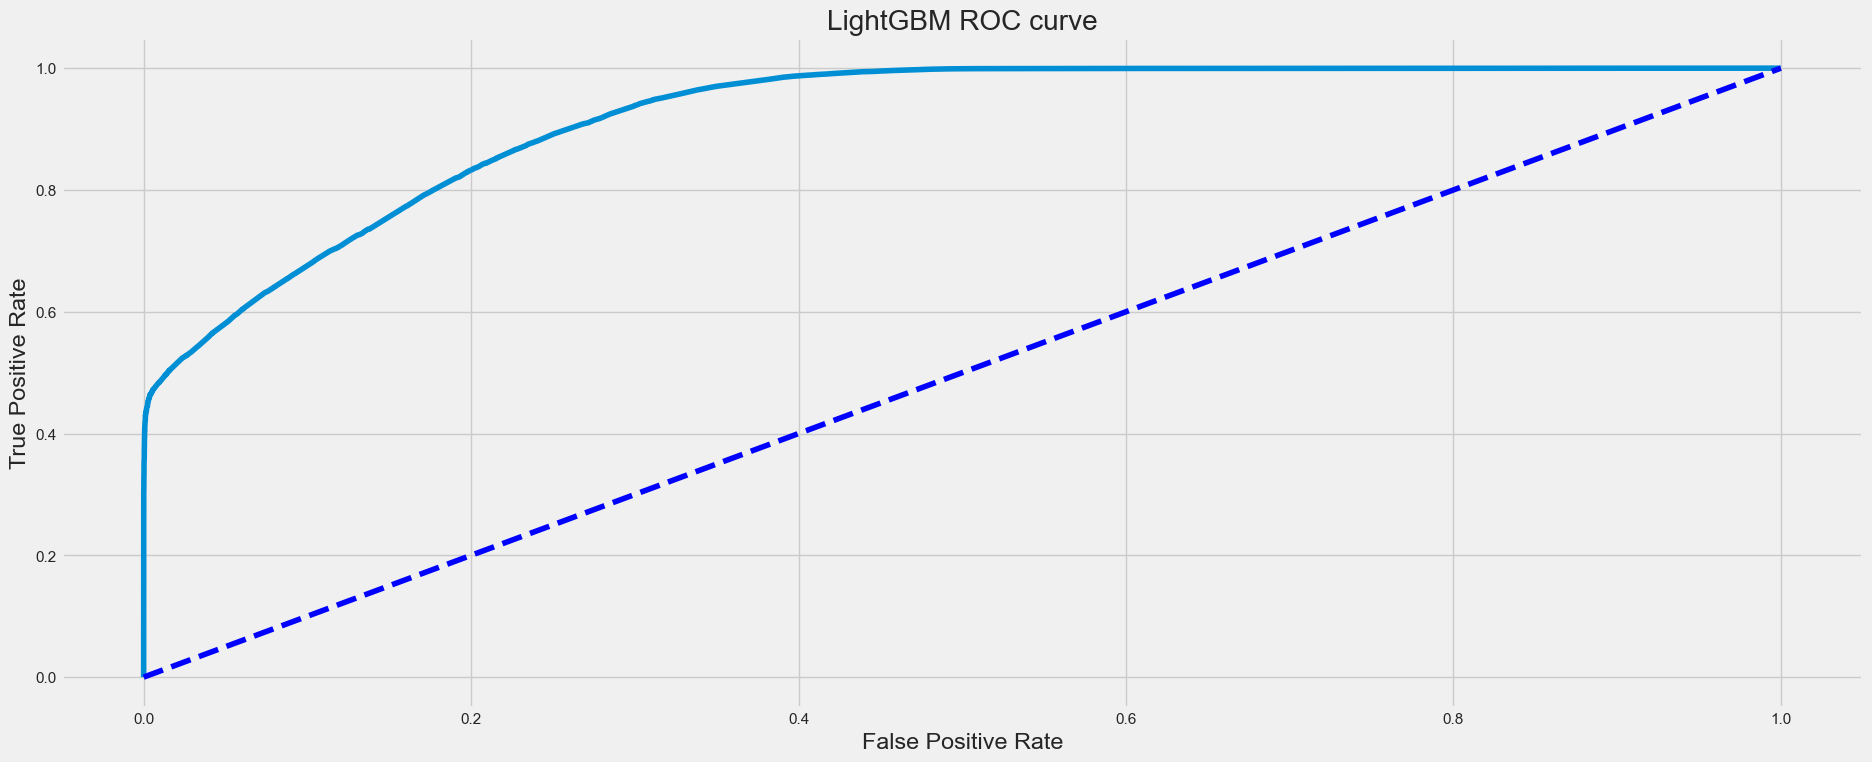

In [ ]:
falposr, truposr, _ = roc_curve(y_test, y_pred_lgb_prob)
plt.title('LightGBM ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[24221  9027]
 [ 3015 30617]]



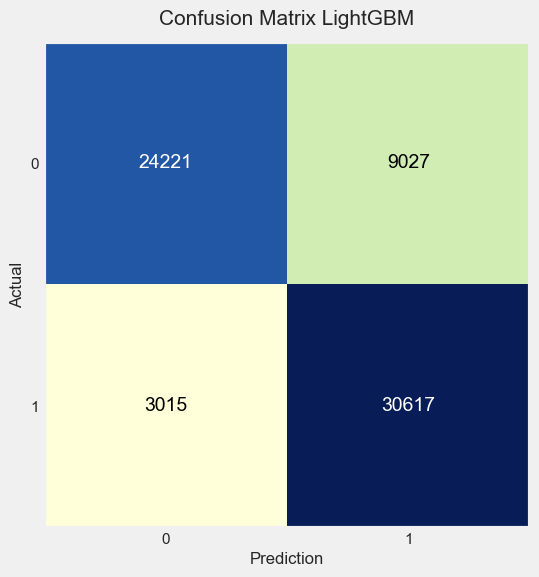

In [ ]:
cmlgb = confusion_matrix(y_test, y_pred_lgb)
print(cmlgb)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmlgb, figsize=(6, 6), cmap=plt.cm.YlGnBu)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix LightGBM', fontsize=15, pad=12)
plt.show()

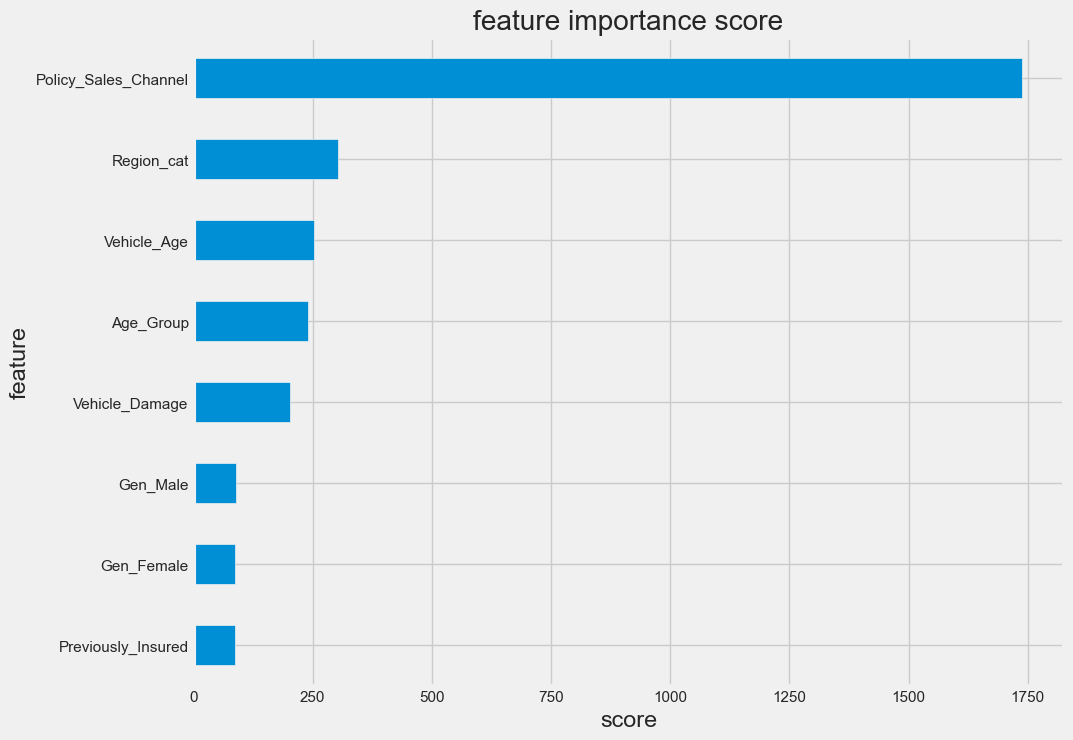

In [ ]:
show_feature_importance(lgbmodel)

### 7. Gradient Boost

In [ ]:
grdmodel = grd.fit(X_train, y_train)
eval_classification(grdmodel)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.82
Precision (Test Set): 0.76
Precision (Train Set): 0.76
Recall (Test Set): 0.93
Recall (Train Set): 0.92
F1-Score (Test Set): 0.84
F1-Score (Train Set): 0.84
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.9250739409598092
roc_auc (crossval test): 0.9157336694788446


In [ ]:
y_pred_grd_prob = grdmodel.predict_proba(X_test)[:,1]
y_pred_grd = grdmodel.predict(X_test)

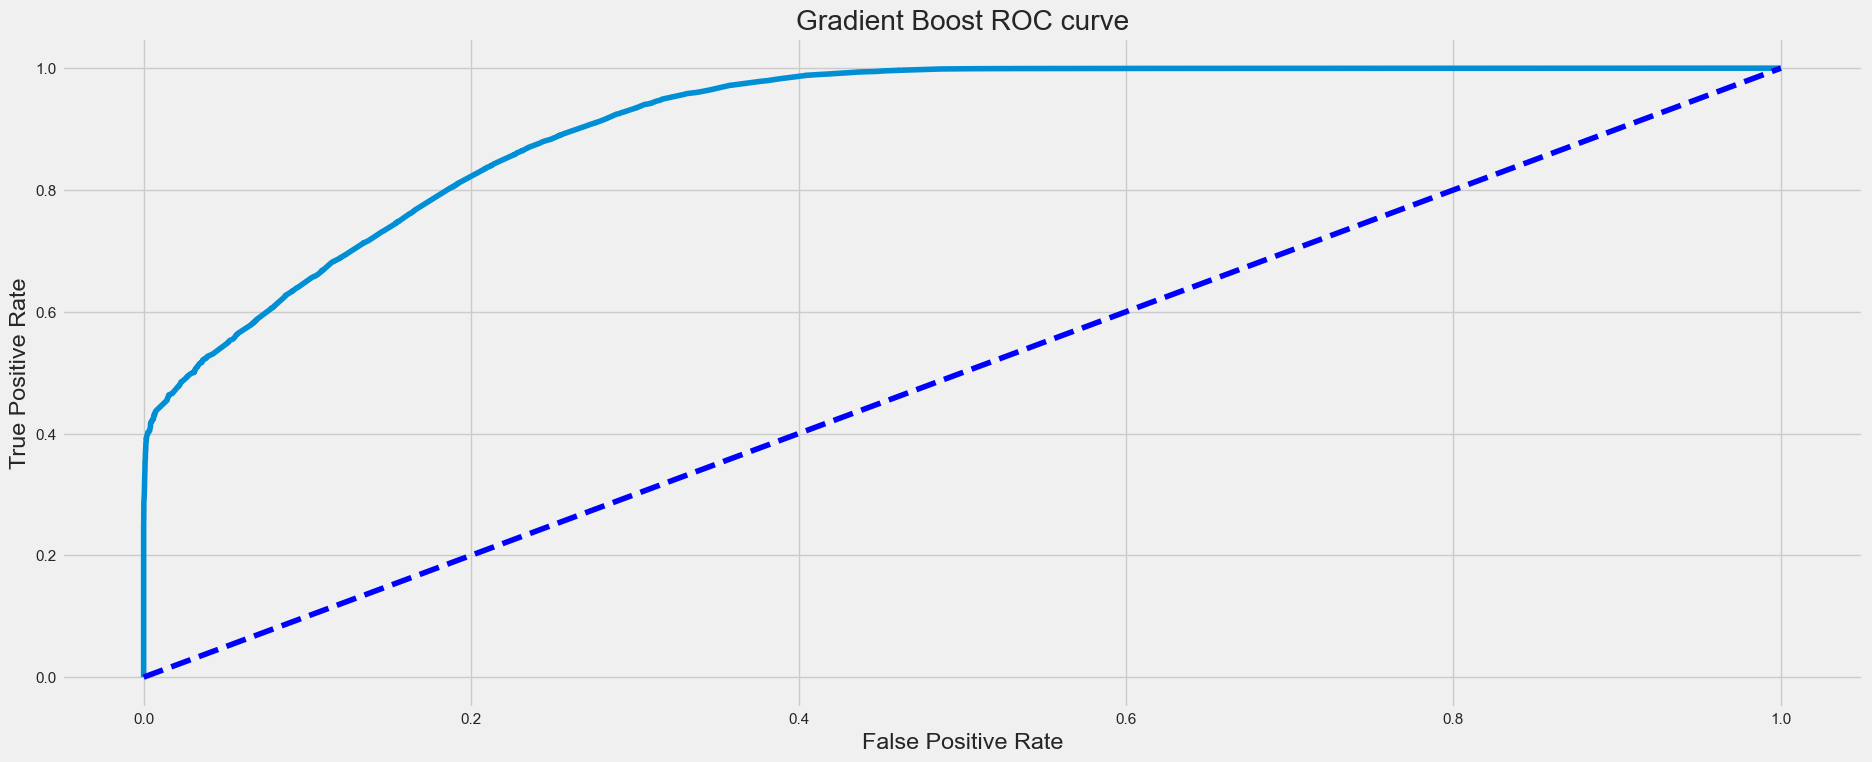

In [ ]:
falposr, truposr, _ = roc_curve(y_test, y_pred_grd_prob)
plt.title('Gradient Boost ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(falposr, truposr)
plt.plot((0,1), linestyle='--',color='blue')
plt.show()

[[23550  9698]
 [ 2458 31174]]



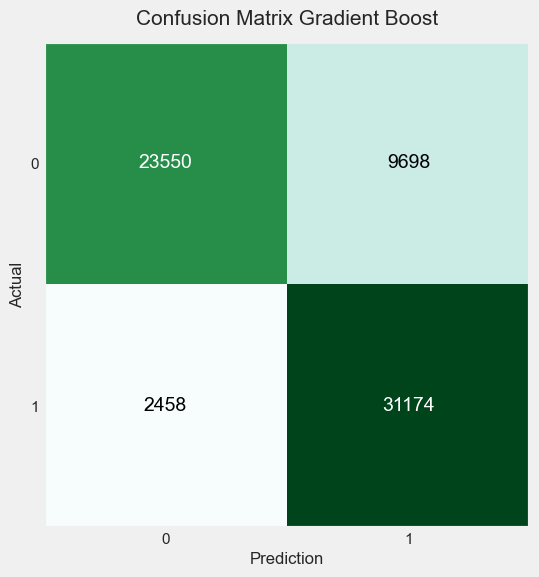

In [ ]:
cmgrd = confusion_matrix(y_test, y_pred_grd)
print(cmgrd)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmgrd, figsize=(6, 6), cmap=plt.cm.BuGn)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Gradient Boost', fontsize=15, pad=12)
plt.show()

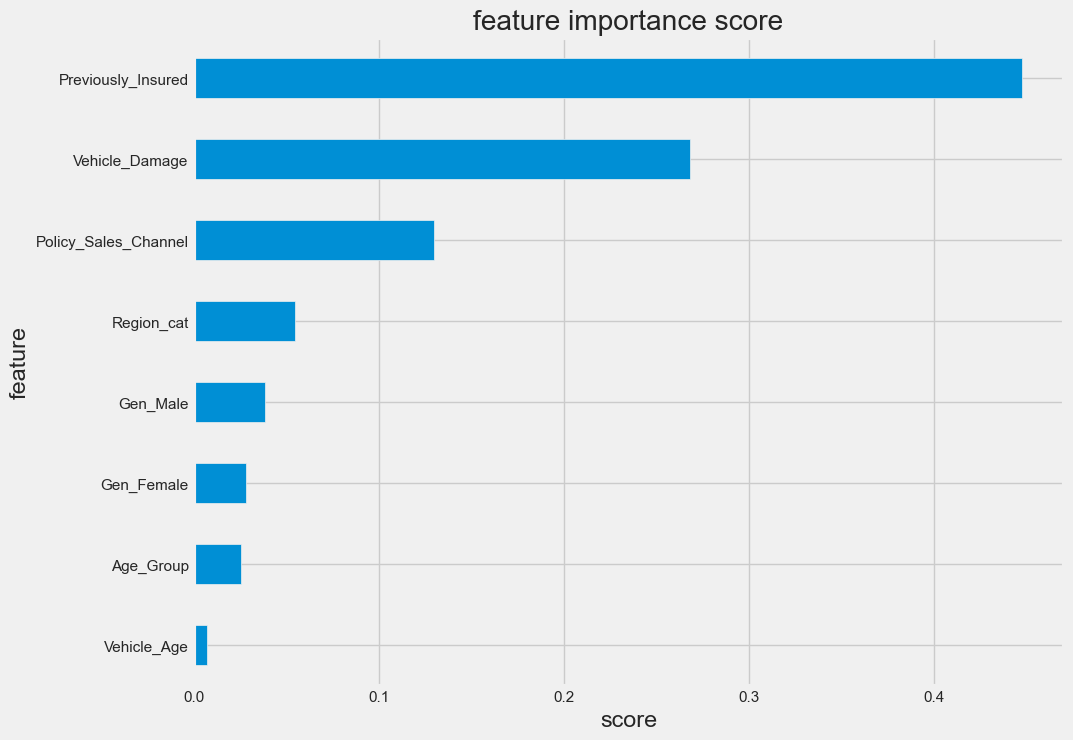

In [ ]:
show_feature_importance(grdmodel)

## Hyperparameter Tuning

### 1. Logistic Regression

In [ ]:
parameter = {'C': [float(x) for x in np.linspace(0.0001, 0.05, 100)],'penalty':['l2','l1', 'elasticnet']}
lgmodel2 = GridSearchCV(lg, parameter, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')
lgmodel2.fit(X_train, y_train)
lgmodelbest = lgmodel2.best_estimator_
y_pred_lg2 = lgmodelbest.predict(X_test)
y_pred_lg2_prob= lgmodelbest.predict_proba(X_test)[:,1]

Fitting 3 folds for each of 300 candidates, totalling 900 fits


In [ ]:
eval_classification(lgmodelbest)

Accuracy (Test Set): 0.78
Accuracy (Train Set): 0.79
Precision (Test Set): 0.71
Precision (Train Set): 0.71
Recall (Test Set): 0.96
Recall (Train Set): 0.95
F1-Score (Test Set): 0.82
F1-Score (Train Set): 0.82
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.87
roc_auc (crossval train): 0.9250729078020313
roc_auc (crossval test): 0.9157778526932893


In [ ]:
show_best_hyperparameter(lgmodel2)

{'C': 0.01874949494949495, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### 2. Decision Tree

In [ ]:
parameter = {
            'max_depth':[int(x) for x in np.linspace(1, 110, num = 30)],
            'min_samples_split':[2, 5, 10, 100],
            'max_features':['auto', 'sqrt'],
            'criterion':['gini','entropy'],
            'splitter':['best','random']}

dtmodel2 = GridSearchCV(dt, parameter, cv=3, n_jobs = -1 , verbose = 1, scoring='recall')
dtmodel2.fit(X_train, y_train)
dtmodelbest = dtmodel2.best_estimator_
y_pred_dt2 = dtmodelbest.predict(X_test)
y_pred_dt2_prob= dtmodelbest.predict_proba(X_test)[:,1]

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


In [ ]:
eval_classification(dtmodelbest)

Accuracy (Test Set): 0.79
Accuracy (Train Set): 0.79
Precision (Test Set): 0.73
Precision (Train Set): 0.72
Recall (Test Set): 0.94
Recall (Train Set): 0.94
F1-Score (Test Set): 0.82
F1-Score (Train Set): 0.82
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.86
roc_auc (crossval train): 0.9250746030016751
roc_auc (crossval test): 0.9157088511620103


In [ ]:
show_best_hyperparameter(dtmodel2)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}


### 3. XGBoost

In [ ]:
parameter = {
            'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
            'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
            'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'tree_method' : ['auto', 'exact', 'approx', 'hist'],
            'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
            'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
            }

xgmodel2 = RandomizedSearchCV(xgb, parameter, cv=3, n_jobs = -1 , verbose = 1, scoring='recall', random_state=42)
xgmodel2.fit(X_train,y_train)
xgmodelbest = xgmodel2.best_estimator_
y_pred_xg2 = xgmodelbest.predict(X_test)
y_pred_xg2_prob= xgmodelbest.predict_proba(X_test)[:,1]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
eval_classification(xgmodelbest)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.82
Precision (Test Set): 0.76
Precision (Train Set): 0.76
Recall (Test Set): 0.94
Recall (Train Set): 0.94
F1-Score (Test Set): 0.84
F1-Score (Train Set): 0.84
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.92
roc_auc (crossval train): 0.9250774295472468
roc_auc (crossval test): 0.9157157232673333


In [ ]:
show_best_hyperparameter(xgmodel2)

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.5, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.8, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 70, 'max_leaves': None, 'min_child_weight': 10, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'auto', 'validate_parameters': None, 'verbosity': None, 'lambda': 0.8, 'eta': 0.020202020202020204, 'alpha': 0.6000000000000001}


### 4. Random Forest

In [ ]:
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
parameter = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rsmodel2 = RandomizedSearchCV(rf, parameter, cv=3, n_jobs = -1 , verbose = 1, scoring='recall', random_state=42)
rsmodel2.fit(X_train,y_train)
rsmodelbest = rsmodel2.best_estimator_
y_pred_rs2 = rsmodelbest.predict(X_test)
y_pred_rs2_prob= rsmodelbest.predict_proba(X_test)[:,1]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
eval_classification(rsmodelbest)

Accuracy (Test Set): 0.81
Accuracy (Train Set): 0.81
Precision (Test Set): 0.74
Precision (Train Set): 0.74
Recall (Test Set): 0.95
Recall (Train Set): 0.95
F1-Score (Test Set): 0.83
F1-Score (Train Set): 0.83
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.9250814209730314
roc_auc (crossval test): 0.9157813696553474


In [ ]:
show_best_hyperparameter(rsmodel2)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 18, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 114, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### 5. LightGBM

In [ ]:
f2 = make_scorer(fbeta_score, beta =2)
parameter = {"n_estimators":[200,300,400],"max_depth":[3,5,9]}
lgbmodel2 = HalvingGridSearchCV(lgb, parameter, scoring = f2, cv=3, n_jobs = -1, verbose = 1)
lgbmodel2.fit(X_train,y_train)
lgbmodel2.best_params_, lgbmodel2.best_score_
lgbmodelbest = LGBMClassifier(**lgbmodel2.best_params_)
lgbmodelbest.fit(X_train, y_train)
y_pred_lgb2 = lgbmodelbest.predict(X_test)
y_pred_lgb2_prob = lgbmodelbest.predict_proba(X_test)[:,1]

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 14862
max_resources_: 133758
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 14862
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 1
n_candidates: 3
n_resources: 44586
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 2
n_candidates: 1
n_resources: 133758
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Number of positive: 66687, number of negative: 67071
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 133758, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498565 -> initscore=-0.005742
[L

In [ ]:
eval_classification(lgbmodelbest)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.82
Precision (Test Set): 0.77
Precision (Train Set): 0.77
Recall (Test Set): 0.92
Recall (Train Set): 0.92
F1-Score (Test Set): 0.84
F1-Score (Train Set): 0.84
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.92
roc_auc (crossval train): 0.9250770200136378
roc_auc (crossval test): 0.9157338990812915


In [ ]:
show_best_hyperparameter(lgbmodel2)

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 200, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


### 6. Gradient Boost

In [ ]:
parameter = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750], 'max_depth':[3,4,5,6,7,8], 'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2],'max_features':['sqrt','auto']}

grdmodel2 = RandomizedSearchCV(grd, parameter, scoring='recall', n_jobs=-1, cv=3, verbose=1)
grdmodel2.fit(X_train,y_train)
grdmodel2.best_params_, grdmodel2.best_score_
grdmodelbest = GradientBoostingClassifier(**grdmodel2.best_params_)
grdmodelbest.fit(X_train, y_train)
y_pred_grd2 = grdmodelbest.predict(X_test)
y_pred_grd2_prob = grdmodelbest.predict_proba(X_test)[:,1]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
eval_classification(grdmodelbest)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.82
Precision (Test Set): 0.76
Precision (Train Set): 0.76
Recall (Test Set): 0.93
Recall (Train Set): 0.93
F1-Score (Test Set): 0.84
F1-Score (Train Set): 0.83
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.9250743577573847
roc_auc (crossval test): 0.9157536867018333


In [ ]:
show_best_hyperparameter(grdmodel2)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.15, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


# Conclusion

### Hasil Score Modelling

|Model|Accuracy Test|Accuracy Train|Precision Test|Precision Train|Recall Test|Recall Train|F1 Test|F1 Train|ROC AUC Test|ROC AUC Train|ROC AUC CrossVal Test|ROC AUC CrossVal Train|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Logistic|0.79|0.79|0.72|0.72|0.93|0.94|0.82|0.82|0.87|0.87|0.93|0.92|
|KNN|0.79|0.80|0.78|0.78|0.83|0.83|0.80|0.80|0.89|0.89|0.93|0.92|
|Decision Tree|0.82|0.83|0.78|0.79|0.89|0.90|0.83|0.84|0.91|0.93|0.93|0.92|
|XGBoost|0.82|0.83|0.78|0.78|0.91|0.91|0.84|0.84|0.92|0.92|0.93|0.92|
|Random Forest|0.82|0.83|0.78|0.79|0.89|0.90|0.83|0.84|0.92|0.93|0.93|0.92|
|LightGBM|0.82|0.82|0.77|0.77|0.91|0.91|0.84|0.84|0.92|0.92|0.93|0.92|
|Gradient Boost|0.82|0.82|0.76|0.76|0.93|0.92|0.84|0.84|0.91|0.91|0.93|0.92|

### Hasil Score Setelah Hyperparameter Tuning

|Model|Accuracy Test|Accuracy Train|Precision Test|Precision Train|Recall Test|Recall Train|F1 Test|F1 Train|ROC AUC Test|ROC AUC Train|ROC AUC CrossVal Test|ROC AUC CrossVal Train|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Logistic|0.78|0.79|0.71|0.71|0.96|0.95|0.82|0.82|0.87|0.87|0.93|0.92|
|Decision Tree|0.79|0.79|0.73|0.72|0.94|0.94|0.82|0.82|0.86|0.86|0.93|0.92|
|XGBoost|0.82|0.82|0.76|0.76|0.94|0.94|0.84|0.84|0.92|0.92|0.93|0.92|
|Random Forest|0.81|0.81|0.74|0.74|0.95|0.95|0.83|0.83|0.89|0.89|0.93|0.92|
|LightGBM|0.82|0.82|0.77|0.77|0.92|0.92|0.84|0.84|0.92|0.92|0.93|0.92|
|Gradient Boost|0.82|0.82|0.76|0.76|0.93|0.93|0.84|0.83|0.91|0.91|0.93|0.92|

Dari karakteristik dataset yang sudah tidak memiliki *class imbalance* serta tujuan bisnis, evaluasi akan menitik beratkan pada score ***recall*** dimana meminimalisir False Negative serta ***ROC AUC*** score untuk menilai sejauh mana model mampu membedakan kelas (TPR dan FPR) walaupun *class* sudah seimbang.

Dari score diatas didapatkan model yang memiliki score yang baik untuk prediksi klasifikasi adalah model hasil algoritma `XGBoost`, `LightGBM`, `Random Forest` dan `Gradient Boost`.

### XGBoost dan Features Importance

[[23290  9958]
 [ 2146 31486]]



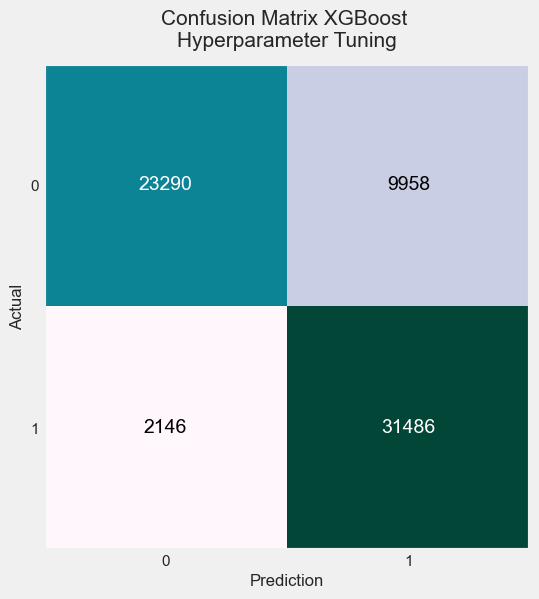

In [ ]:
cmxg2 = confusion_matrix(y_test, y_pred_xg2)
print(cmxg2)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmxg2, figsize=(6, 6), cmap=plt.cm.PuBuGn)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix XGBoost \nHyperparameter Tuning', fontsize=15, pad=12)
plt.show()

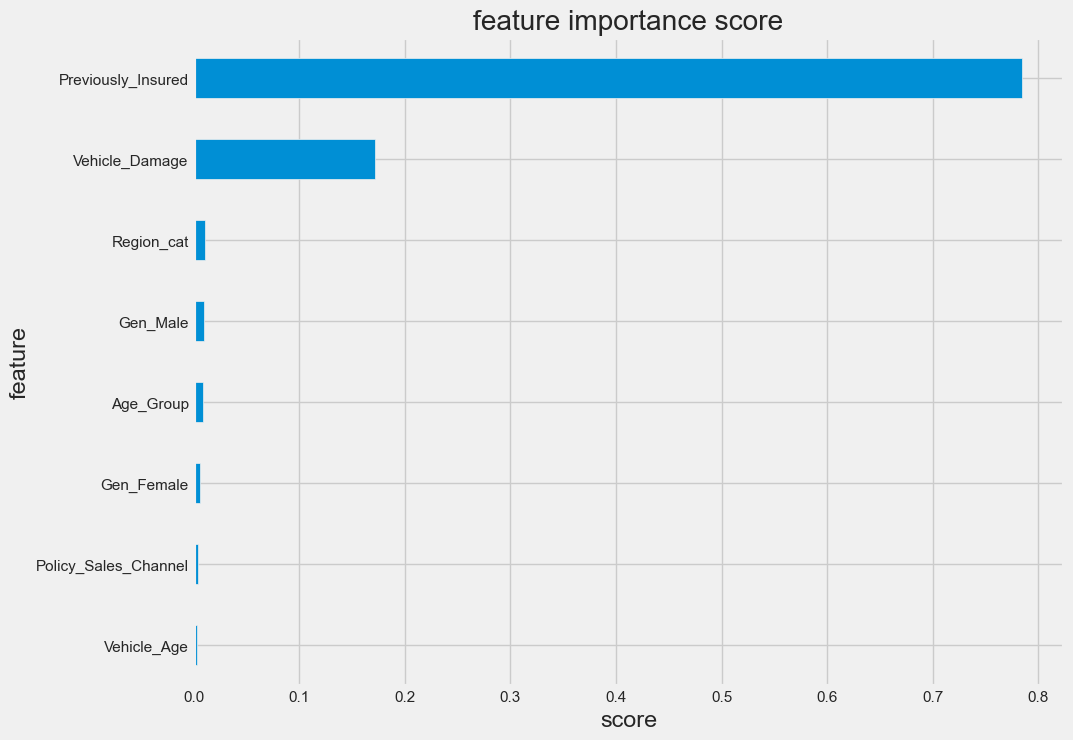

In [ ]:
show_feature_importance(xgmodelbest)

Pada model **`XGBoost`**, 2 *features* yang memiliki *importance* terbesar adalah `Previously_Insured` dan `Vehicle_Damage` sedangkan 2 *features* yang paling rendah adalah `Policy_Sales_Channel` dan `Vehicle_Age`.

### LightGBM dan Features Impotance

[[23936  9312]
 [ 2740 30892]]



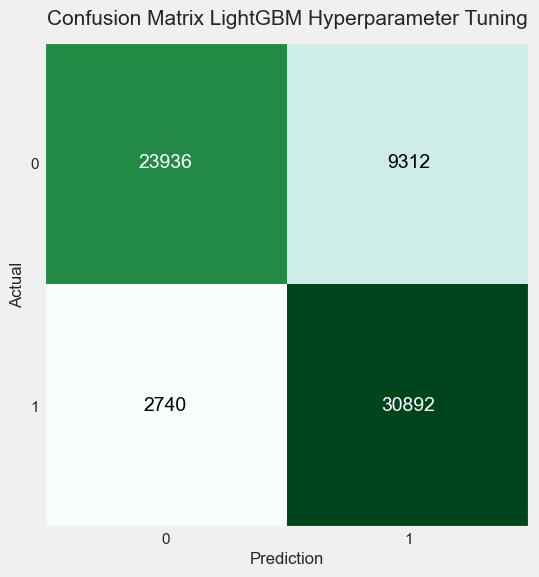

In [ ]:
cmlgb2 = confusion_matrix(y_test, y_pred_lgb2)
print(cmlgb2)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmlgb2, figsize=(6, 6), cmap=plt.cm.BuGn)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix LightGBM Hyperparameter Tuning', fontsize=15, pad=12)
plt.show()

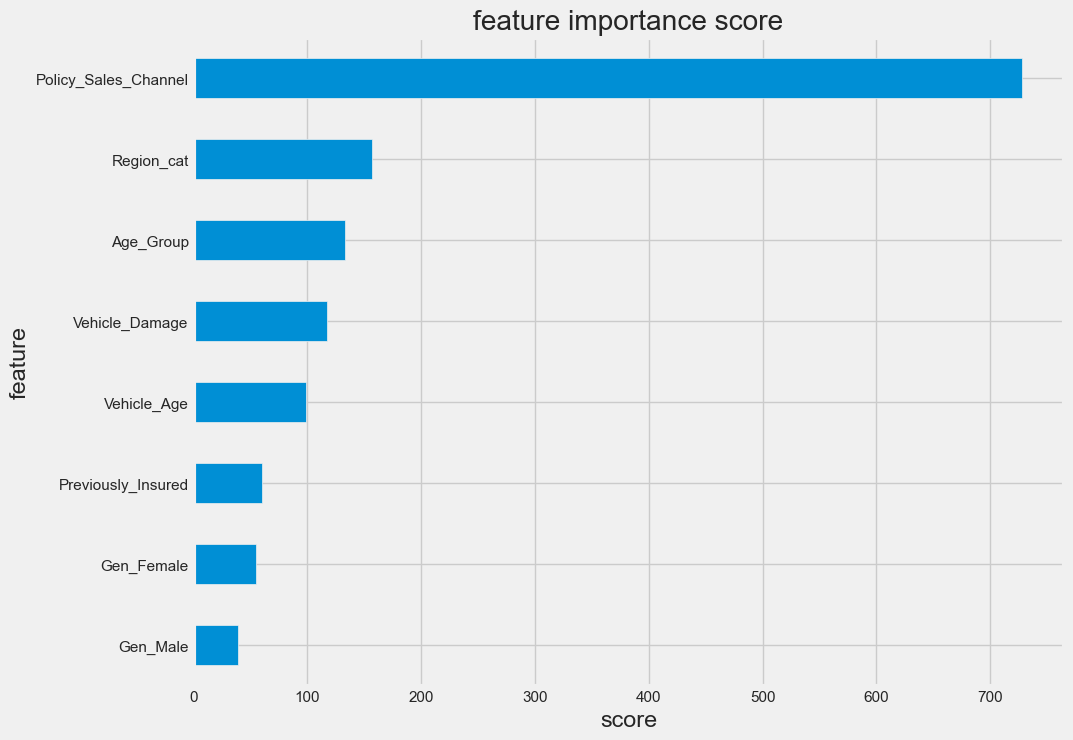

In [ ]:
show_feature_importance(lgbmodelbest)

Pada model **`LightGBM`** hampir seluruh *features* terlihat memiliki *importance* yang cukup tinggi dibandingkan model XGBoost, dimana `Policy_Sales_Channel` dan `Region_cat` memiliki *importance* yang tertinggi serta `Gen_Female` dan `Gen_Male` memiliki *importance* yang rendah.

### Random Forest dan Features Importance

[[22023 11225]
 [ 1742 31890]]



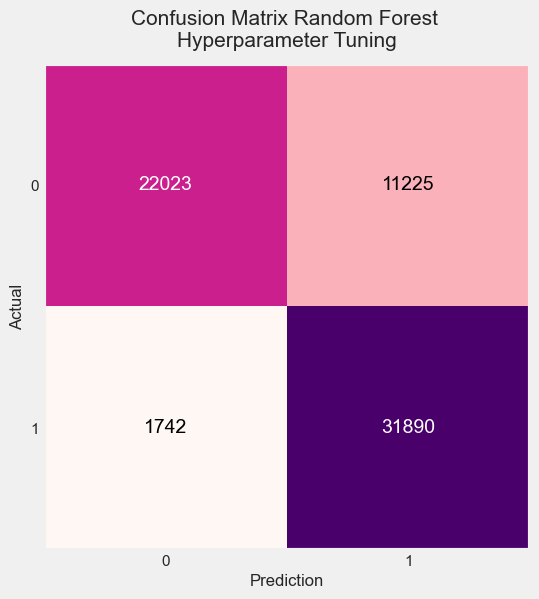

In [ ]:
cmrf2 = confusion_matrix(y_test, y_pred_rs2)
print(cmrf2)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmrf2, figsize=(6, 6), cmap=plt.cm.RdPu)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Random Forest \nHyperparameter Tuning', fontsize=15, pad=12)
plt.show()

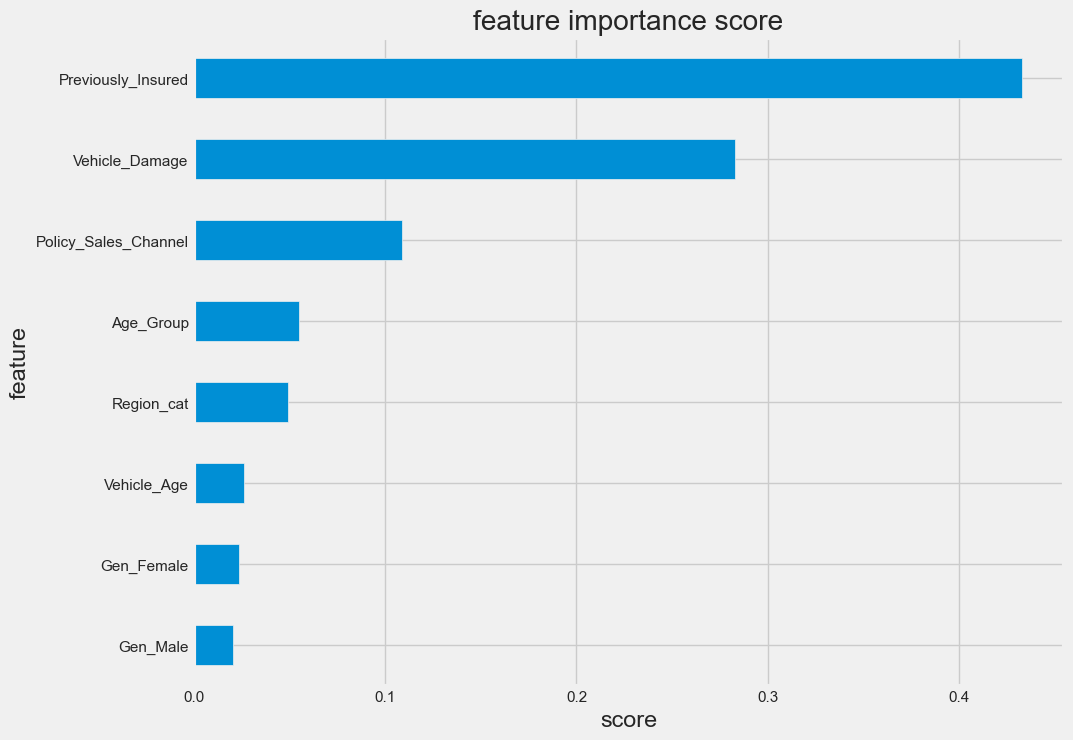

In [ ]:
show_feature_importance(rsmodelbest)

Sama layaknya LightGBM, pada model **`Random Forest`** hampir tidak *features* memiliki *importance* yang signifikan, dimana sama dengan XGBoost *features* tertinggi nya adalah `Previously_Insured` dan `Vehicle_Damage` namun *features* terendahnya sama dengan LightGBM `Gen_Female` dan `Gen_Male`.

### Gradient Boost dan Features Importance

[[23363  9885]
 [ 2423 31209]]



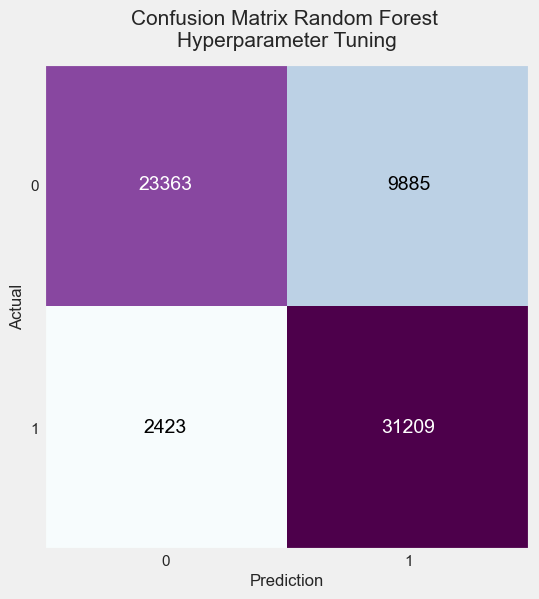

In [ ]:
cmgrd2 = confusion_matrix(y_test, y_pred_grd2)
print(cmgrd2)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmgrd2, figsize=(6, 6), cmap=plt.cm.BuPu)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Random Forest \nHyperparameter Tuning', fontsize=15, pad=12)
plt.show()

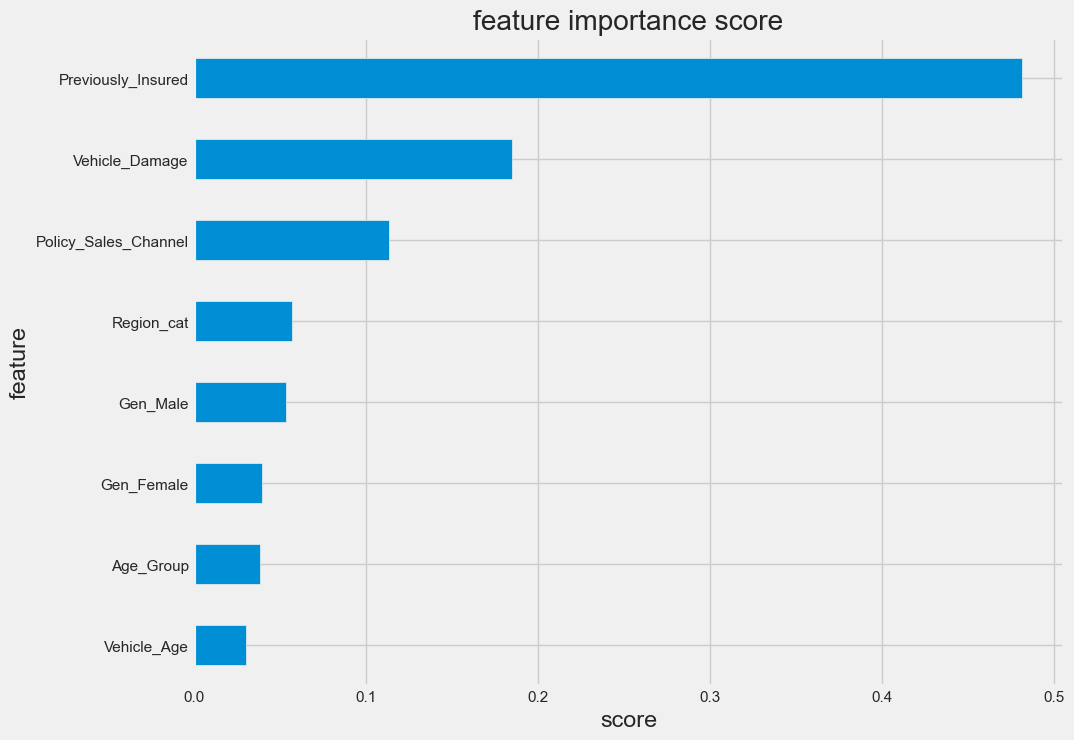

In [ ]:
show_feature_importance(grdmodelbest)

Sama dengan Random Forest dan XGBoost, *features* **`Gradient Boost`** yang tertinggi adalah `Previously_Insured` dan `Vehicle_Damage` sedangkan 2 features terendah adalah `Age_Group` dan `Vehicle_Age`.

## The Best Fit Model

### **`XGBoost Model`**

Model ini memiliki score recall yang tinggi yakni mencapai **0.94** dengan probabilitas machine learning sebesar **0.92** dan AUC ROC mencapai **0.91** pada hasil test data. Sedangkan pada train data nya hanya memiliki selisih terbesar 0.02 dari test data, yakni model tidak overfit maupun underfit yang dapat disebut sebagai model ***best fit***.

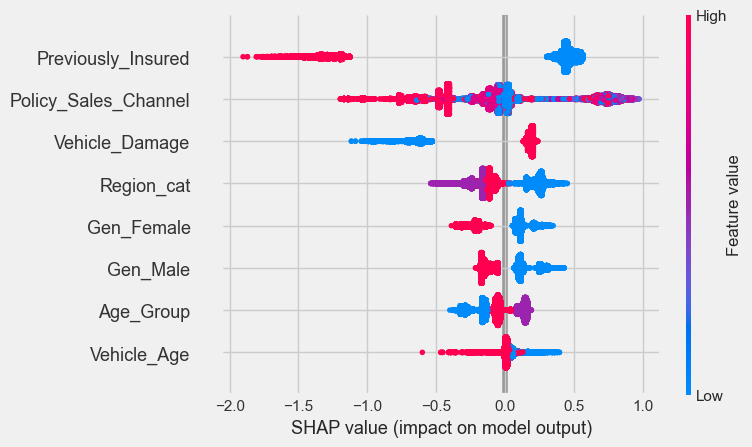

In [ ]:
# Melihat shap value tiap features
explainer = shap.TreeExplainer(xgmodelbest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

* `'Previously_Insured'`: Value yang bernilai tinggi memiliki kontribusi negatif dengan hasil prediksi sedangkan value yang nilainya rendah memiliki kontribusi positif terhadap hasil prediksi.
* `'Policy_Sales_Channel'`: Semakin tinggi value berdampak kontribusi negatif terhadap prediksi sedangkan semakin rendah value memiliki kontribusi positif terhadap hasil prediksi.
* `'Vehicle_Damage'`: Semakin value bernilai tinggi memiliki kontribusi positif terhadap prediksi dan semakin rendah nilai value memiliki kontibusi negatif terhadap prediksi.
* `'Region_cat'`: Value yang bernilai tengah ke tinggi memiliki kontribusi negatif terhadap prediksi dan sebaliknya value yang bernilai rendah memiliki kontribusi yang positif.
* `'Gen_Female'`: Value tinggi berkontribusi negatif dan value rendah berkontribusi positif.
* `'Gen_Male'`: Value tinggi berkontribusi negatif dan value rendah berkontribusi positif.
* `'Age_Group'`: Value yang bernilai rendah dan tinggi memiliki kontibusi yang negatif terhadap prediksi sedangkan value yang memiliki nilai ditengah-tengah memiliki kontribusi yang positif.
* `'Vehicle_Age'`: Semakin tinggi value semakin negatif kontribusinya, dan semakin rendah value semakin positif kontribusinya terhadap prediksi.

### Business Recommendation

* Dari insight diatas dapat disimpulkan bahwa belum atau sudahnya seseorang dalam memiliki asuransi menjadi hal yang sangat berpengaruh sehingga penargetan marketing kepada customers yang belum memiliki asuransi sangat direkomendasikan.
* Jenis kelamin tidak memiliki pengaruh yang signifikan terhadap minat atau tidaknya seseorang terhadap asuransi kendaraan.
* Group umur yang paling memiliki ketertarikan tinggi terhadap asuransi adalah Group umur tengah-tengah yang disimpulkan adalah *YoungAdults*.
* Kebanyakan customers yang memiliki kendaraan rusak (damaged) akan cenderung lebih menunjukan ketertarikan terhadap asuransi kendaraan.
* Fokus pemasaran ada code region yang rendah.

In [ ]:
import pickle
pickle.dump(xgmodelbest, open('XGBoost_Model.pkl', 'wb'))